# Імпорт необхідних бібліотек

In [317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)

# Імпорт даних

Вмонтуємо наш диск, якщо Ви працюєте в Google Colab. Якщо працюєте локально, пропустіть наступну клітинку.

In [318]:
# from google.colab import drive
# drive.mount('/content/drive')

Знайдемо, де лежать наші файли з даними. В мене вони знаходяться тут:

In [319]:
!ls

1_1_Основи_статистичного_аналізу_вибірок.ipynb
HW_1_1_Основи_статистики.ipynb
HW_1_2_Credit_EDA.ipynb
application_data.csv.zip
application_data_processed.zip
test.ipynb


Зчитуємо дані.

In [320]:
df = pd.read_csv("application_data.csv.zip")

In [321]:
# Огляд декількох записів з датафрейму
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0         202500.00   406597.50     24700.50   
1               N             0         270000.00  1293502.50     35698.50   
2               Y             0          67500.00   135000.00      6750.00   
3               Y             0         135000.00   312682.50     29686.50   
4               Y             0         121500.00   513000.00     21865.50   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        351000.00   Unaccompanied          Working   
1       1129500.00          Family    State servant   
2        135000.00   Unaccompanied          Working   
3        297000.00   Unaccompanied          Working   
4        513000.00   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                        0.02       -9461           -637           -3648.00   
1                        0.00      -16765          -1188           -1186.00   
2                        0.01      -19046           -225           -4260.00   
3                        0.01      -19005          -3039           -9833.00   
4                        0.03      -19932          -3038           -4311.00   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531        26.00           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers             1.00   
1                 1           1           0      Core staff             2.00   
2                 1           1           0        Laborers             1.00   
3                 1           0           0        Laborers             2.00   
4                 1           0           0      Core staff             1.00   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

# Перевірка структури даних

Оскільки я використовую версію `pandas 2.1.4` параметр функції `null_counts` є недоступною, тому використовую аргумент `show_counts`

In [322]:
# перевірка версії pandas
pd.__version__

'2.1.4'

In [323]:
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [324]:
df.shape

(307511, 122)

Маємо ~307k рядків та 122 колонки.

## Статистичний звіт для числових змінних

In [325]:
df.describe()

SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
count   307511.00 307511.00     307511.00         307511.00   307511.00   
mean    278180.52      0.08          0.42         168797.92   599026.00   
std     102790.18      0.27          0.72         237123.15   402490.78   
min     100002.00      0.00          0.00          25650.00    45000.00   
25%     189145.50      0.00          0.00         112500.00   270000.00   
50%     278202.00      0.00          0.00         147150.00   513531.00   
75%     367142.50      0.00          1.00         202500.00   808650.00   
max     456255.00      1.00         19.00      117000000.00  4050000.00   

       AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
count    307499.00        307233.00                   307511.00   307511.00   
mean      27108.57        538396.21                        0.02   -16037.00   
std       14493.74        369446.46                        0.01     4363.99   
min        1615.50         40500.00                        0.00   -25229.00   
25%       16524.00        238500.00                        0.01   -19682.00   
50%       24903.00        450000.00                        0.02   -15750.00   
75%       34596.00        679500.00                        0.03   -12413.00   
max      258025.50       4050000.00                        0.07    -7489.00   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
count      307511.00          307511.00        307511.00    104582.00   
mean        63815.05           -4986.12         -2994.20        12.06   
std        141275.77            3522.89          1509.45        11.94   
min        -17912.00          -24672.00         -7197.00         0.00   
25%         -2760.00           -7479.50         -4299.00         5.00   
50%         -1213.00           -4504.00         -3254.00         9.00   
75%          -289.00           -2010.00         -1720.00        15.00   
max        365243.00               0.00             0.00        91.00   

       FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
count   307511.00       307511.00        307511.00         307511.00   
mean         1.00            0.82             0.20              1.00   
std          0.00            0.38             0.40              0.04   
min          0.00            0.00             0.00              0.00   
25%          1.00            1.00             0.00              1.00   
50%          1.00            1.00             0.00              1.00   
75%          1.00            1.00             0.00              1.00   
max          1.00            1.00             1.00              1.00   

       FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count   307511.00   307511.00        307509.00             307511.00   
mean         0.28        0.06             2.15                  2.05   
std          0.45        0.23             0.91                  0.51   
min          0.00        0.00             1.00                  1.00   
25%          0.00        0.00             2.00                  2.00   
50%          0.00        0.00             2.00                  2.00   
75%          1.00        0.00             3.00                  2.00   
max          1.00        1.00            20.00                  3.00   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                    307511.00                307511.00   
mean                          2.03                    12.06   
std                           0.50                     3.27   
min                           1.00                     0.00   
25%                           2.00                    10.00   
50%                           2.00                    12.00   
75%                           2.00                    14.00   
max                           3.00                    23.00   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count                   307511

# Аналіз категоріальних змінних

In [326]:
df.select_dtypes(include = "object").columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [327]:
# Перевірка кількості категоріальних змінних
len(df.select_dtypes(include = "object").columns)

16

Дані містять 16 `categorical` змінних

# Аналіз числових змінних

In [328]:
number_df = df.select_dtypes(include="number")

In [329]:
number_df.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [330]:
# Перевірка кількості числових змінних
len(number_df.columns)

106

Дані міcтять 106 `numerical` змінних

In [331]:
number_df.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0         202500.00   406597.50   
1      100003       0             0         270000.00  1293502.50   
2      100004       0             0          67500.00   135000.00   
3      100006       0             0         135000.00   312682.50   
4      100007       0             0         121500.00   513000.00   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0     24700.50        351000.00                        0.02       -9461   
1     35698.50       1129500.00                        0.00      -16765   
2      6750.00        135000.00                        0.01      -19046   
3     29686.50        297000.00                        0.01      -19005   
4     21865.50        513000.00                        0.03      -19932   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0           -637           -3648.00            -2120          NaN           1   
1          -1188           -1186.00             -291          NaN           1   
2           -225           -4260.00            -2531        26.00           1   
3          -3039           -9833.00            -2437          NaN           1   
4          -3038           -4311.00            -3458          NaN           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0             1.00                     2                            2   
1             2.00                     1                            1   
2             1.00                     2                            2   
3             2.00                     2                            2   
4             1.00                     2                            2   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0          0.08          0.26          0.14            0.02              0.04   
1          0.31          0.62           NaN            0.10              0.05   
2           NaN          0.56          0.73             NaN               NaN   
3           NaN          0.65           NaN             NaN               NaN   
4           NaN          0.32           NaN             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COM

# Робота з некоректними типами даних

Перевірка, чи немає у нас стовпця з неправильним типом даних

In [332]:
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


Дивлячись на дані та відповідні їм типи даних, можна змінити

1.   Елемент списку
2.   Елемент списку

тип стовпчика SKU.

In [333]:
df['SK_ID_CURR'] = df['SK_ID_CURR'].astype("str")

Також ми можемо змінити всі стовпці `flag` на тип даних, який є більш економний для зберігання.

Ось скільки пам'яті в Мб займають наші дані зараз.

In [334]:
df.memory_usage().sum()/1024/1024

286.22710037231445

Отже, ми можемо потенційно заощадити 57 Мб пам'яті! І трансформувати наш фрейм даних буде простіше. Давайте змінимо тип.


In [335]:
flag_cols = ['flag' in col.lower() for col in df.columns]

In [336]:
df[df.columns[flag_cols]].head()

FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            N               Y           1               1                0   
1            N               N           1               1                0   
2            Y               Y           1               1                1   
3            N               Y           1               1                0   
4            N               Y           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
0                 1           1           0                0                1   
1                 1           1           0                0                1   
2                 1           1           0                0                0   
3                 1           0           0                0                1   
4                 1           0           0                0                0   

   FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
0                0                0                 0                 0   
1                0                0                 0                 0   
2                0                0                 0                 0   
3                0                0                 0                 0   
4                1                0                 0                 0   

   FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 0                 0

In [337]:
df[df.columns[flag_cols]].nunique()

FLAG_OWN_CAR        2
FLAG_OWN_REALTY     2
FLAG_MOBIL          2
FLAG_EMP_PHONE      2
FLAG_WORK_PHONE     2
FLAG_CONT_MOBILE    2
FLAG_PHONE          2
FLAG_EMAIL          2
FLAG_DOCUMENT_2     2
FLAG_DOCUMENT_3     2
FLAG_DOCUMENT_4     2
FLAG_DOCUMENT_5     2
FLAG_DOCUMENT_6     2
FLAG_DOCUMENT_7     2
FLAG_DOCUMENT_8     2
FLAG_DOCUMENT_9     2
FLAG_DOCUMENT_10    2
FLAG_DOCUMENT_11    2
FLAG_DOCUMENT_12    2
FLAG_DOCUMENT_13    2
FLAG_DOCUMENT_14    2
FLAG_DOCUMENT_15    2
FLAG_DOCUMENT_16    2
FLAG_DOCUMENT_17    2
FLAG_DOCUMENT_18    2
FLAG_DOCUMENT_19    2
FLAG_DOCUMENT_20    2
FLAG_DOCUMENT_21    2
dtype: int64

Типи даних в pandas взяті з numpy, і ось тут список всіх типів даних в numpy:

https://numpy.org/doc/stable/user/basics.types.html

Кожен тип даних займає певну кількість байт у пам'яті. Давайте з'ясуємо, скільки займає 1 тип int8 та 1 тип int64 і скільки пам'яті ми заощадимо, якщо змінимо тип.

In [338]:
import numpy as np
from sys import getsizeof

In [339]:
getsizeof(np.int64(1))

32

In [340]:
getsizeof(np.int8(1))

25

In [341]:
7 * df.shape[0] * sum(flag_cols) / 1024 / 1024

57.48000717163086

In [342]:
str_flag_cols = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

In [343]:
for col in str_flag_cols:
  df[col] = np.where(df[col]=='Y', 1, 0)

In [344]:
df[str_flag_cols].nunique()

FLAG_OWN_CAR       2
FLAG_OWN_REALTY    2
dtype: int64

In [345]:
df[df.columns[flag_cols]] = df[df.columns[flag_cols]].astype('int8')

In [346]:
df.memory_usage().sum()/1024/1024

228.7470932006836

# Робота з пропущеними значеннями

Найпростіше емпіричне правило для опрацювання пропущених значень: якщо пропущених значень більше за 40% - видаляємо колонку, якщо менше за 40% - аналізуємо, як можна заповнити і чи треба.

Зазвичай, якщо відсоток пропущених даних більший за 10 і немає чіткої (яка значно виділяється) моди (найчастішого) значення в даних, то лишаємо дані як є до використання методів машинного навчання. Далі якщо метод вимагає заповення пропущених значень, можемо експериментувати із заповеннями. Також хорошою практикою є створити окрему колонку-флаг (0/1), яка вказує, де були пропущені значення - це буде додаткова ознака для моделі.


Перевіримо, чи немає нульових значень в нашому наборі даних

In [347]:
df.isnull().values.any()

True

Порахуємо загальну кількість нульових значень в наборі даних

In [348]:
df.isnull().values.sum()

9152465

Сформуємо список із стовпців з нульовими значеннями

In [349]:
df.columns[df.isnull().any()]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

In [350]:
len(df.columns[df.isnull().any()])

67

Усього `67` стовпців мають одне або більше NULL-значень в даних

## Кількість та відсоток пропущених значень у стовпцях

In [351]:
null_count = df.isnull().sum()
null_percentage = round((df.isnull().sum()/df.shape[0])*100, 2)

In [352]:
null_df = pd.DataFrame({'column_name' : df.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)

In [353]:
null_df.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
76                COMMONAREA_MEDI      214865            69.87
48                 COMMONAREA_AVG      214865            69.87
62                COMMONAREA_MODE      214865            69.87
70       NONLIVINGAPARTMENTS_MODE      213514            69.43
56        NONLIVINGAPARTMENTS_AVG      213514            69.43
84       NONLIVINGAPARTMENTS_MEDI      213514            69.43
86             FONDKAPREMONT_MODE      210295            68.39
68          LIVINGAPARTMENTS_MODE      210199            68.35
54           LIVINGAPARTMENTS_AVG      210199            68.35
82          LIVINGAPARTMENTS_MEDI      210199            68.35
52                  FLOORSMIN_AVG      208642            67.85
66                 FLOORSMIN_MODE      208642            67.85
80                 FLOORSMIN_MEDI      208642            67.85
75               YEARS_BUILD_MEDI      204488            66.50
61               YEARS_BUILD_MODE      204488            66.50
47                YEARS_BUILD_AVG      204488            66.50
21                    OWN_CAR_AGE      202929            65.99
81                  LANDAREA_MEDI      182590            59.38
67                  LANDAREA_MODE      182590            59.38
53                   LANDAREA_AVG      182590            59.38
73              BASEMENTAREA_MEDI      179943            58.52
45               BASEMENTAREA_AVG      179943            58.52
59              BASEMENTAREA_MODE      179943            58.52
41                   EXT_SOURCE_1      173378            56.38
71             NONLIVINGAREA_MODE      169682            55.18
57              NONLIVINGAREA_AVG      169682            55.18
85             NONLIVINGAREA_MEDI      169682            55.18
77                 ELEVATORS_MEDI      163891            53.30
49                  ELEVATORS_AVG      163891            53.30
63                 ELEVATORS_MODE      163891            53.30
89             WALLSMATERIAL_MODE      156341            50.84
72                APARTMENTS_MEDI      156061            50.75
44                 APARTMENTS_AVG      156061            50.75
58                APARTMENTS_MODE      156061            50.75
78                 ENTRANCES_MEDI      154828            50.35
50                  ENTRANCES_AVG      154828            50.35
64                 ENTRANCES_MODE      154828            50.35
55                 LIVINGAREA_AVG      154350            50.19
69                LIVINGAREA_MODE      154350            50.19
83                LIVINGAREA_MEDI      154350            50.19
87                 HOUSETYPE_MODE      154297            50.18
65                 FLOORSMAX_MODE      153020            49.76
79                 FLOORSMAX_MEDI      153020            49.76
51                  FLOORSMAX_AVG      153020            49.76
60   YEARS_BEGINEXPLUATATION_MODE      150007            48.78
74   YEARS_BEGINEXPLUATATION_MEDI      150007            48.78
46    YEARS_BEGINEXPLUATATION_AVG      150007            48.78
88                 TOTALAREA_MODE      148431            48.27
90            EMERGENCYSTATE_MODE      145755            47.40
28                OCCUPATION_TYPE       96391            31.35
43                   EXT_SOURCE_3       60965            19.83
116    AMT_REQ_CREDIT_BUREAU_HOUR       41519            13.50
117     AMT_REQ_CREDIT_BUREAU_DAY       41519            13.50
118    AMT_REQ_CREDIT_BUREAU_WEEK       41519            13.50
119     AMT_REQ_CREDIT_BUREAU_MON       41519            13.50
120     AMT_REQ_CREDIT_BUREAU_QRT       41519            13.50
121    AMT_REQ_CREDIT_BUREAU_YEAR       41519            13.50
11                NAME_TYPE_SUITE        1292             0.42
92       DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
91       OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
93       OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
94       DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
42                   EXT_SOURCE_2         660        

## Видалення стовпців з NULL значеннями > 40%

Сформуємо список стовпців з NULL значеннями > 40% у список. Ми видалимо ці стовпці з датафрейму, оскільки в них занадто багато пропущених значень.

In [354]:
columns_to_be_deleted = null_df[null_df['null_percentage'] > 40].column_name.to_list()

In [355]:
len(columns_to_be_deleted)

49

Всього потрібно видалити `49` стовпців. Видалення їх з основного датафрейму **`df`**

In [356]:
df.drop(columns = columns_to_be_deleted, inplace = True)

Перевірка підрахунку стовпців після видалення. Мало б залишитись лише `73` стовпці

In [357]:
df.shape

(307511, 73)

## Перевірка стовпців з NULL значеннями < 40%

Створення датафрейму `null_df_under40` зі стовпцями, де відсоток пропущених значеннь менше 40%

In [358]:
null_df_under40 = null_df[null_df['null_percentage'] < 40]

In [359]:
null_df_under40.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
28               OCCUPATION_TYPE       96391            31.35
43                  EXT_SOURCE_3       60965            19.83
121   AMT_REQ_CREDIT_BUREAU_YEAR       41519            13.50
120    AMT_REQ_CREDIT_BUREAU_QRT       41519            13.50
119    AMT_REQ_CREDIT_BUREAU_MON       41519            13.50
118   AMT_REQ_CREDIT_BUREAU_WEEK       41519            13.50
117    AMT_REQ_CREDIT_BUREAU_DAY       41519            13.50
116   AMT_REQ_CREDIT_BUREAU_HOUR       41519            13.50
11               NAME_TYPE_SUITE        1292             0.42
91      OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
92      DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
93      OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
94      DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
42                  EXT_SOURCE_2         660             0.21
10               AMT_GOODS_PRICE         278             0.09
101              FLAG_DOCUMENT_7           0             0.00
95        DAYS_LAST_PHONE_CHANGE           1             0.00
96               FLAG_DOCUMENT_2           0             0.00
97               FLAG_DOCUMENT_3           0             0.00
98               FLAG_DOCUMENT_4           0             0.00
99               FLAG_DOCUMENT_5           0             0.00
100              FLAG_DOCUMENT_6           0             0.00
105             FLAG_DOCUMENT_11           0             0.00
102              FLAG_DOCUMENT_8           0             0.00
103              FLAG_DOCUMENT_9           0             0.00
104             FLAG_DOCUMENT_10           0             0.00
39       LIVE_CITY_NOT_WORK_CITY           0             0.00
106             FLAG_DOCUMENT_12           0             0.00
107             FLAG_DOCUMENT_13           0             0.00
108             FLAG_DOCUMENT_14           0             0.00
109             FLAG_DOCUMENT_15           0             0.00
110             FLAG_DOCUMENT_16           0             0.00
111             FLAG_DOCUMENT_17           0             0.00
112             FLAG_DOCUMENT_18           0             0.00
113             FLAG_DOCUMENT_19           0             0.00
114             FLAG_DOCUMENT_20           0             0.00
115             FLAG_DOCUMENT_21           0             0.00
40             ORGANIZATION_TYPE           0             0.00
0                     SK_ID_CURR           0             0.00
38        REG_CITY_NOT_WORK_CITY           0             0.00
9                    AMT_ANNUITY          12             0.00
17                    DAYS_BIRTH           0             0.00
16    REGION_POPULATION_RELATIVE           0             0.00
15             NAME_HOUSING_TYPE           0             0.00
14            NAME_FAMILY_STATUS           0             0.00
13           NAME_EDUCATION_TYPE           0             0.00
12              NAME_INCOME_TYPE           0             0.00
8                     AMT_CREDIT           0             0.00
1                         TARGET           0             0.00
7               AMT_INCOME_TOTAL           0             0.00
6                   CNT_CHILDREN           0             0.00
5                FLAG_OWN_REALTY           0             0.00
4                   FLAG_OWN_CAR           0             0.00
3                    CODE_GENDER           0             0.00
2             NAME_CONTRACT_TYPE           0             0.00
18                 DAYS_EMPLOYED           0             0.00
19             DAYS_REGISTRATION           0             0.00
20               DAYS_ID_PUBLISH           0             0.00
22                    FLAG_MOBIL           0             0.00
23                FLAG_EMP_PHONE           0             0.00
24               FLAG_WORK_PHONE           0             0.00
25              FLAG_CONT_MOBILE           0             0.00
26                    FLAG_PHONE           0             0.00
27                    FLAG_EMAIL           0         

Опрацюємо кожну з колонок.

### Аналіз стовпця `OCCUPATION_TYPE`

- нульові значення = 31.35%

In [360]:
df['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

Заміна NULL-значень на категорією `Unknown`

In [361]:
df['OCCUPATION_TYPE'].fillna(value = 'Unknown', inplace = True)

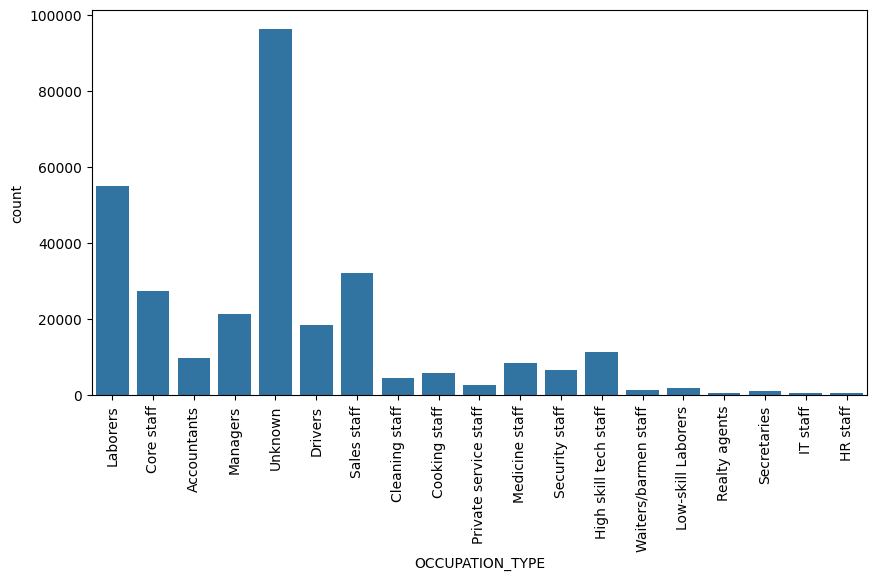

In [362]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = "OCCUPATION_TYPE")
plt.xticks(rotation = 90)
plt.show()

**Спостереження**
- Якщо поглянути на графік, то найбільшу кількість заявників на кредит мають `Laborers`
- Для імпутації краще залишити дані як є (пропущені значення становлять 31,35%) і не проводити імпутацію за якоюсь константою, як-от мода або мін/макс медіана, якщо це числовий стовпчик, оскільки це може викривити дані в подальших розрахунках.

Існує також можливість імпутації за допомогою більш "розумних" методів, але ми вивчимо їх пізніше, а зараз ми робимо те, що можемо, за допомогою деяких найпростіших перетворень.

### Аналіз стовпця `EXT_SOURCE_3`

- пропущені значення = 19.83%

In [363]:
df.EXT_SOURCE_3.value_counts().head()

EXT_SOURCE_3
0.75    1460
0.71    1315
0.69    1276
0.67    1191
0.65    1154
Name: count, dtype: int64

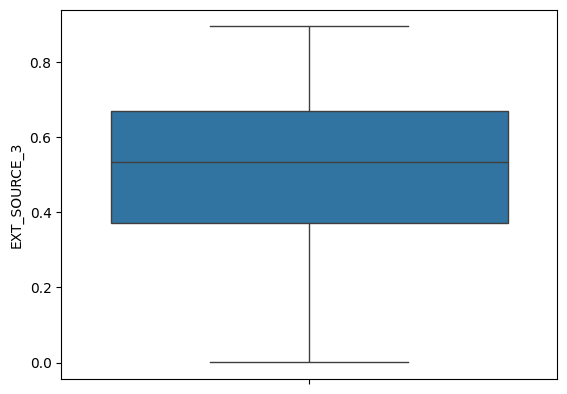

In [364]:
sns.boxplot(df.EXT_SOURCE_3)
plt.show()

Отримання процентильних значень для `EXT_SOURCE_3`

In [365]:
df.EXT_SOURCE_3.quantile(q = [0.25,0.5,0.75,1])

0.25   0.37
0.50   0.54
0.75   0.67
1.00   0.90
Name: EXT_SOURCE_3, dtype: float64

Найбільш повторюване значення в `EXT_SOURCE_3

In [366]:
df.EXT_SOURCE_3.mode()[0]

0.746300213050371

Перевірка середнього значення `EXT_SOURCE_3`

In [367]:
df.EXT_SOURCE_3.mean()

0.5108529061799658

**Спостереження**
-  Дивлячись на діагараму розмаху, медіана становить 0,535276
-  Найчастіше повторюване значення - 0,74630
-  Середнє значення - 0,51085
-  Хоча середнє та медіана є ближчими і можуть бути використані для імпутації, оскільки відсутнє відсоткове значення є більшим (19,83%), краще залишити дані як є і не проводити імпутації. Якщо метод вимагає імпутації, ми можемо імпутувати дані за допомогою медіани і створити ще один стовпчик, в якому буде позначено, які значення були імпутовані.

# ДЗ 1. Аналіз стовпців `AMT_REQ_CREDIT_BUREAU` з пропущеними значеннями

Виведіть середнє, моду, медіану та відсоток відсутніх даних для настуних колонок:

- `AMT_REQ_CREDIT_BUREAU_YEAR`
-	`AMT_REQ_CREDIT_BUREAU_MON`
-	`AMT_REQ_CREDIT_BUREAU_WEEK`

На основі виведених даних напишіть висновок про те, чи варто заповнювати пусті значення і якщо так, то яким чином?

In [368]:
null_df_under40[np.isin(null_df_under40['column_name'], 
                        ['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK'])]

column_name  null_count  null_percentage
118  AMT_REQ_CREDIT_BUREAU_WEEK       41519            13.50
119   AMT_REQ_CREDIT_BUREAU_MON       41519            13.50
121  AMT_REQ_CREDIT_BUREAU_YEAR       41519            13.50

Оскільки % та каунт пропущених значень в кожній з колонок є однаковим, припускаємо, що змінні взаємопов'язані і відсутність даних хоча б в одній з колонок - свідчить про відсутність даних в кожній з них. Перевіримо гіпотезу.

In [369]:
df_amt_req_credit_bureau = df[['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK']]
print('Сума нульових значень для колонки AMT_REQ_CREDIT_BUREAU_YEAR: ', df_amt_req_credit_bureau[~df_amt_req_credit_bureau['AMT_REQ_CREDIT_BUREAU_YEAR'].isna()].isnull().values.sum())
print('Сума нульових значень для колонки AMT_REQ_CREDIT_BUREAU_MON: ', df_amt_req_credit_bureau[~df_amt_req_credit_bureau['AMT_REQ_CREDIT_BUREAU_MON'].isna()].isnull().values.sum())
print('Сума нульових значень для колонки AMT_REQ_CREDIT_BUREAU_WEEK: ', df_amt_req_credit_bureau[~df_amt_req_credit_bureau['AMT_REQ_CREDIT_BUREAU_WEEK'].isna()].isnull().values.sum())

Сума нульових значень для колонки AMT_REQ_CREDIT_BUREAU_YEAR:  0
Сума нульових значень для колонки AMT_REQ_CREDIT_BUREAU_MON:  0
Сума нульових значень для колонки AMT_REQ_CREDIT_BUREAU_WEEK:  0


Отже, гіпотеза підтвердилась, за наявності Null значень в одній з колонок - кожно з колонок AMT_REQ_CREDIT_BUREAU_ матиме Null значення

#### Колонка `AMT_REQ_CREDIT_BUREAU_YEAR`
Створимо функцію, аби не дублювати інформацію з основними характеристиками колонки

In [370]:
def get_info_amt_req_credit_bureau(df, column_name):
    print(df[column_name].value_counts().head(), '\n')
    print(f'Значення {df[column_name].value_counts().head().index.values} займають {np.round(100 * df[column_name].value_counts(normalize=True).head().sum(), 2)}% усіх даних\n')
    print(f'Перцентилі для колонки {column_name}:\n', df[column_name].quantile(q = [0.25, 0.5, 0.75, 0.9, 0.999, 1]), '\n')
    print(f'Мода для колонки {column_name}:', df[column_name].mode()[0])
    print(f'Медіана для колонки {column_name}: ', df[column_name].median())
    print(f'Середнє значення для колонки {column_name}: ', df[column_name].mean(), '\n')

    sns.boxplot(df[column_name])
    plt.title(f"Boxplot for {column_name}")
    plt.show()

AMT_REQ_CREDIT_BUREAU_YEAR
0.00    71801
1.00    63405
2.00    50192
3.00    33628
4.00    20714
Name: count, dtype: int64 

Значення [0. 1. 2. 3. 4.] займають 90.13% усіх даних

Перцентилі для колонки AMT_REQ_CREDIT_BUREAU_YEAR:
 0.25    0.00
0.50    1.00
0.75    3.00
0.90    4.00
1.00    9.00
1.00   25.00
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64 

Мода для колонки AMT_REQ_CREDIT_BUREAU_YEAR: 0.0
Медіана для колонки AMT_REQ_CREDIT_BUREAU_YEAR:  1.0
Середнє значення для колонки AMT_REQ_CREDIT_BUREAU_YEAR:  1.899974435321363 



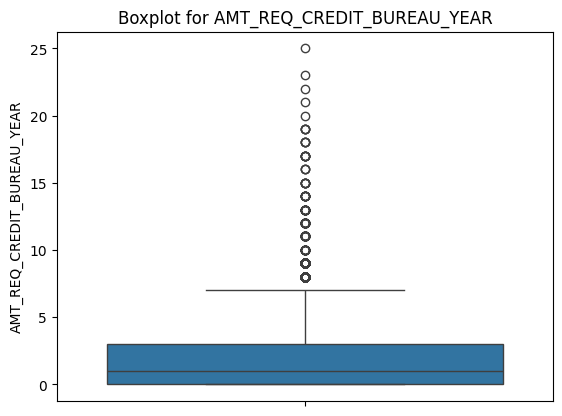

In [371]:
get_info_amt_req_credit_bureau(df_amt_req_credit_bureau, 'AMT_REQ_CREDIT_BUREAU_YEAR')

Спостереження по колонці `AMT_REQ_CREDIT_BUREAU_YEAR`
<ul>
    <li>В даній колонці <b>41519</b> відсутніх записів, що складає <b>13.5%</b> від усіх записів колонки</li>
    <li>Мода, медіана та середнє є близькими один до одного, проте зі спостережень, колонка містить цілочисельний тип та описує кількість звернень в кредитне бюро, тому для середнє значення <b>1.899</b> не коректно використовувати для імпутації </li>
    <li><b>90%</b> клієнтів мають не більше <b>4-х</b> звернень в кредитне бюро протягом року</li>
</ul>

AMT_REQ_CREDIT_BUREAU_MON
0.00    222233
1.00     33147
2.00      5386
3.00      1991
4.00      1076
Name: count, dtype: int64 

Значення [0. 1. 2. 3. 4.] займають 99.19% усіх даних

Перцентилі для колонки AMT_REQ_CREDIT_BUREAU_MON:
 0.25    0.00
0.50    0.00
0.75    0.00
0.90    1.00
1.00   12.00
1.00   27.00
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64 

Мода для колонки AMT_REQ_CREDIT_BUREAU_MON: 0.0
Медіана для колонки AMT_REQ_CREDIT_BUREAU_MON:  0.0
Середнє значення для колонки AMT_REQ_CREDIT_BUREAU_MON:  0.26739526000781977 



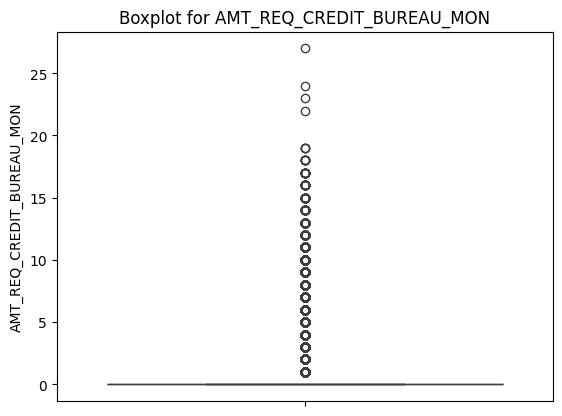

In [372]:
get_info_amt_req_credit_bureau(df_amt_req_credit_bureau, 'AMT_REQ_CREDIT_BUREAU_MON')

In [373]:
print(f'Значення 0 присутнє у {np.round(100 * df_amt_req_credit_bureau['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(normalize=True)[0], 2)}% випадків')

Значення 0 присутнє у 83.55% випадків


Спостереження по колонці `AMT_REQ_CREDIT_BUREAU_MON`
<ul>
    <li>В даній колонці <b>41519</b> відсутніх записів, що складає <b>13.5%</b> від усіх записів колонки аналогічно попередній</li>
    <li>Мода, медіана та середнє є дуже близькими один до одного, при чому значення <b>0</b> присутнє в більше <b>83.55%</b> усіх записів колонки</li>
    <li>Оскільки маємо менше <b>1%</b> усіх клієнтів з <b>4</b> та більше заявок в кредитне бюро, можемо припустити, що імпутаціями нулями в цілому можлива, але з додатковим позначенням про те, що стовпчики замінені вручну</li>
</ul>

AMT_REQ_CREDIT_BUREAU_WEEK
0.00    257456
1.00      8208
2.00       199
3.00        58
4.00        34
Name: count, dtype: int64 

Значення [0. 1. 2. 3. 4.] займають 99.99% усіх даних

Перцентилі для колонки AMT_REQ_CREDIT_BUREAU_WEEK:
 0.25   0.00
0.50   0.00
0.75   0.00
0.90   0.00
1.00   2.00
1.00   8.00
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64 

Мода для колонки AMT_REQ_CREDIT_BUREAU_WEEK: 0.0
Медіана для колонки AMT_REQ_CREDIT_BUREAU_WEEK:  0.0
Середнє значення для колонки AMT_REQ_CREDIT_BUREAU_WEEK:  0.0343619356973142 



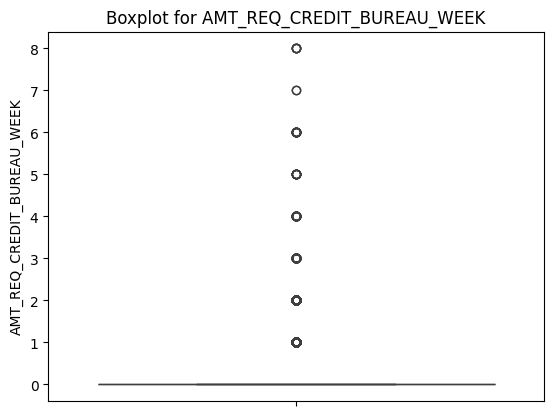

In [374]:
get_info_amt_req_credit_bureau(df_amt_req_credit_bureau, 'AMT_REQ_CREDIT_BUREAU_WEEK')

In [375]:
print(f'Значення 0 присутнє у {np.round(100 * df_amt_req_credit_bureau['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize=True)[0], 2)}% випадків')

Значення 0 присутнє у 96.79% випадків


Спостереження по колонці `AMT_REQ_CREDIT_BUREAU_WEEK`
<ul>
    <li>В даній колонці <b>41519</b> відсутніх записів, що складає <b>13.5%</b> від усіх записів колонки аналогічно попередній</li>
    <li>Мода, медіана та середнє є дуже близькими один до одного, при чому значення <b>0</b> присутнє в більше <b>96.79%</b> усіх записів колонки</li>
    <li>Аналогічно, імпутацію можна здійснювати, оскільки 96.79% записів містять 0, але потрібно вказати що Null значення стовпчика були заміненими</li>
</ul>

#### Загальні висновки по `AMT_REQ_CREDIT_BUREAU_YEAR`, `AMT_REQ_CREDIT_BUREAU_MON`, `AMT_REQ_CREDIT_BUREAU_WEEK`
<ul>
    <li>Дані в колонках пов'язані між собою. Якщо відсутній запис в хоча б з одній колонок - усі <b>3</b> колонки не матимуть даних в рядку</li>
    <li>Кількість Null значень складають <b>13.5%</b></li>
    <li>Колонка AMT_REQ_CREDIT_BUREAU показує: кількість запитів до бюро кредитних історій про клієнта за ... до подачі заявки (не враховуючи тиждень до подачі заявки). Тобто Null значення можуть свідчити про те, що був здійснений запит в кредитне бюро в тиждень подачі заявки, тобто <s>(не враховуючи тиждень до подачі заявки)</s>.</li>
    <li>Відповідно до поставленої задачі: якщо нам потрібно аналізувати таких клієнтів, доцільно створити окрему колонку (групу) яка показує що заявки була подана в тиждень подачі. Якщо не потрібно - можемо заповнювати <b>Null</b> значення.</li>
    <li>Колонку AMT_REQ_CREDIT_BUREAU_MON та AMT_REQ_CREDIT_BUREAU_WEEK можемо заповнити значенням <b>0</b>, оскільки воно покриває більшість значень цієї колонки. Колонку AMT_REQ_CREDIT_BUREAU_YEAR доцільно заповнити значенням <b>0</b> оскільки воно логічніше підпадає під умову завдання.</li>
</ul>

#### Висновок: хоч статистичні показники для колонок `AMT_REQ_CREDIT_BUREAU_YEAR`, `AMT_REQ_CREDIT_BUREAU_MON`, `AMT_REQ_CREDIT_BUREAU_WEEK` є досить близькими, я б залишив би значення `Null`, оскільки вони можуть описувати іншу групу клієнтів. Якщо в умові задачі потрібно їх врахувати, доцільно замінити усі значення цих колонок на `0`.

In [376]:
# cnt = df[df['AMT_REQ_CREDIT_BUREAU_MON'] >= 4][['AMT_REQ_CREDIT_BUREAU_MON', 'TARGET']].groupby('TARGET').value_counts(normalize=True)
# cnt.unstack('TARGET').sort_values(
#         by=[0, 1][0], ascending=False
#         ).plot.bar()

## Перевірка стовпців зі значеннями NULL > 0% та < 1%

Створення датафрейму `null_df_under1` з відсотком пропущених значень > 0% та < 1% у кожному стовпці

In [377]:
null_df_under1 = null_df[(null_df['null_percentage'] > 0) & (null_df['null_percentage'] < 1)]

In [378]:
null_df_under1.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
11           NAME_TYPE_SUITE        1292             0.42
91  OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
92  DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
93  OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
94  DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
42              EXT_SOURCE_2         660             0.21
10           AMT_GOODS_PRICE         278             0.09

### Аналіз стовпця `NAME_TYPE_SUITE`

In [379]:
null_df_under1[null_df_under1.column_name == 'NAME_TYPE_SUITE']

column_name  null_count  null_percentage
11  NAME_TYPE_SUITE        1292             0.42

In [380]:
df['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

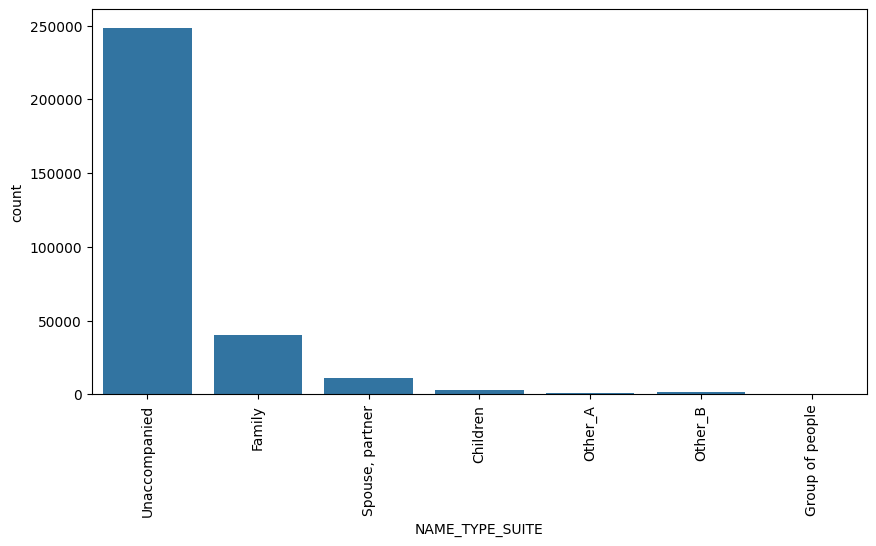

In [381]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = "NAME_TYPE_SUITE")
plt.xticks(rotation = 90)
plt.show()

**Спостереження**
-   Дивлячись на графік, категорія `Unaccompanied` має найбільшу кількість заявників на отримання кредиту. Отже, більшість позичальників наважуються звертатися за кредитом без супроводу.
- Ми можемо продовжити імпутацію `Unaccompanied` в датафреймі, але краше надати перевагу другому варіанту.
- Ми також могли б імпутувати дані зі значенням `NA`, оскільки ця колонка є категоричною.
- Аналогічно, якщо в колонці не вистачає менше 1% даних, ми можемо її опустити. Але якщо ми вилучимо всі дані в усіх стовпчиках, де пропущено <=1% даних, ми можемо вилучити занадто багато даних. Тому я здебільшого зберігаю дані настільки, наскільки це можливо.

In [382]:
df['NAME_TYPE_SUITE'].fillna('NA', inplace=True)

### Аналіз стовпця `OBS_30_CNT_SOCIAL_CIRCLE`

In [383]:
null_df_under1[null_df_under1.column_name == 'OBS_30_CNT_SOCIAL_CIRCLE']

column_name  null_count  null_percentage
91  OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33

In [384]:
df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts().head(10)

OBS_30_CNT_SOCIAL_CIRCLE
0.00    163910
1.00     48783
2.00     29808
3.00     20322
4.00     14143
5.00      9553
6.00      6453
7.00      4390
8.00      2967
9.00      2003
Name: count, dtype: int64

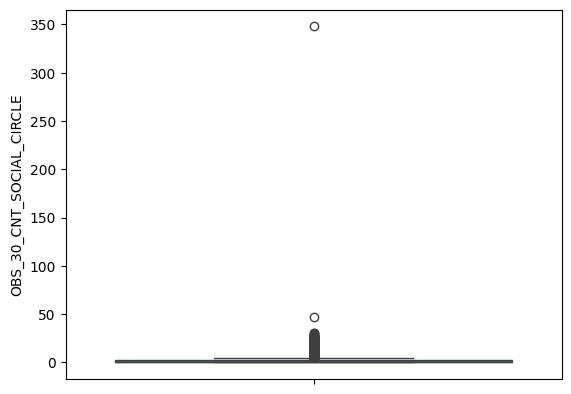

In [385]:
sns.boxplot(df.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()

Розрахунок перцентилів `OBS_30_CNT_SOCIAL_CIRCLE`

In [386]:
df.OBS_30_CNT_SOCIAL_CIRCLE.quantile(q = [0.25,0.5,0.75,1])

0.25     0.00
0.50     0.00
0.75     2.00
1.00   348.00
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

Найбільш повторюване значення в `OBS_30_CNT_SOCIAL_CIRCLE`

In [387]:
df.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0]

0.0

Середнє значення `OBS_30_CNT_SOCIAL_CIRCLE`

In [388]:
df.OBS_30_CNT_SOCIAL_CIRCLE.mean()

1.4222454239942575

In [389]:
df.OBS_30_CNT_SOCIAL_CIRCLE.median()

0.0

**Спостереження**
- Дивлячись на діаграму розмаху, медіана дорівнює 0.0
- Найчастіше повторюване значення - 0.0
- Середнє значення - 1,4222
- Є два викидні значення на рівні 50 та 350.
- Медіана і мода близькі (з огляду на діапазон даних у цьому стовпчику) і можуть бути використані для імпутації. Це не призведе до зміщення, оскільки відсоток пропущених значень невеликий (0,33%)

In [390]:
df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

# ДЗ 2. Аналіз і заповнення пустих значень у колонках з малим відсотком пропущених

За прикладом вище проведіть аналіз пропущених значень в колонках
- EXT_SOURCE_2
- AMT_GOODS_PRICE

Для швидшого аналізу рекомендую написати фукнцію, яку Ви зможете викликати для кожної з колонок.

Зробіть висновок, що робити з пропущеними значеннями в кожному випадку і виконанайте ту дію, яку зазначили.

In [391]:
null_df_under1[null_df_under1.column_name == 'EXT_SOURCE_2']

column_name  null_count  null_percentage
42  EXT_SOURCE_2         660             0.21

In [392]:
def get_info_null_under_1(df, column_name):
    print(f"Кількість пропущених значень для {column_name}\n")
    print(null_df_under1[null_df_under1.column_name == column_name], '\n')
    print(f"Топ 10 найбільш повторюваних значень\n")
    print(100 * df[column_name].value_counts(normalize=True).head(10), '\n')

    sns.boxplot(df[column_name])
    plt.show()

    print(f"Квантилі для колонки {column_name}:\n", df.eval(column_name).quantile(q = [0.25,0.5,0.75,0.9,0.99,1]), '\n')
    print(f"Mode for {column_name} column: ", df.eval(column_name).mode()[0])
    print(f"Median for {column_name} column: ", df.eval(column_name).median())
    print(f"Mean for {column_name} column: ", df.eval(column_name).mean())

Кількість пропущених значень для EXT_SOURCE_2

     column_name  null_count  null_percentage
42  EXT_SOURCE_2         660             0.21 

Топ 10 найбільш повторюваних значень

EXT_SOURCE_2
0.29   0.23
0.26   0.14
0.27   0.11
0.16   0.10
0.27   0.10
0.27   0.08
0.26   0.08
0.16   0.08
0.16   0.08
0.16   0.06
Name: proportion, dtype: float64 



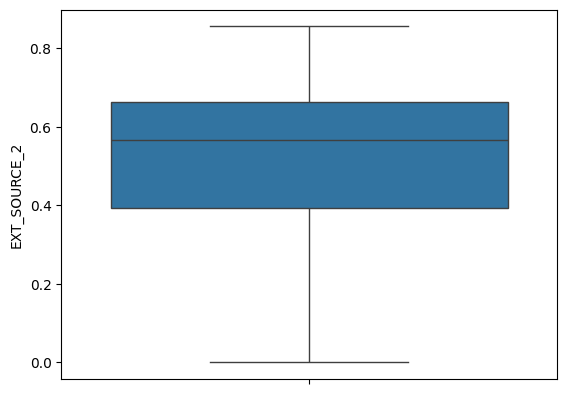

Квантилі для колонки EXT_SOURCE_2:
 0.25   0.39
0.50   0.57
0.75   0.66
0.90   0.72
0.99   0.78
1.00   0.85
Name: EXT_SOURCE_2, dtype: float64 

Mode for EXT_SOURCE_2 column:  0.2858978721410488
Median for EXT_SOURCE_2 column:  0.5659614260608526
Mean for EXT_SOURCE_2 column:  0.5143926741308462


In [393]:
get_info_null_under_1(df, 'EXT_SOURCE_2')

Спостереження за колонкою `EXT_SOURCE_2`: дані не мають викидів, середнє значення та медіана є близькими, а мода зміщеною. Різниця значень між <b>75</b> та <b>50</b> перцентилями є меншою ніж між <b>50</b> та <b>25</b> <i>(9 та 18 відповідно)</i>. Тому доцільніше заповнити значенням ближчим до вищих перцентилів, в нашому випадку - медіаною <b>0.5659614260608526</b>.

In [394]:
df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].median(), inplace=True)

In [395]:
df['EXT_SOURCE_2'].isna().values.sum()

0

Заміна здійснено коректно, через низький % пропущених даних - 0.21% заміна нульових значень до зміщення не приведе

Кількість пропущених значень для AMT_GOODS_PRICE

        column_name  null_count  null_percentage
10  AMT_GOODS_PRICE         278             0.09 

Топ 10 найбільш повторюваних значень

AMT_GOODS_PRICE
450000.00    8.47
225000.00    8.23
675000.00    8.12
900000.00    5.02
270000.00    3.72
180000.00    3.29
454500.00    2.98
1125000.00   2.95
135000.00    2.67
315000.00    1.70
Name: proportion, dtype: float64 



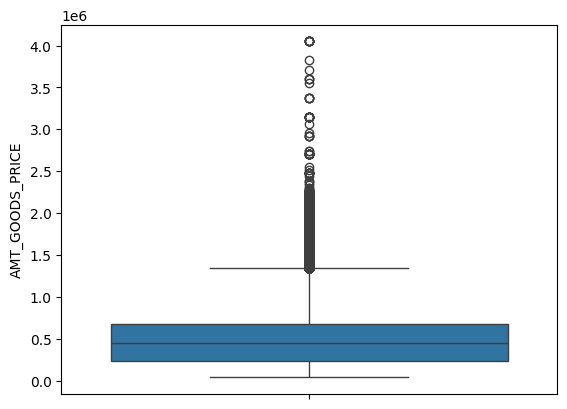

Квантилі для колонки AMT_GOODS_PRICE:
 0.25    238500.00
0.50    450000.00
0.75    679500.00
0.90   1093500.00
0.99   1800000.00
1.00   4050000.00
Name: AMT_GOODS_PRICE, dtype: float64 

Mode for AMT_GOODS_PRICE column:  450000.0
Median for AMT_GOODS_PRICE column:  450000.0
Mean for AMT_GOODS_PRICE column:  538396.2074288895


In [396]:
get_info_null_under_1(df, 'AMT_GOODS_PRICE')

Спостереження за колонкою `AMT_GOODS_PRICE`: 
- % пропущених значень в колонці складає **0.09%**
- дані мають викиди, що спричиняє зміщенню середнього значення по колонці **538396.207**
- медіана та мода співпадають та приймають значення **450000.0**
- для імпутації в даному випадку доцільно використати моду/медіану. Через низький % пропущених даних це не призведе до зміщення

In [397]:
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].median(), inplace=True)

In [398]:
df['AMT_GOODS_PRICE'].isna().values.sum()

0

Імпутація здійснена коректно, пропущених значень не залишилось

# Робота з неправильними/невідомими значеннями даних

### Аналіз стовпця `CODE_GENDER`

Перевірка діапазону значень

In [399]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

Стать має бути тільки чоловіча або жіноча. Значення `XNA` може вказувати на те, що значення не було надано заявником або пропущено кредитним спеціалістом, який перевіряє заявку

In [400]:
df[df['CODE_GENDER'] == 'XNA']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
35657      141289       0    Revolving loans         XNA             1   
38566      144669       0    Revolving loans         XNA             0   
83382      196708       0    Revolving loans         XNA             0   
189640     319880       0    Revolving loans         XNA             1   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                 1             0         207000.00   382500.00   
38566                 1             2         157500.00   270000.00   
83382                 1             1         135000.00   405000.00   
189640                1             0         247500.00   540000.00   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
35657      19125.00        337500.00   Unaccompanied               Working   
38566      13500.00        225000.00          Family               Working   
83382      20250.00        225000.00   Unaccompanied               Working   
189640     27000.00        900000.00   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
35657   Secondary / secondary special            Married  Municipal apartment   
38566   Secondary / secondary special            Married    House / apartment   
83382                Higher education            Married    House / apartment   
189640              Incomplete higher     Civil marriage    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35657                         0.02      -20232         -10044   
38566                         0.03      -13717          -2797   
83382                         0.04      -10647          -1228   
189640                        0.04       -9649          -2293   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
35657           -10024.00            -3537           1               1   
38566            -2241.00            -4659           1               1   
83382             -183.00            -1671           1               1   
189640           -4099.00            -2326           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
35657                 1                 1           1           0   
38566                 1                 1           1           0   
83382                 1                 1           1           0   
189640                1                 1           1           0   

           OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
35657              Unknown             2.00                     3   
38566   Low-skill Laborers             4.00                     2   
83382           Core staff             3.00                     2   
189640             Unknown             2.00                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
35657                             3                    TUESDAY   
38566                             2                     FRIDAY   
83382                             2                   THURSDAY   
189640                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
35657                        10                           0   
38566                        16                           0   
83382                        15                           0   
189640                       15                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
35657                            0                            0   
38566                            0                            0   
83382                            0                            0   
189640                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
35657                        0                       

Оскільки дані виглядають достовірними, ми перевіримо можливість застосування методу імпутації.
- Заявників-жінок удвічі більше, ніж заявників-чоловіків
- Отже, ми прирівняємо `CODE_GENDER` до 'F'

In [401]:
df['CODE_GENDER'] = df['CODE_GENDER'].apply(lambda x: 'F' if x == 'XNA' else x)

Перевірка, чи вилучено `XNA`

In [402]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

### Аналіз стовпця `DAYS_BIRTH`

In [403]:
df['DAYS_BIRTH'].value_counts().head()

DAYS_BIRTH
-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
Name: count, dtype: int64

Існує ~17K+ унікальних записів, всі з яких, схоже, мають від'ємні значення

In [404]:
df['DAYS_BIRTH'].unique()

array([ -9461, -16765, -19046, ...,  -7951,  -7857, -25061])

In [405]:
df['DAYS_BIRTH'].nunique()

17460

In [406]:
df['DAYS_BIRTH'].describe()

count   307511.00
mean    -16037.00
std       4363.99
min     -25229.00
25%     -19682.00
50%     -15750.00
75%     -12413.00
max      -7489.00
Name: DAYS_BIRTH, dtype: float64

Перетворення `Days Birth` на додатні дні

In [407]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: -x if x < 0 else x)

In [408]:
df['DAYS_BIRTH'].value_counts()

DAYS_BIRTH
13749    43
13481    42
18248    41
10020    41
15771    40
         ..
24898     1
24868     1
8017      1
25098     1
25061     1
Name: count, Length: 17460, dtype: int64

Всі дні в `DAYS_BIRTH` мають додатні значення - це може бути зручніше для аналізу.

#### Створимо нову колонку `YEARS_BIRTH` для зручності аналізу

In [409]:
df['YEARS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: round(x/365))

### Аналіз стовпця `NAME_FAMILY_STATUS`

Перевірка діапазону значень

In [410]:
df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

Стать має бути тільки чоловіча або жіноча. Значення `Unknown` може означати, що значення не було вказане заявником або пропущене кредитним спеціалістом, який перевіряє заявку

In [411]:
df[df['NAME_FAMILY_STATUS'] == 'Unknown']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
41982      148605       0    Revolving loans           M             0   
187348     317181       0    Revolving loans           F             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                 1             0         450000.00   675000.00   
187348                1             0         202500.00   585000.00   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982      33750.00        450000.00              NA  Commercial associate   
187348     29250.00        450000.00              NA  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary            Unknown  Municipal apartment   
187348    Higher education            Unknown    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
41982                         0.02       12396          -1161   
187348                        0.03       12844           -232   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
41982            -3265.00            -4489           1               1   
187348           -1597.00            -1571           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
41982                 1                 1           1           0   
187348                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
41982         Managers              NaN                     2   
187348     Accountants              NaN                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
41982                             2                   THURSDAY   
187348                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
41982                        15                           0   
187348                       14                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
41982                            1                            1   
187348                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
41982                        0                       1   
187348                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
41982                         1               Insurance          0.70   
187348                        0  Business Entity Type 2          0.65   

        EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
41982            NaN                      3.00                      0.00   
187348          0.67                      1.00                      0.00   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
41982                       3.00                      0.00   
187348                      1.00                      0.00   

        DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
41982                  -876.00                0                0   
187348                 -654.00                0                0   

        FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
41982                 0                1                0                0   
187348                0                0                0                1   

        FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
41982                 0                0                 0                 0   
187348                0                0                 0                 0   

        FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
41982                  0                 0                 0   
187348                 0                 0                 0   

        FLAG_DOCUMENT_15 

In [412]:
df['NAME_FAMILY_STATUS'].value_counts(normalize = True) * 100

NAME_FAMILY_STATUS
Married                63.88
Single / not married   14.78
Civil marriage          9.68
Separated               6.43
Widow                   5.23
Unknown                 0.00
Name: proportion, dtype: float64

Оскільки дані виглядають достовірними, ми продовжимо перевірку методу імпутації.
- Одружені заявники складають понад 63% заявників.
- Отже, ми прирівняємо `NAME_FAMILY_STATUS` до `Married`.

In [413]:
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].apply(lambda x: 'Married' if x == 'Unknown' else x)

Перевірка чи вилучено `Unknown`

In [414]:
df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: count, dtype: int64

### Аналіз стовпця`DAYS_EMPLOYED`

In [415]:
df['DAYS_EMPLOYED'].value_counts().head()

DAYS_EMPLOYED
 365243    55374
-200         156
-224         152
-230         151
-199         151
Name: count, dtype: int64

In [416]:
df['DAYS_EMPLOYED'].value_counts(normalize = True) * 100

DAYS_EMPLOYED
 365243   18.01
-200       0.05
-224       0.05
-230       0.05
-199       0.05
           ... 
-13961     0.00
-11827     0.00
-10176     0.00
-9459      0.00
-8694      0.00
Name: proportion, Length: 12574, dtype: float64

In [417]:
len(df[df['DAYS_EMPLOYED'] < 365243])

252137

In [418]:
df[df['DAYS_EMPLOYED'] < 365243].DAYS_EMPLOYED.value_counts()

DAYS_EMPLOYED
-200      156
-224      152
-199      151
-230      151
-212      150
         ... 
-13961      1
-11827      1
-10176      1
-9459       1
-8694       1
Name: count, Length: 12573, dtype: int64

In [419]:
df['DAYS_EMPLOYED'].unique()

array([  -637,  -1188,   -225, ..., -12971, -11084,  -8694])

In [420]:
df['DAYS_EMPLOYED'].nunique()

12574

**Спостереження**
- Існує ~55K+ записів, для яких `DAYS_EMPLOYED` дорівнює 365243 дням
- Решта 252K+ записів мають від'ємне значення днів
- Існує 12 574 унікальних значень для `DAYS_EMPLOYED`

 - Колонка `DAYS_EMPLOYED` вказує на те, за скільки днів до подачі заявки особа почала поточну роботу, заявник/кредитний спеціаліст повинен ввести від'ємні значення, щоб вказати дні, що передують даті подачі заявки.<br>
 - Ми конвертуємо від'ємні значення в `DAYS_EMPLOYED` в додатні дні, щоб стандартизувати дні під час використання в розрахунках

In [421]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: -x if x < 0 else x)

In [422]:
df['DAYS_EMPLOYED'].value_counts().head()

DAYS_EMPLOYED
365243    55374
200         156
224         152
230         151
199         151
Name: count, dtype: int64

Ми бачимо, що всі дні в `DAYS_EMPLOYED` мають додатні значення

**Для ~55K+ записів, для яких `DAYS_EMPLOYED` становить 365243 дні**
- Конвертуючи це в роки, ми отримуємо 1000 років, які фізично неможливо використати для працевлаштування заявника
- Це відповідає 18% даних і не може бути аномалією
- Вони можуть бути або пенсіонерами, або безробітними, і, дивлячись на дані, наш висновок є правильним

> Є два способи впоратися з цим
>> 1) Ми залишаємо дані такими, якими вони є, і враховуємо це під час аналізу АБО  <br>
>> 2) Ми розраховуємо середню кількість днів зайнятості без урахування цієї категорії та вписуємо її замість 365243 днів для пенсіонерів. <br>
>> Для безробітних кількість днів зайнятості може дорівнювати 0

*Примітка*
 - Під час розрахунків у цьому стовпчику ми повинні враховувати цей сценарій, оскільки інакше він спотворює наші результати

In [423]:
df[df['DAYS_EMPLOYED'] == 365243].NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Pensioner     55352
Unemployed       22
Name: count, dtype: int64

#### Створимо нову колонку `YEARS_EMPLOYED` для зручності аналізу

In [424]:
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_REGISTRATION`

In [425]:
df['DAYS_REGISTRATION'].value_counts().head()

DAYS_REGISTRATION
-1.00    113
-7.00     98
-6.00     96
-4.00     92
-2.00     92
Name: count, dtype: int64

In [426]:
df['DAYS_REGISTRATION'].value_counts(normalize = True).head()

DAYS_REGISTRATION
-1.00   0.00
-7.00   0.00
-6.00   0.00
-4.00   0.00
-2.00   0.00
Name: proportion, dtype: float64

In [427]:
df['DAYS_REGISTRATION'].unique()

array([ -3648.,  -1186.,  -4260., ..., -16396., -14558., -14798.])

In [428]:
df['DAYS_REGISTRATION'].nunique()

15688

Перетворення `DAYS_REGISTRATION` в додатні дні

In [429]:
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: -x if x < 0 else x)

In [430]:
df['DAYS_REGISTRATION'].value_counts().head()

DAYS_REGISTRATION
1.00    113
7.00     98
6.00     96
4.00     92
2.00     92
Name: count, dtype: int64

Всі дні в `DAYS_REGISTRATION` мають додатні значення

#### Створимо нову колонку `YEARS_REGISTRATION` для зручності аналізу

In [431]:
df['YEARS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_ID_PUBLISH`

In [432]:
df['DAYS_ID_PUBLISH'].value_counts().head()

DAYS_ID_PUBLISH
-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
Name: count, dtype: int64

In [433]:
df['DAYS_ID_PUBLISH'].value_counts(normalize = True).head()

DAYS_ID_PUBLISH
-4053   0.00
-4095   0.00
-4046   0.00
-4417   0.00
-4256   0.00
Name: proportion, dtype: float64

In [434]:
df['DAYS_ID_PUBLISH'].unique()

array([-2120,  -291, -2531, ..., -6194, -5854, -6211])

In [435]:
df['DAYS_ID_PUBLISH'].nunique()

6168

Перетворення `DAYS_ID_PUBLISH` в додатні дні

In [436]:
df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: -x if x < 0 else x)

In [437]:
df['DAYS_ID_PUBLISH'].value_counts().head()

DAYS_ID_PUBLISH
4053    169
4095    162
4046    161
4417    159
4256    158
Name: count, dtype: int64

Всі дні в `DAYS_ID_PUBLISH` мають додатні значення

#### Створимо нову колонку `YEARS_ID_PUBLISH` для зручності аналізу

In [438]:
df['YEARS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_LAST_PHONE_CHANGE`

In [439]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

DAYS_LAST_PHONE_CHANGE
0.00     37672
-1.00     2812
-2.00     2318
-3.00     1763
-4.00     1285
Name: count, dtype: int64

In [440]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts(normalize = True).head()

DAYS_LAST_PHONE_CHANGE
0.00    0.12
-1.00   0.01
-2.00   0.01
-3.00   0.01
-4.00   0.00
Name: proportion, dtype: float64

In [441]:
df['DAYS_LAST_PHONE_CHANGE'].unique()

array([-1134.,  -828.,  -815., ..., -3988., -3899., -3538.])

In [442]:
df['DAYS_LAST_PHONE_CHANGE'].nunique()

3773

Перетворення `DAYS_LAST_PHONE_CHANGE` в додатні дні

In [443]:
df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: -x if x < 0 else x)

In [444]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

DAYS_LAST_PHONE_CHANGE
0.00    37672
1.00     2812
2.00     2318
3.00     1763
4.00     1285
Name: count, dtype: int64

Всі дні в `DAYS_LAST_PHONE_CHANGE` мають додатні значення

#### Створення нової колонки `YEARS_LAST_PHONE_CHANGE` для зручності аналізу

In [445]:
df['YEARS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: round(x/365,0))

# Автоматичні функції

### Створення функції `age_cat` для категоризації `YEARS_BORNING`

In [446]:
def age_cat(years):
    if years <= 20:
        return '0-20'
    elif years > 20 and years <= 30:
        return '20-30'
    elif years > 30 and years <= 40:
        return '30-40'
    elif years > 40 and years <= 50:
        return '40-50'
    elif years > 50 and years <= 60:
        return '50-60'
    elif years > 60 and years <= 70:
        return '60-70'
    elif years > 70:
        return '70+'

### Одномірний (категоріальний vs цільовий) та двомірний (категоріальний vs категоріальний) аналіз (гістограма) - категоріальні стовпчики

In [447]:
import matplotlib.pyplot as plt


def bi_cat_countplot(df, column, hue_column):
    unique_hue_values = df[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,6)

    pltname = f'Нормалізований розподіл за: {column}'
    proportions = df.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[0], title=pltname)

    # анотація значень в барплоті
    for container in ax.containers:
        ax.bar_label(container, fmt='{:,.1f}%')

    pltname = f'Кількість за: {column}'
    counts = df.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[1], title=pltname)

    for container in ax.containers:
      ax.bar_label(container)


def uni_cat_target_compare(df, column):
    bi_cat_countplot(df, column, hue_column='TARGET' )


def bi_countplot_target(df0, df1, column, hue_column):
  pltname = 'Клієнт зі складнощами щодо платності'
  print(pltname.upper())
  bi_cat_countplot(df1, column, hue_column)
  plt.show()

  pltname = 'Клієнти зі своєчасними платежами'
  print(pltname.upper())
  bi_cat_countplot(df0, column, hue_column)
  plt.show()


### Обчислення мінімального та максимального діапазону відхилень для числових стовпців

In [448]:
def outlier_range(dataset,column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    return Max_value

# Робота з викидами для числових стовпців

In [449]:
import warnings

def dist_box(dataset, column):
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")

      plt.figure(figsize=(16,6))

      plt.subplot(1,2,1)
      sns.distplot(dataset[column], color = 'purple')
      pltname = 'Графік розподілу для ' + column
      plt.ticklabel_format(style='plain', axis='x')
      plt.title(pltname)

      plt.subplot(1,2,2)
      red_diamond = dict(markerfacecolor='r', marker='D')
      sns.boxplot(y = column, data = dataset, flierprops = red_diamond)
      pltname = 'Боксплот для ' + column
      plt.title(pltname)

      plt.show()

### Аналіз стовпця`CNT_CHILDREN`

In [450]:
df['CNT_CHILDREN'].value_counts().sort_values(ascending = False).head()

CNT_CHILDREN
0    215371
1     61119
2     26749
3      3717
4       429
Name: count, dtype: int64

In [451]:
(df['CNT_CHILDREN'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

CNT_CHILDREN
0   70.04
1   19.88
2    8.70
3    1.21
4    0.14
Name: proportion, dtype: float64

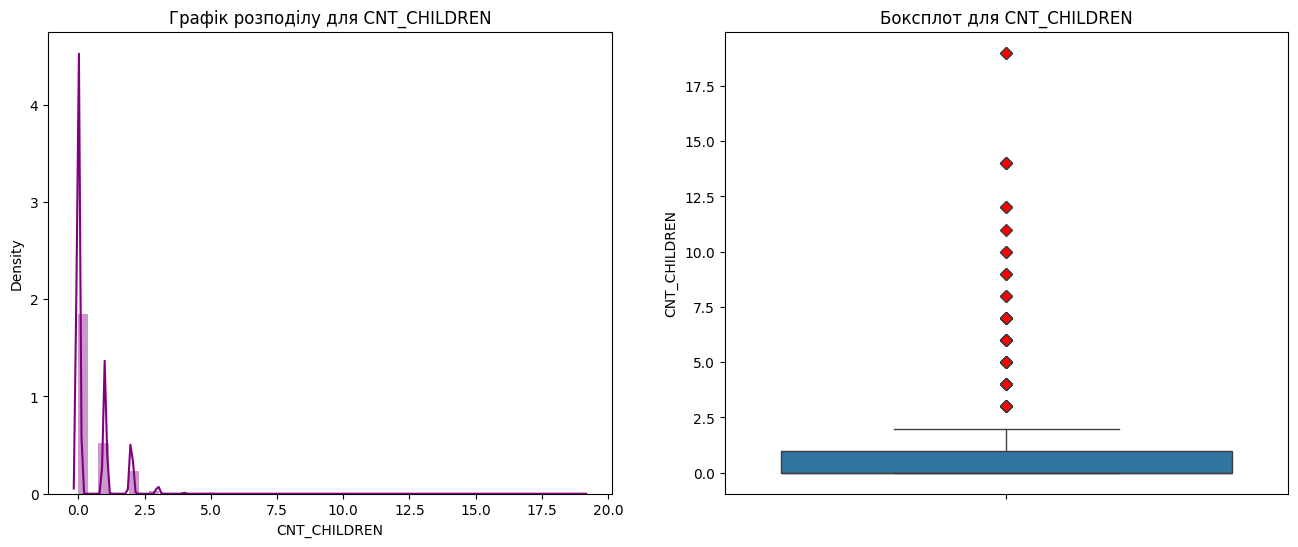

In [452]:
dist_box(df,'CNT_CHILDREN')

Розрахуємо IQR (Inter Quartile range)

In [453]:
Q1 = df['CNT_CHILDREN'].quantile(0.25)
Q3 = df['CNT_CHILDREN'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.0


Значення *до* (Q1 - 1,5 * IQR) та *після* (Q3 + 1,5 * IQR) є викидами

In [454]:
Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value))

Мінімальне значення, до якого існують викиди: -1.5
Максимальне значення, після якого існують викиди: 2.5


**Спостереження**
- Дивлячись на дані, ми бачимо, що кількість заявників, які мають більше 7 дітей, є дуже мінімальною (2 або 3 в кожній категорії)
- Крім того, дивлячись на дані для заявників з 10 дітьми, заявники мають лише 31 й 41 рік відповідно. Це виглядає як одиничний випадок й може розглядатися як відхилення від норми
- Як дистрибутивні, так і діаграми розмаху чітко показують, що значення, які перевищують значення 2.5, є відхиленнями від норми.

**Висновок**
- Заявники, які мають 3 або більше дітей, є випадками, що відхиляються від норми. Ми можемо надати спеціальний аналіз для цих випадків.

### Аналіз стовпця `AMT_INCOME_TOTAL`

In [455]:
df['AMT_INCOME_TOTAL'].value_counts().sort_values(ascending = False).head()

AMT_INCOME_TOTAL
135000.00    35750
112500.00    31019
157500.00    26556
180000.00    24719
90000.00     22483
Name: count, dtype: int64

In [456]:
(df['AMT_INCOME_TOTAL'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

AMT_INCOME_TOTAL
135000.00   11.63
112500.00   10.09
157500.00    8.64
180000.00    8.04
90000.00     7.31
Name: proportion, dtype: float64

In [457]:
df['AMT_INCOME_TOTAL'].describe(percentiles = [0.75,0.99,0.999])

count      307511.00
mean       168797.92
std        237123.15
min         25650.00
50%        147150.00
75%        202500.00
99%        472500.00
99.9%      900000.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

Побудуємо графік для `AMT_INCOME_TOTAL`

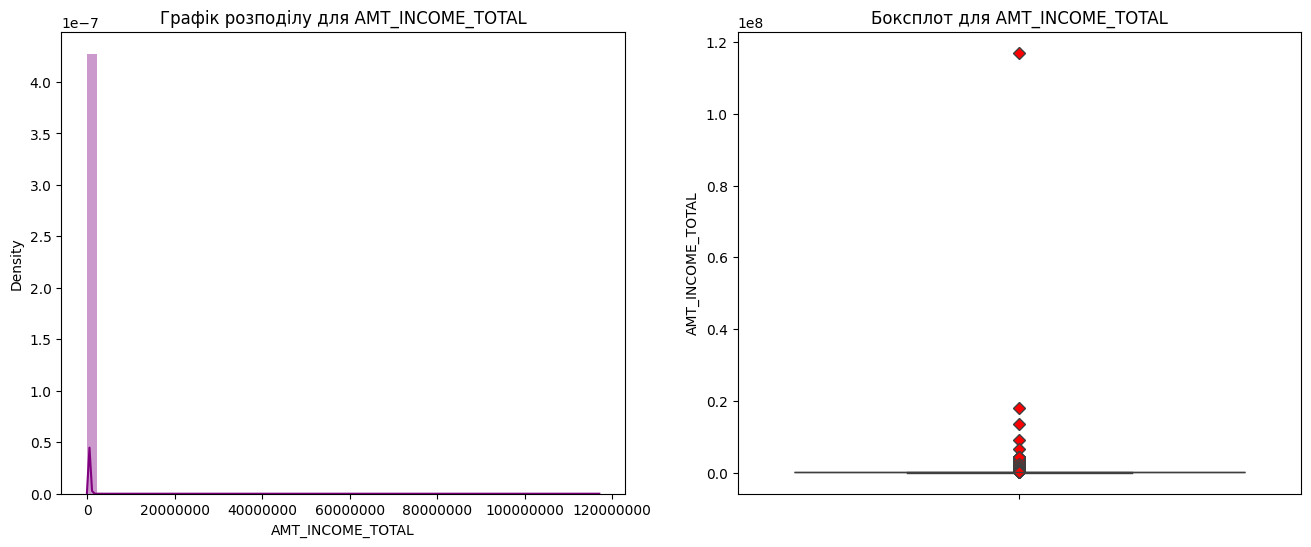

In [458]:
dist_box(df,'AMT_INCOME_TOTAL')

- Графіки кінцевого результату дуже тонкі, й ми можемо спостерігати викид близько ~120 мільйонів.
- Давайте побудуємо графік, розглядаючи лише дохід нижче 99,9% значення, тобто 900 тисяч.

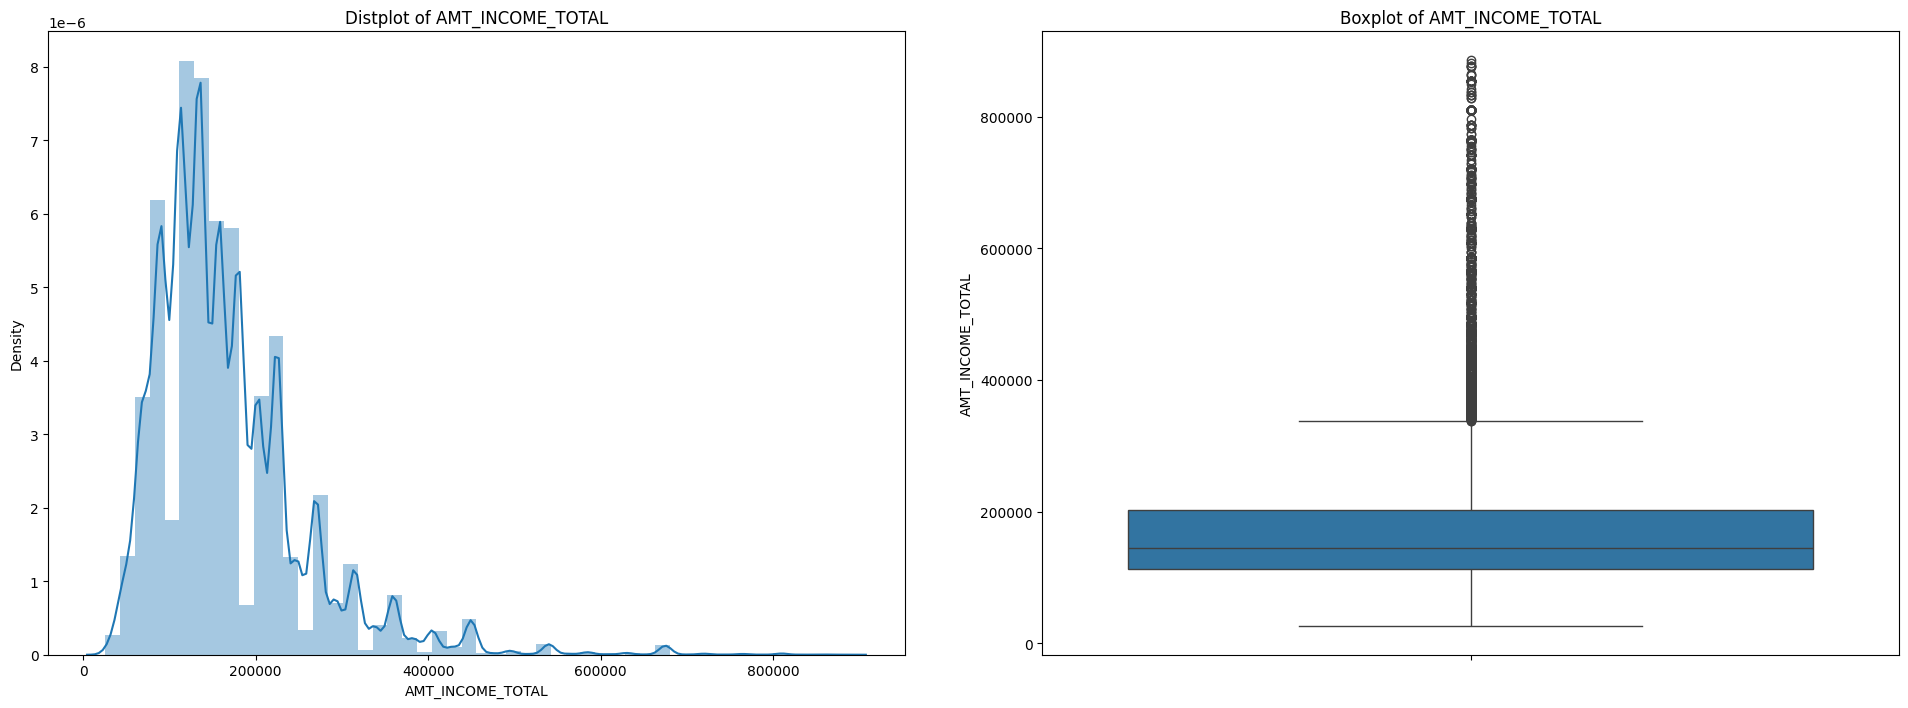

In [459]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.subplots(1,2 ,figsize = (20,8))

    plt.subplot(121)
    sns.distplot(df[df['AMT_INCOME_TOTAL'] < 900000].AMT_INCOME_TOTAL)
    pltname = 'Distplot of ' + 'AMT_INCOME_TOTAL'
    plt.title(pltname)

    plt.subplot(122)
    sns.boxplot(df[df['AMT_INCOME_TOTAL'] < 900000].AMT_INCOME_TOTAL)
    pltname = 'Boxplot of ' + 'AMT_INCOME_TOTAL'
    plt.title(pltname)

    plt.tight_layout(pad = 4)
    plt.show()

Тепер ми можемо чітко побачити розподіл і діапазон даних на обох графіках.
 - Це означає, що значення понад 900 тис. грн доходу явно є викидами

In [460]:
df[df['AMT_INCOME_TOTAL'] > 900000].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
1504     101769       0    Revolving loans           M             1   
1723     102015       0         Cash loans           F             0   
3371     103938       0         Cash loans           F             0   
4603     105384       0    Revolving loans           F             1   
5673     106637       0         Cash loans           M             1   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1504                1             0        1080000.00   180000.00   
1723                1             0        1935000.00   269550.00   
3371                0             1        1350000.00  2410380.00   
4603                1             0        1350000.00   405000.00   
5673                1             3         967500.00   450000.00   

      AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
1504      9000.00        180000.00   Unaccompanied  Commercial associate   
1723     10534.50        225000.00   Unaccompanied             Pensioner   
3371    109053.00       2250000.00              NA  Commercial associate   
4603     20250.00        405000.00   Unaccompanied  Commercial associate   
5673     30073.50        450000.00   Unaccompanied  Commercial associate   

                NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1504               Higher education            Married  House / apartment   
1723  Secondary / secondary special            Married  House / apartment   
3371               Higher education            Married  House / apartment   
4603               Higher education            Married  House / apartment   
5673               Higher education            Married  House / apartment   

      REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
1504                        0.07       13633           5536   
1723                        0.01       18636         365243   
3371                        0.07       12213            843   
4603                        0.02       14781           4768   
5673                        0.05       11901            546   

      DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
1504               3.00             4971           1               1   
1723            3401.00             2168           1               0   
3371             757.00             4132           1               1   
4603            3469.00             4045           1               1   
5673            2932.00              215           1               1   

      FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
1504                0                 1           0           0   
1723                0                 1           1           0   
3371                0                 1           1           0   
4603                0                 1           0           0   
5673                0                 1           0           0   

     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
1504         Unknown             2.00                     1   
1723         Unknown             2.00                     2   
3371        Managers             3.00                     1   
4603        Managers             2.00                     2   
5673        Managers             5.00                     1   

      REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
1504                            1                     FRIDAY   
1723                            2                     MONDAY   
3371                            1                     SUNDAY   
4603                            2                    TUESDAY   
5673                            1                     MONDAY   

      HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
1504                       13                           0   
1723                       11                           0   
3371                       13                           0   
4603          

**Спостереження**
- Дивлячись на дані, ми бачимо, що дохід понад 900 тис. грн (99,9% значення) є викидом
- Як діаграма розподілу, так і діаграма розмаху чітко показують нам ту саму тенденцію

**Висновок**
- Апліканти з доходом понад 900 тис. грн (99,9% значення) є викидами

# ДЗ 3. Аналіз викидів

Подібно до прикладу, проаналізуйте на викиди колонок
- `CNT_FAM_MEMBERS`
- `AMT_ANNUITY`

Зазначте, які значення в них можна вважати викидами.

In [461]:
df['CNT_FAM_MEMBERS'].value_counts().head(10)

CNT_FAM_MEMBERS
2.00     158357
1.00      67847
3.00      52601
4.00      24697
5.00       3478
6.00        408
7.00         81
8.00         20
9.00          6
10.00         3
Name: count, dtype: int64

In [462]:
df['CNT_FAM_MEMBERS'].value_counts(normalize=True).head(10)

CNT_FAM_MEMBERS
2.00    0.51
1.00    0.22
3.00    0.17
4.00    0.08
5.00    0.01
6.00    0.00
7.00    0.00
8.00    0.00
9.00    0.00
10.00   0.00
Name: proportion, dtype: float64

In [463]:
df['CNT_FAM_MEMBERS'].quantile(q=[0.25, 0.5, 0.75, 0.9, 0.99, 1])

0.25    2.00
0.50    2.00
0.75    3.00
0.90    3.00
0.99    5.00
1.00   20.00
Name: CNT_FAM_MEMBERS, dtype: float64

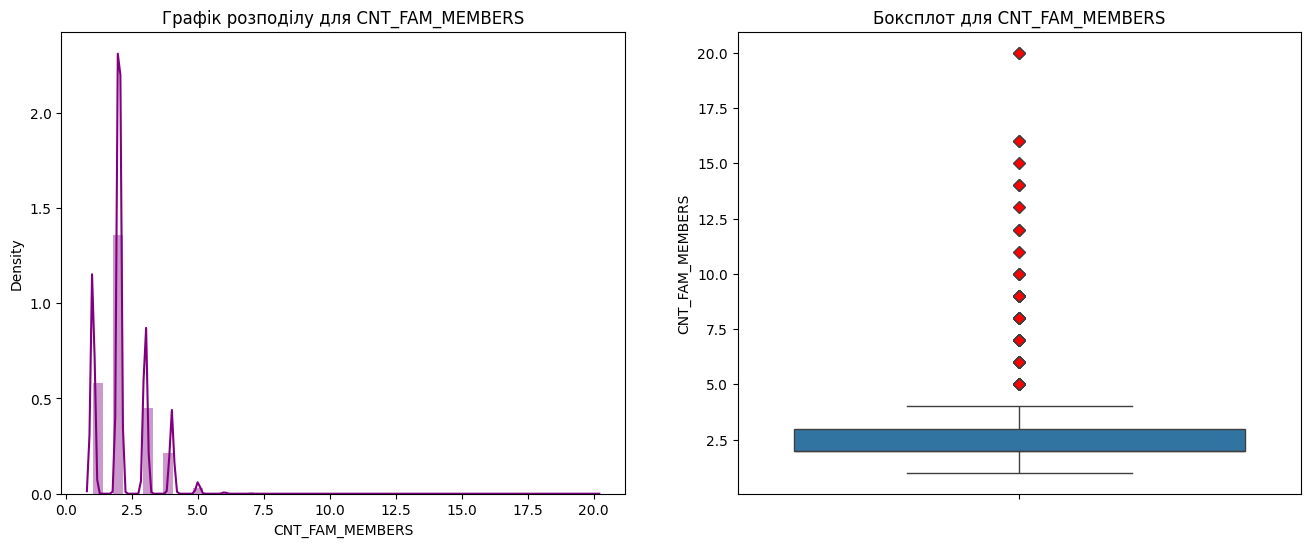

In [464]:
dist_box(df, 'CNT_FAM_MEMBERS')

In [465]:
Q1 = df['CNT_FAM_MEMBERS'].quantile(0.25)
Q3 = df['CNT_FAM_MEMBERS'].quantile(0.75)
IQR = Q3 - Q1
print(f"IQR rate: {IQR}")

print(f"Викиди по нижній межі: {Q1 - IQR}")
print(f"Викиди по верхній межі: {Q3 + IQR}")

IQR rate: 1.0
Викиди по нижній межі: 1.0
Викиди по верхній межі: 4.0


In [466]:
print(df[df['CNT_FAM_MEMBERS'] > 4].CNT_CHILDREN.value_counts().head(5), '\n')
print(df[df['CNT_FAM_MEMBERS'] > 4].NAME_FAMILY_STATUS.value_counts().head(5))

CNT_CHILDREN
3    3452
4     429
5      84
6      21
7       7
Name: count, dtype: int64 

NAME_FAMILY_STATUS
Married                 3665
Civil marriage           304
Separated                 16
Single / not married      13
Widow                      9
Name: count, dtype: int64


**Спостереження по колонці `CNT_FAM_MEMBERS`**:
- Відповідно до даних в колонкці, усі клієнти, в яких кількість членів родини строго менше 1, тобто вони відсутні, або строго більше 4 (від 5 людей) вважаються відхиленням від норми
- Присутні клієнти, в яких є 20 членів в родині, мінімальна кількість людей в сім'ї склададає 1 особа
- Обидві діаграми показують, що кількість членів родини більше 4 є викидами
- Клієнти з більше 4 членів родини в основному це сімейні пари з великою кількістю дітей. Додатково було б непогано переглянути мету видачі кредиту та проаналізувати в розрізі причини

**Висновок**

Заявники, в яких відсутні члени родини, або їхня кількість перевищує 4 є відхиленнями від норми. За необхідності сім'ї з великою кількістю осіб потребують додаткового аналізу

In [467]:
df['AMT_ANNUITY'].value_counts().head(10)

AMT_ANNUITY
9000.00     6385
13500.00    5514
6750.00     2279
10125.00    2035
37800.00    1602
11250.00    1459
26217.00    1453
20250.00    1345
12375.00    1339
31653.00    1269
Name: count, dtype: int64

In [468]:
df['AMT_ANNUITY'].value_counts(normalize=True).head(10)

AMT_ANNUITY
9000.00    0.02
13500.00   0.02
6750.00    0.01
10125.00   0.01
37800.00   0.01
11250.00   0.00
26217.00   0.00
20250.00   0.00
12375.00   0.00
31653.00   0.00
Name: proportion, dtype: float64

In [469]:
df['AMT_ANNUITY'].quantile(q=[0.25, 0.5, 0.75, 0.9, 0.99, 1])

0.25    16524.00
0.50    24903.00
0.75    34596.00
0.90    45954.00
0.99    70006.50
1.00   258025.50
Name: AMT_ANNUITY, dtype: float64

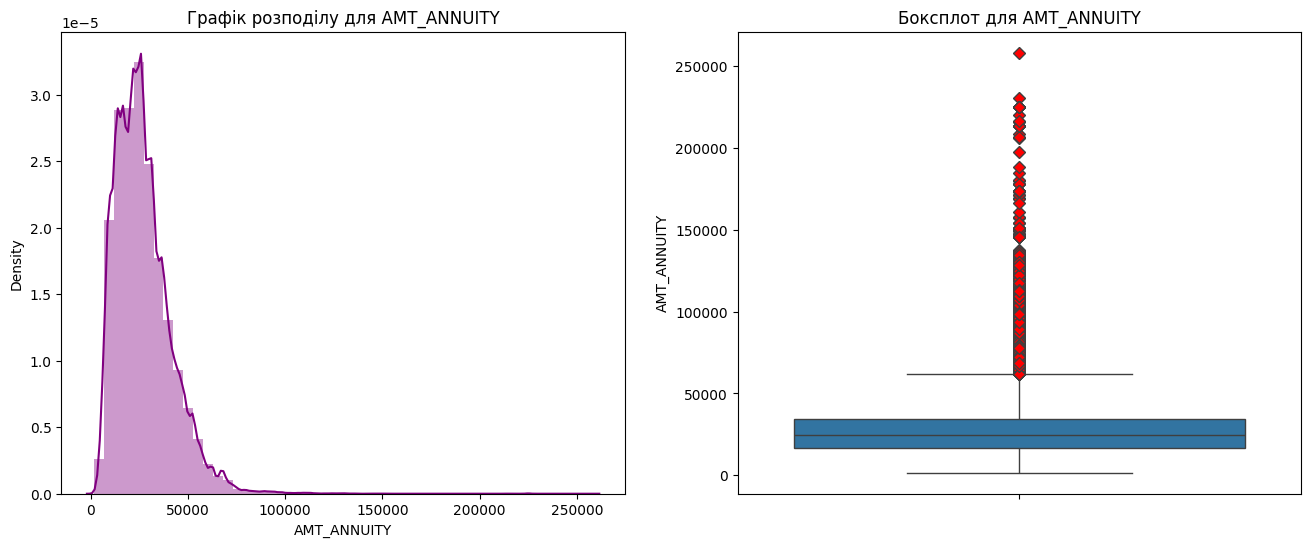

In [470]:
dist_box(df,'AMT_ANNUITY')

In [471]:
Q1 = df['AMT_ANNUITY'].quantile(0.25)
Q3 = df['AMT_ANNUITY'].quantile(0.75)
IQR = Q3 - Q1
print(f"IQR rate: {IQR}")

print(f"Викиди по нижній межі: {Q1 - IQR}")
print(f"Викиди по верхній межі: {Q3 + IQR}")

IQR rate: 18072.0
Викиди по нижній межі: -1548.0
Викиди по верхній межі: 52668.0


In [472]:
print(f"% даних, які вище верхньої межі IQR: {np.round(100 * df[df['AMT_ANNUITY'] > 52668.0].shape[0] / df.shape[0], 2)}%")

% даних, які вище верхньої межі IQR: 5.35%


Оскільки в аномалію потрапляє **5.35%** усіх даних, потрібно модифікувати спробувати взяти під корінь весь стовпчик з даними та спробувати переглянути розподіл. На мою думку, **5.35%** даних не виглядає як аномалія, тому спробуємо детальніше обробити дані.

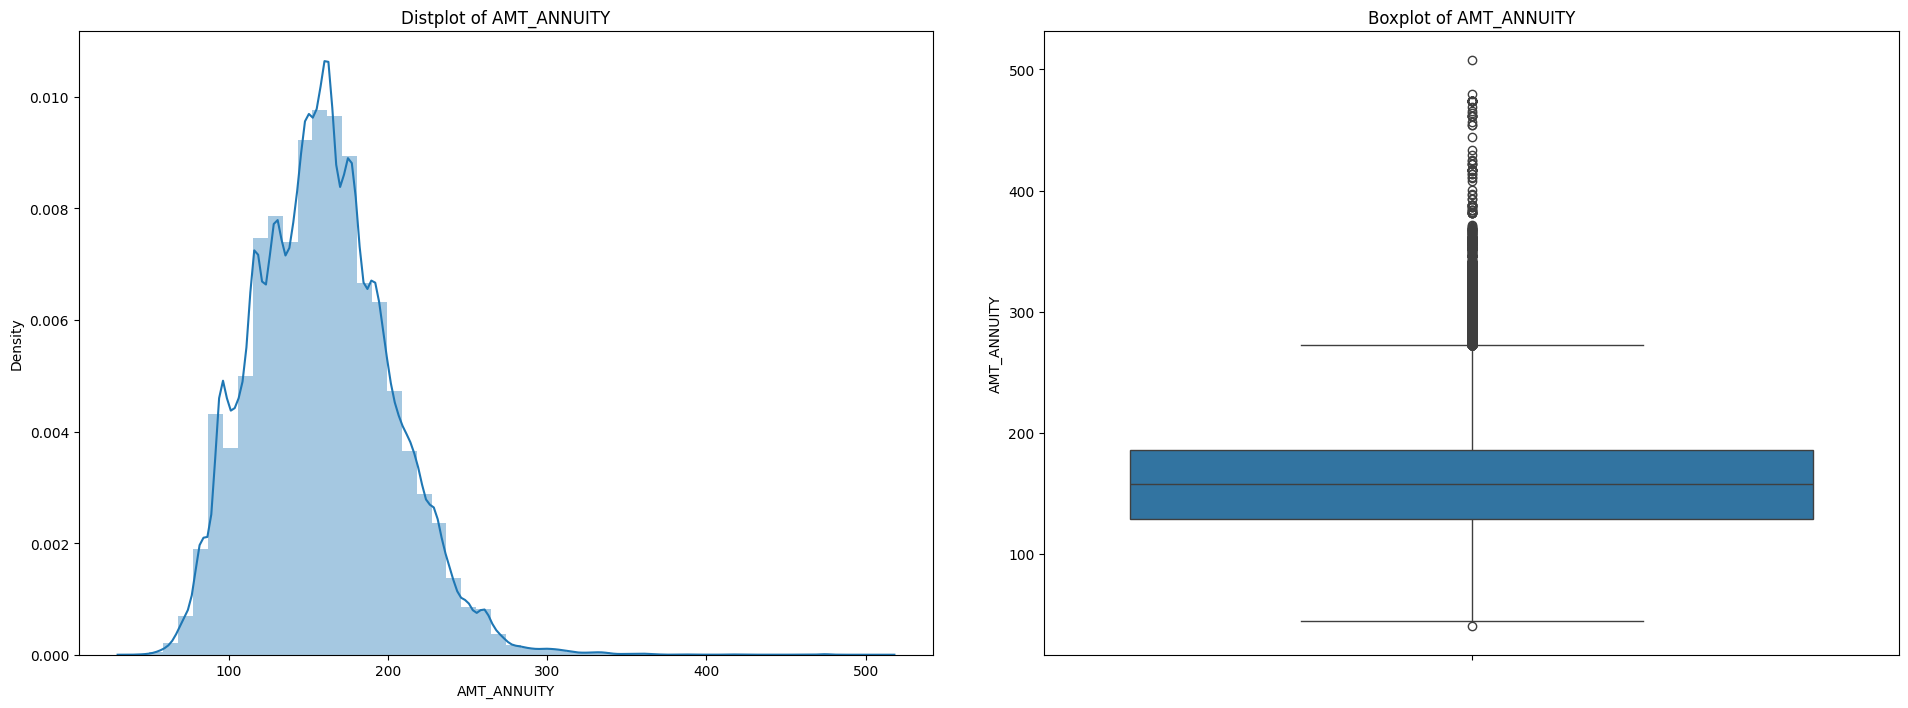

In [473]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.subplots(1,2 ,figsize = (20,8))

    plt.subplot(121)
    sns.distplot(np.sqrt(df.AMT_ANNUITY))
    pltname = 'Distplot of ' + 'AMT_ANNUITY'
    plt.title(pltname)

    plt.subplot(122)
    sns.boxplot(np.sqrt(df.AMT_ANNUITY))
    pltname = 'Boxplot of ' + 'AMT_ANNUITY'
    plt.title(pltname)

    plt.tight_layout(pad = 4)
    plt.show()

In [474]:
Q1 = np.sqrt(df['AMT_ANNUITY']).quantile(0.25)
Q3 = np.sqrt(df['AMT_ANNUITY']).quantile(0.75)
IQR = Q3 - Q1
print(f"IQR rate: {IQR}")

print(f"Викиди по нижній межі: {Q1 - IQR}")
print(f"Викиди по верхній межі: {Q3 + IQR}")

IQR rate: 57.45428828622869
Викиди по нижній межі: 71.09142342754262
Викиди по верхній межі: 243.4542882862287


Text(0.5, 1.0, 'Distplot of AMT_ANNUITY')

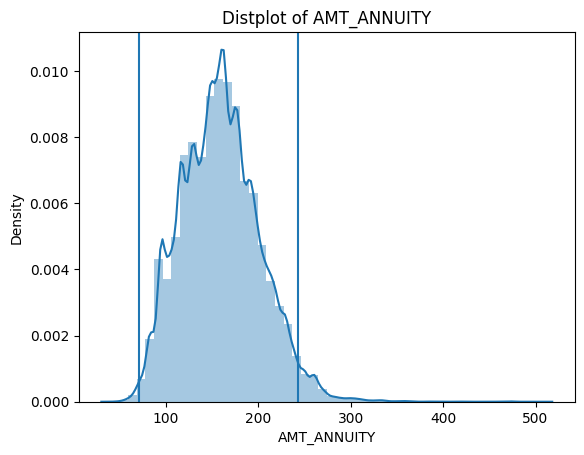

In [475]:
sns.distplot(np.sqrt(df.AMT_ANNUITY))
pltname = 'Distplot of ' + 'AMT_ANNUITY'
plt.axvline(Q3 + IQR)
plt.axvline(Q1 - IQR)
plt.title(pltname)

In [476]:
print(f"% змінених даних, які вище верхньої межі IQR: {np.round(100 * df[np.sqrt(df['AMT_ANNUITY']) > Q3 + IQR].shape[0] / df.shape[0], 2)}%")

% змінених даних, які вище верхньої межі IQR: 2.84%


Спостереження за колонкою `AMT_ANNUITY`:
- Розподіл сирих даних зміщений вправо. Аналіз показав, що викидами є клієнти з ануїтетом більше значення **52668**. Проте, проаналізувавши кількість записів більше **52668**, отримали **5.35%** записів які є викидами і припускаю що це досить значна кількість записів, відповідно не може бути викидом
- Внесення даних під корінь повернув більш симетричний розподіл і показав, що кієнти з ануїтетом **243.4542882862287**<sup>2</sup> є викидами. Видозмінених даних, більших за **243.4542882862287**<sup>2</sup> майже вдвічі менше ніж сирих даних

Можливі кроки:
- Крок 1: внести колонку `AMT_ANNUITY` під корінь та приймати гіпотезу про те, що викидами будуть усі значення <i>**243.4542882862287**<sup>2</sup> = **59269.9904849542**</i> більші за значення **59269.99**
- Крок 2: розбити колонку на 3 категорії, дані першої категорії які лежать в межах верхньої квартальної межі за сирими даними **52668.0**, друга категорія це викиди після верхньої межі за сирими даними, але нижчі верхньої межі оброблених даних, тобто від **52668.0** до **59269.99** та викиди, що знаходяться вище верхньої квартальної межі оброблених даних **59269.99**. <br>В результаті отримаємо 3 категорії `OUTLIER_TYPE_AMT_ANNUITY`: low (**0** - **52668.0**), medium (**52668.0** - **59269.99**), high (**59269.99** - ...)<br>
В такому випадку можемо більш детально аналізувати когорту клієнтів за різними типами викидів

**Висновок:**

Клієнти з ануїтетом більше **59269.99** є явним відхиленням від норми. Для якіснішого аналізу, доцільно розділити групу користувачів з більшими сумами ануїтету. Якщо задача не передбачає покриття таких групи осіб - можемо врахувати що сума ануїтету **52668.0** буде аномалією

# Розбиття на біни безперервних колонок для аналізу

### Категоризація стовпця `AMT_GOODS_PRICE

In [477]:
df['AMT_GOODS_PRICE'].value_counts().sort_values(ascending = False).head()

AMT_GOODS_PRICE
450000.00    26300
225000.00    25282
675000.00    24962
900000.00    15416
270000.00    11428
Name: count, dtype: int64

In [553]:
(df['AMT_GOODS_PRICE'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

AMT_GOODS_PRICE
450000.00   8.55
225000.00   8.22
675000.00   8.12
900000.00   5.01
270000.00   3.72
Name: proportion, dtype: float64

Подивимось статистичний звіт для `AMT_GOODS_PRICE

In [479]:
df['AMT_GOODS_PRICE'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count     307511.00
mean      538316.29
std       369288.98
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
99%      1800000.00
99.99%   2933964.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

Розподілимо значення в `AMT_GOODS_PRICE` на 5 бінів і створимо новий стовпець `AMT_GOODS_PRICE_CATEGORY`.

In [480]:
df['AMT_GOODS_PRICE_CATEGORY'] = pd.cut(df['AMT_GOODS_PRICE'],
                                        bins = 5, labels = ['very low', 'low', 'medium', 'high', 'very high'])

Перевірка заповнення значень згідно з очікуванням

In [481]:
df['AMT_GOODS_PRICE_CATEGORY'].value_counts()

AMT_GOODS_PRICE_CATEGORY
very low     247251
low           56087
medium         4108
high             47
very high        18
Name: count, dtype: int64

### Категоризація стовпця `YEARS_BIRTH`

Ми будемо класифікувати `YEARS_BIRTH` замість `DAYS_BIRTH`, оскільки роки легше інтерпретувати, ніж дні

In [482]:
df['YEARS_BIRTH'].value_counts().sort_values(ascending = False).head()

YEARS_BIRTH
39    9023
38    8793
37    8727
40    8602
41    8495
Name: count, dtype: int64

In [483]:
(df['YEARS_BIRTH'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

YEARS_BIRTH
39   2.93
38   2.86
37   2.84
40   2.80
41   2.76
Name: proportion, dtype: float64

Подивимось статистичний звіт для  `YEARS_BIRTH`

In [484]:
df['YEARS_BIRTH'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count    307511.00
mean         43.94
std          11.96
min          21.00
25%          34.00
50%          43.00
75%          54.00
99%          67.00
99.99%       69.00
max          69.00
Name: YEARS_BIRTH, dtype: float64

Категоризуймо значення з `YEARS_BIRTH` у новий стовпець `YEARS_BIRTH_CATEGORY`.

In [485]:
df['YEARS_BIRTH_CATEGORY'] = df['YEARS_BIRTH'].apply(age_cat)

Перевірка заповнення значень згідно з очікуванням

In [486]:
df['YEARS_BIRTH_CATEGORY'].value_counts().sort_values(ascending = False)

YEARS_BIRTH_CATEGORY
30-40    82770
40-50    75509
50-60    67955
20-30    48869
60-70    32408
Name: count, dtype: int64

### Категоризація стовпця `YEARS_REGISTRATION`

Ми будемо класифікувати `YEARS_REGISTRATION` замість `DAYS_REGISTRATION`, оскільки роки легше інтерпретувати, ніж дні

In [487]:
df['YEARS_REGISTRATION'].value_counts().sort_values(ascending = False).head()

YEARS_REGISTRATION
1     15661
2     15564
3     13894
13    12866
12    12697
Name: count, dtype: int64

In [488]:
(df['YEARS_REGISTRATION'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

YEARS_REGISTRATION
1    5.09
2    5.06
3    4.52
13   4.18
12   4.13
Name: proportion, dtype: float64

Подивимось статистичний звіт для `YEARS_REGISTRATION`

In [489]:
df['YEARS_REGISTRATION'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count    307511.00
mean         13.66
std           9.66
min           0.00
25%           6.00
50%          12.00
75%          20.00
99%          38.00
99.99%       54.25
max          68.00
Name: YEARS_REGISTRATION, dtype: float64

Категоризуймо значення з `YEARS_REGISTRATION` в новий стовпець `YEARS_REGISTRATION_CATEGORY`.

In [490]:
df['YEARS_REGISTRATION_CATEGORY'] = df['YEARS_REGISTRATION'].apply(age_cat)

Перевірка заповнення значень згідно з очікуванням

In [491]:
df['YEARS_REGISTRATION_CATEGORY'].value_counts().sort_values(ascending = False)

YEARS_REGISTRATION_CATEGORY
0-20     230697
20-30     59288
30-40     16051
40-50      1406
50-60        60
60-70         9
Name: count, dtype: int64

# Зберігання оновлених даних зі стисненням

In [492]:
filename = "/Users/bilukhan/ML course/application_data_processed"
compression_options = dict(method='zip', archive_name=f'{filename}.csv')
df.to_csv(f'{filename}.zip', compression=compression_options, index=False)

# Перевірка дисбалансу для цільового стовпця `TARGET`

### Аналіз стовпця `TARGET`

In [493]:
df['TARGET'].value_counts().sort_values(ascending = False)

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [494]:
df['TARGET'].value_counts(normalize = True).sort_values(ascending = False) * 100

TARGET
0   91.93
1    8.07
Name: proportion, dtype: float64

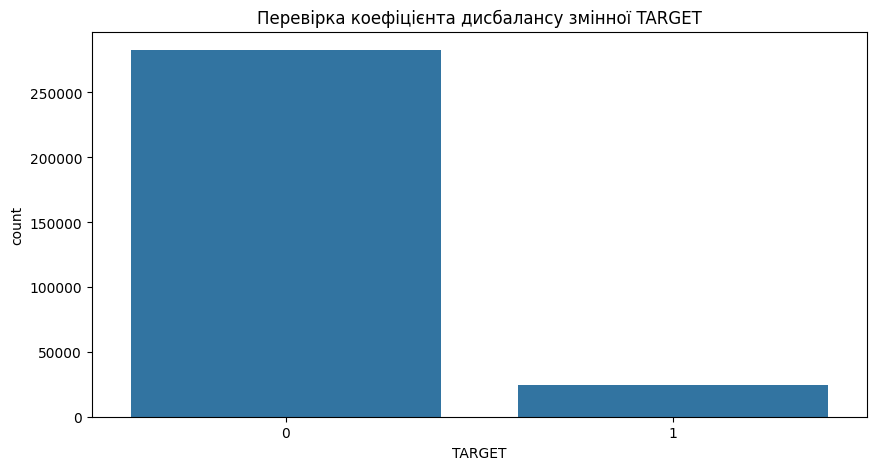

In [495]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['TARGET'], data = df)
plt.title('Перевірка коефіцієнта дисбалансу змінної TARGET')
plt.show()

**Спостереження**

- Ми маємо дисбаланс у змінній `TARGET` на основі % спостережень
 - Значення `TARGET` 1 - це клієнт, який має труднощі з оплатою (прострочення платежу більше ніж на X днів принаймні за одним з перших Y платежів за кредитом). Це лише 8,07% даних
 - Значення `TARGET` 0 - всі інші випадки, окрім 1. Це 91,93% даних

# Розподіл даних на основі `TARGET`

### Створіть новий фрейм даних зі значенням `TARGET` 1
- Значення `TARGET` 1 представляє клієнта з платіжними труднощами (він/вона прострочив платіж більш ніж на X днів принаймні по одному з перших Y платежів за кредитом). Це лише 8,07% даних

In [496]:
df1 = df[df['TARGET'] == 1]

In [497]:
df1.TARGET.value_counts()

TARGET
1    24825
Name: count, dtype: int64

### Створити новий фрейм даних зі значенням `TARGET` 0
- Значення `TARGET` 0 представляє всі інші випадки, крім 1. Це 91.93% даних

In [498]:
df0 = df[df['TARGET'] == 0]

In [499]:
df0.TARGET.value_counts()

TARGET
0    282686
Name: count, dtype: int64

# Одномірний аналіз категоріальних змінних

### Аналіз стовпця `NAME_CONTRACT_TYPE`

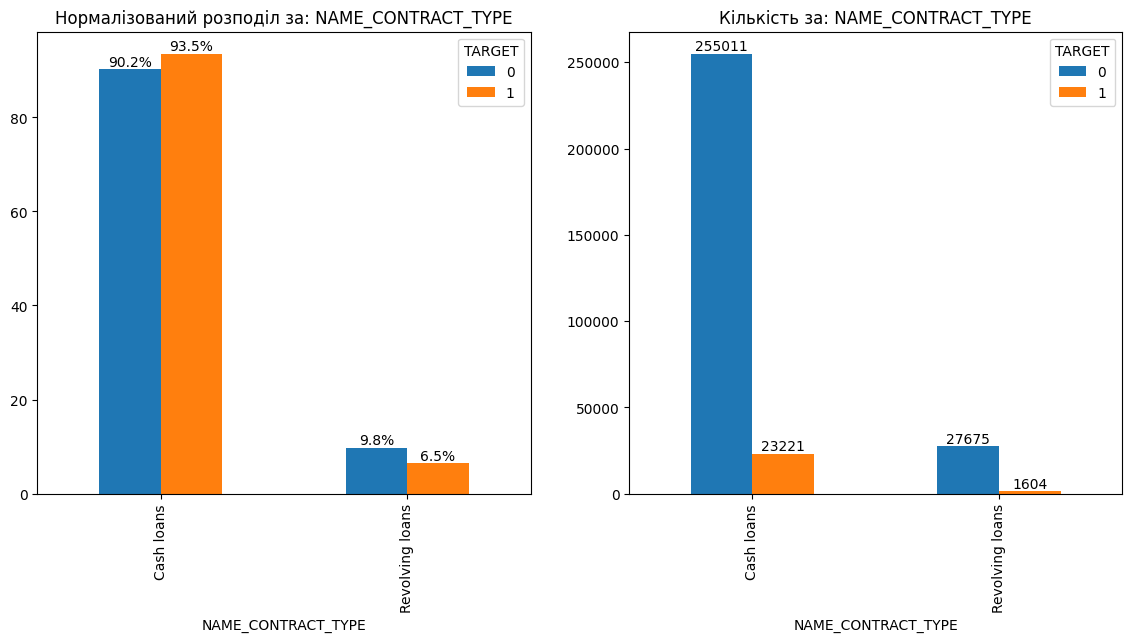

In [500]:
uni_cat_target_compare(df, 'NAME_CONTRACT_TYPE')

**Спостереження**

- Дивлячись на гістограми, ми не бачимо суттєвих відмінностей у `NAME_CONTRACT_TYPE` між клієнтами, які мають труднощі з оплатою, та клієнтами, які платять вчасно

**Висновок**
- Колонка `NAME_CONTRACT_TYPE` не надає жодних переконливих доказів на користь клієнтів, які мають труднощі з оплатою АБО вчасно сплачують

# ДЗ 4. Одновимірний аналіз категоріальної колонки

За наведеним прикладом вище, проведіть аналіз залежності між категоріальною колонкою і цільовою для колонок
- CODE_GENDER
- FLAG_OWN_CAR

Опціонально (для тих, кому цікаво дослідити більше даних)
- NAME_INCOME_TYPE
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS


Чи є вплив цих змінних на цільову та який саме?

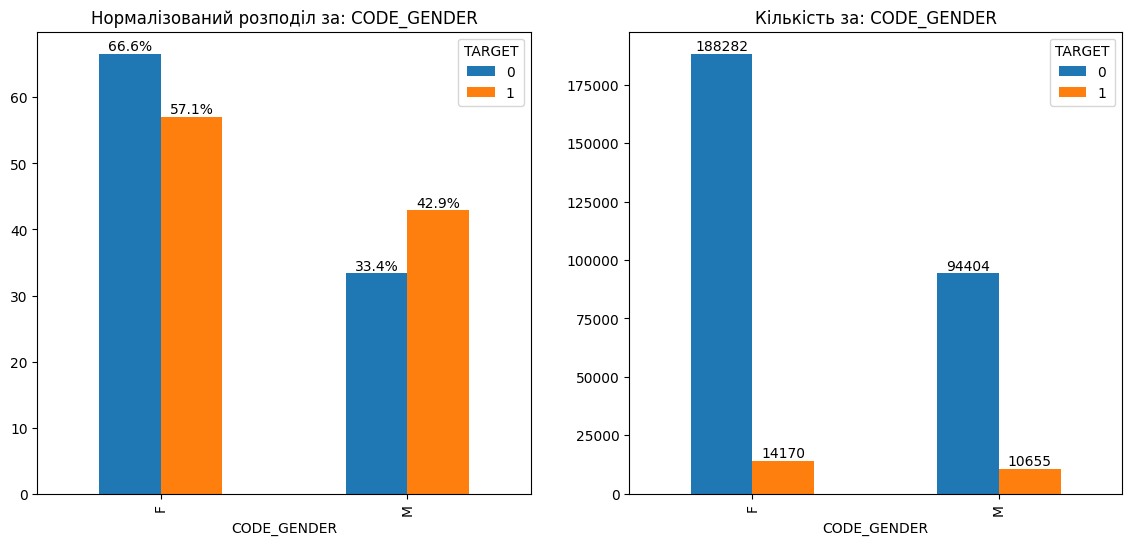

In [501]:
uni_cat_target_compare(df, 'CODE_GENDER')

**Спостереження по колонці `CODE_GENDER`**

- Гістограма показує, що чоловіки більш схильні мати труднощі з оплатою приблизно на **10%** більше ніж жінки.
- Проте кількість чоловіків є вдвічі меншою за кількість жінок.

**Висновок**
- На колонці `CODE_GENDER` видно, що чоловіки мають більше труднощів з оплатою на **10%**.

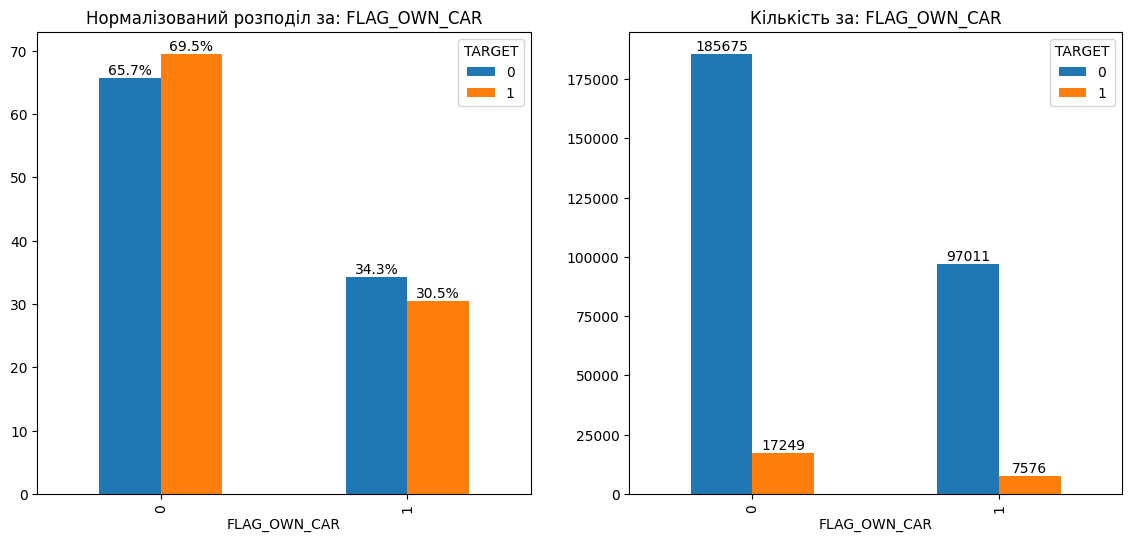

In [502]:
uni_cat_target_compare(df, 'FLAG_OWN_CAR')

Бачимо, що клієнти, які не мають власного авто мають труднощі з оплатою на **4%**. Цікаво переглянути статистику в розрізі `CODE_GENDER` додатково

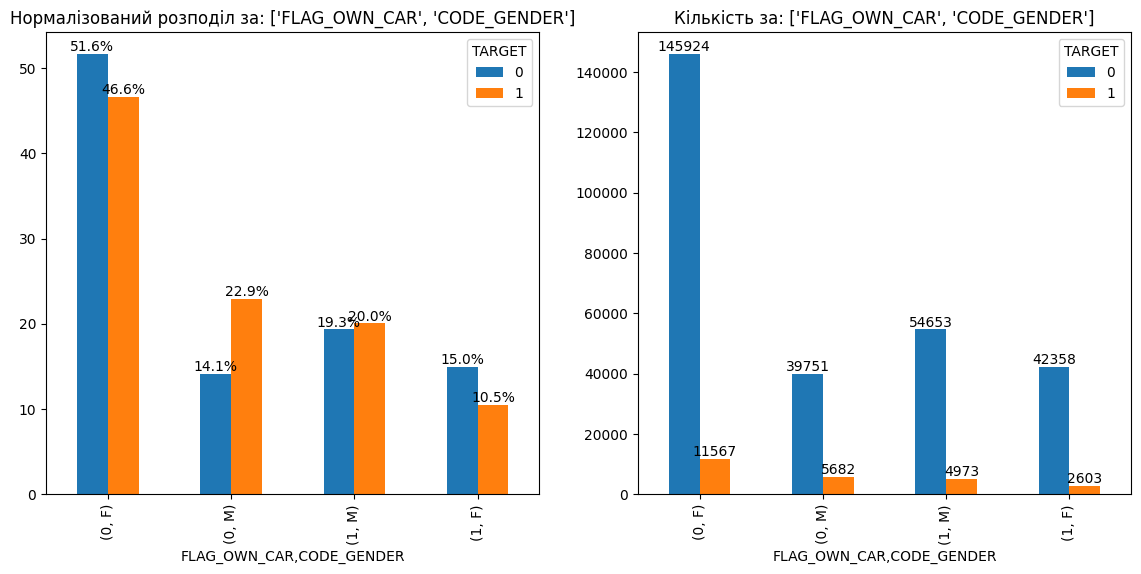

In [503]:
uni_cat_target_compare(df, ['FLAG_OWN_CAR', 'CODE_GENDER'])

**Спостереження за `FLAG_OWN_CAR`:**
- Клієнти, які не мають власного авто в загальному мають труднощі з оплатою на **4%** більше ніж ті, що мають
- Діаграма розподілу за 2 змінними `FLAG_OWN_CAR` та `CODE_GENDER` показує детальніше, що саме чоловіки більш схильні мати труднощі з оплатою, при чому чоловіки без автомобіля мають труднощі на **8%** більше
- Жінки схильні не мати труднощів з оплатою не зважаючи на наявність автомобіля. При чому жінки беруть вдвічі більше кредитів за чоловіків

**Висновок:**<br>
Чоловіки більш схильні мати труднощі з оплатою, при чому, чоловікам без автомобіля значно важче виплатити кредит. Жінки мають менше труднощів з оплатою, не звачаючи на наявність автомобіля

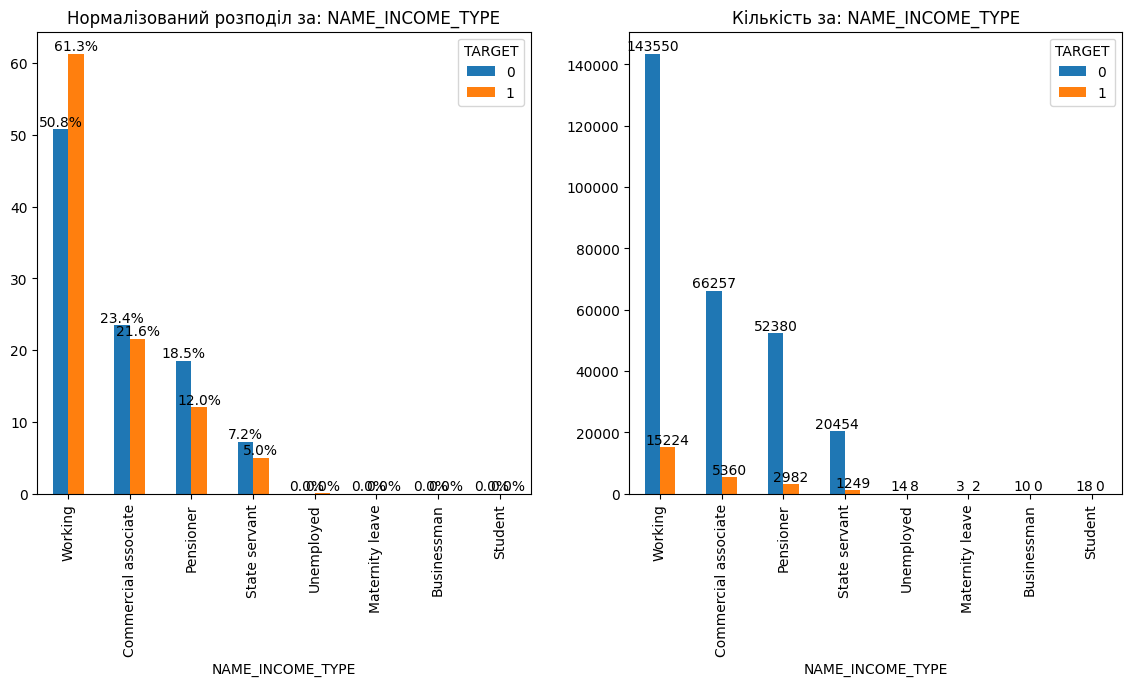

In [504]:
uni_cat_target_compare(df, 'NAME_INCOME_TYPE')

**Спостереження по `NAME_INCOME_TYPE`:**<br>
Відповідно до діаграми розподілу, цікаво, що працюючим клієнтам важче виплатити кредит

**Висновок:**<br>
Клієнтам, що працюють `Working` важче погасити кредит

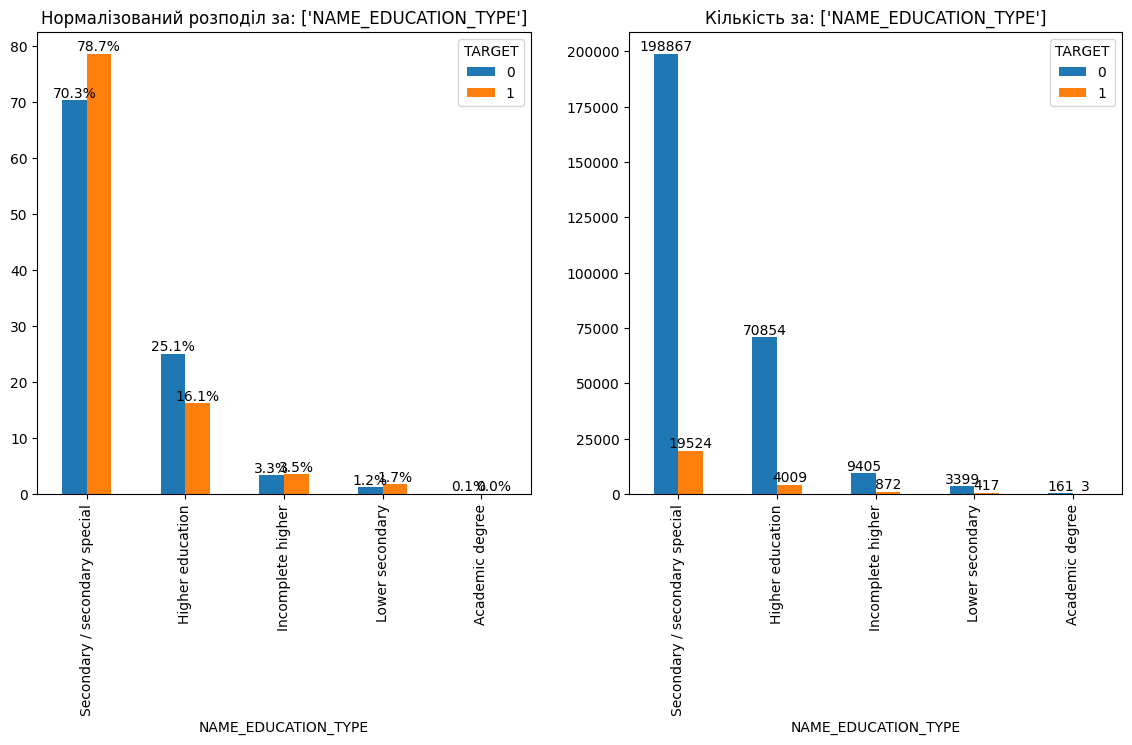

In [505]:
uni_cat_target_compare(df, ['NAME_EDUCATION_TYPE'])

**Спостереження по `NAME_EDUCATION_TYPE`:**<br>
Згідно діаграмі, клієнти, які лише закінчили школу мають більше труднощів з оплатою, натомість люди з вищою освітою мають менше труднощів

**Висновок:**<br>
Клієнти, які мають закінчену базову середню освіту `Secondary / second special` частіше стикаються з труднощами при оплаті

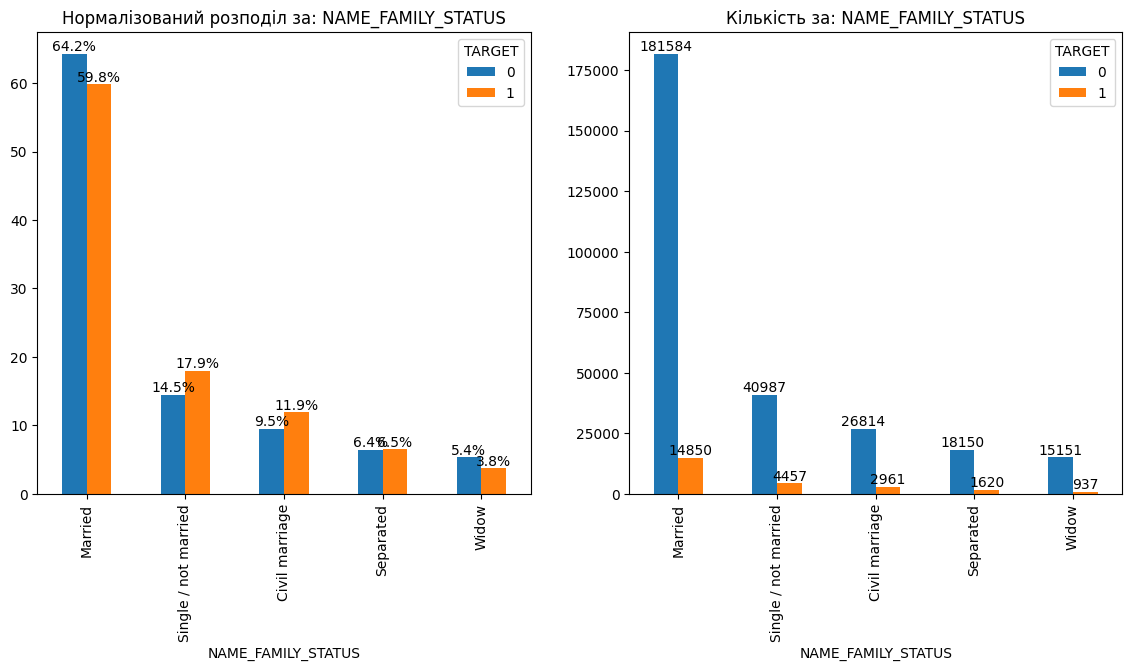

In [506]:
uni_cat_target_compare(df, 'NAME_FAMILY_STATUS')

**Спостереження по `NAME_FAMILY_STATUS`:**<br>
Згідно діаграмі, самотні клієнти, або ж сім'ї в цивільному шлюбі мають труднощі з оплатою кредиту на 3% та 2% відповідно
Додатково переглянемо більш деталізовані діаграми

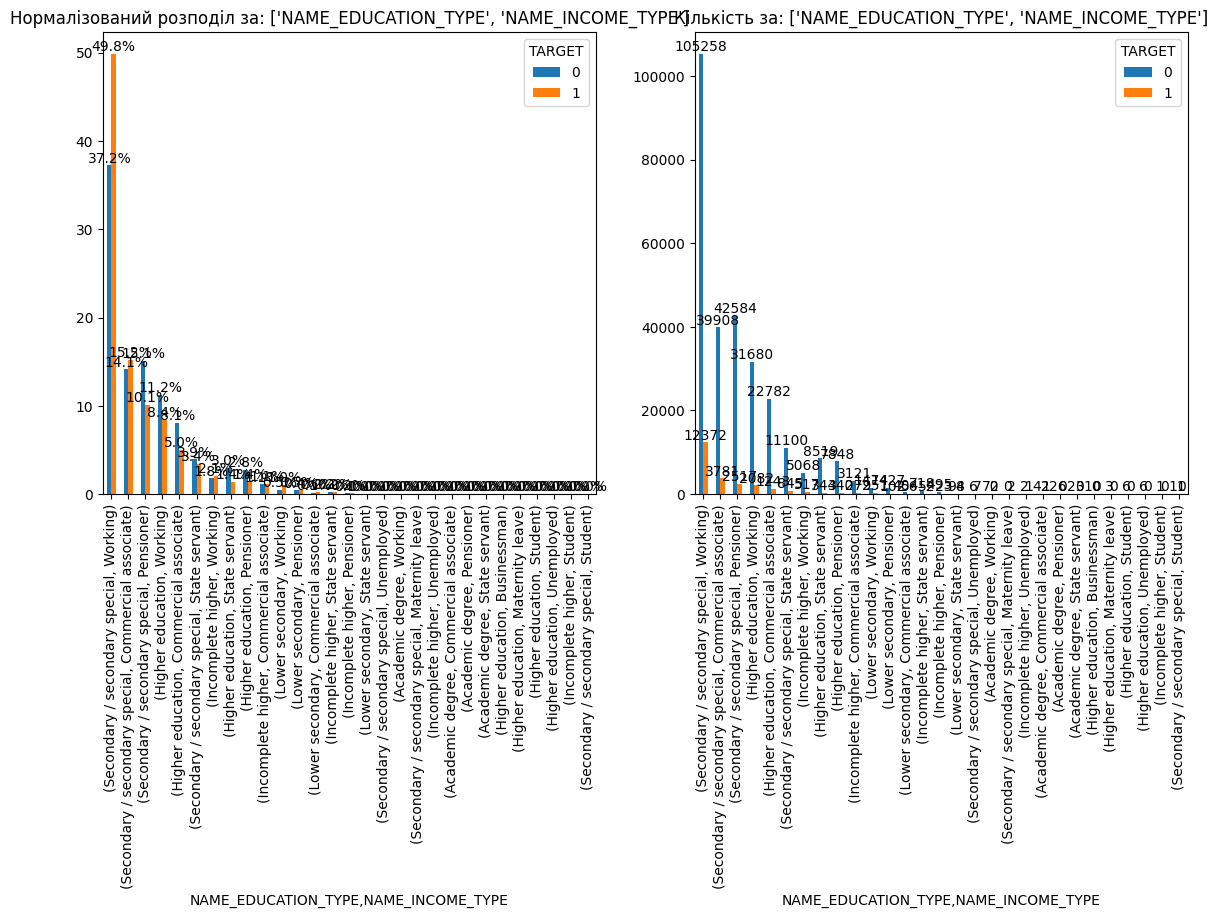

In [507]:
uni_cat_target_compare(df, ['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE'])

**Висновок:**<br>
Клієнти, що мають повну базову середню освіту, що працюють та є неодруженими, або знаходяться в цивільному шлюбі мають труднощі з оплатою кредиту. Когорта, що найбільш виділяється - `Working` особи з `Secondary / secondary special` освітою

# Кореляційний аналіз числових змінних

### Побудова кореляційної матриці для випадків із платіжними труднощами

In [508]:
df1.select_dtypes(include=["int64","float64"]).shape

(24825, 39)

Є 66 числових стовпчиків. Створимо кореляційну матрицб `corr` для кращого перегляду результатів

In [509]:
corr_df1 = df1.select_dtypes(include=["int64","float64"]).corr()

In [510]:
corr_df1.head()

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
TARGET               NaN           NaN               NaN         NaN   
CNT_CHILDREN         NaN          1.00              0.00       -0.00   
AMT_INCOME_TOTAL     NaN          0.00              1.00        0.04   
AMT_CREDIT           NaN         -0.00              0.04        1.00   
AMT_ANNUITY          NaN          0.03              0.05        0.75   

                  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
TARGET                    NaN              NaN                         NaN   
CNT_CHILDREN             0.03            -0.01                       -0.03   
AMT_INCOME_TOTAL         0.05             0.04                        0.01   
AMT_CREDIT               0.75             0.98                        0.07   
AMT_ANNUITY              1.00             0.75                        0.07   

                  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
TARGET                   NaN            NaN                NaN   
CNT_CHILDREN           -0.26          -0.19              -0.15   
AMT_INCOME_TOTAL       -0.00          -0.01              -0.00   
AMT_CREDIT              0.14           0.00               0.03   
AMT_ANNUITY             0.01          -0.08              -0.03   

                  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
TARGET                        NaN              NaN                   NaN   
CNT_CHILDREN                 0.03             0.89                  0.04   
AMT_INCOME_TOTAL             0.00             0.01                 -0.02   
AMT_CREDIT                   0.05             0.05                 -0.06   
AMT_ANNUITY                  0.02             0.08                 -0.07   

                  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
TARGET                                    NaN                      NaN   
CNT_CHILDREN                             0.04                    -0.02   
AMT_INCOME_TOTAL                        -0.02                     0.01   
AMT_CREDIT                              -0.07                     0.03   
AMT_ANNUITY                             -0.09                     0.03   

                  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
TARGET                                   NaN                         NaN   
CNT_CHILDREN                           -0.02                       -0.02   
AMT_INCOME_TOTAL                        0.01                        0.01   
AMT_CREDIT                              0.02                        0.03   
AMT_ANNUITY                             0.03                        0.07   

                  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
TARGET                                    NaN                     NaN   
CNT_CHILDREN                            -0.01                   -0.00   
AMT_INCOME_TOTAL                         0.01                   -0.00   
AMT_CREDIT                               0.03                   -0.03   
AMT_ANNUITY                              0.06                   -0.01   

                  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
TARGET                               NaN                      NaN   
CNT_CHILDREN                        0.05                     0.05   
AMT_INCOME_TOTAL                   -0.00                    -0.00   
AMT_CREDIT                         -0.04                    -0.02   
AMT_ANNUITY                         0.00                     0.01   

                  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
TARGET                     NaN           NaN                       NaN   
CNT_CHILDREN             -0.01         -0.02                      0.03   
AMT_INCOME_TOTAL          0.01         -0.02                     -0.00   
AMT_CREDIT                0.12          0.08                      0.02   
AMT_ANNUITY               0.12          0.04                      0.01   

                  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL

Створимо теплову карту для перегляду кореляцій вище 80% і 99,99%

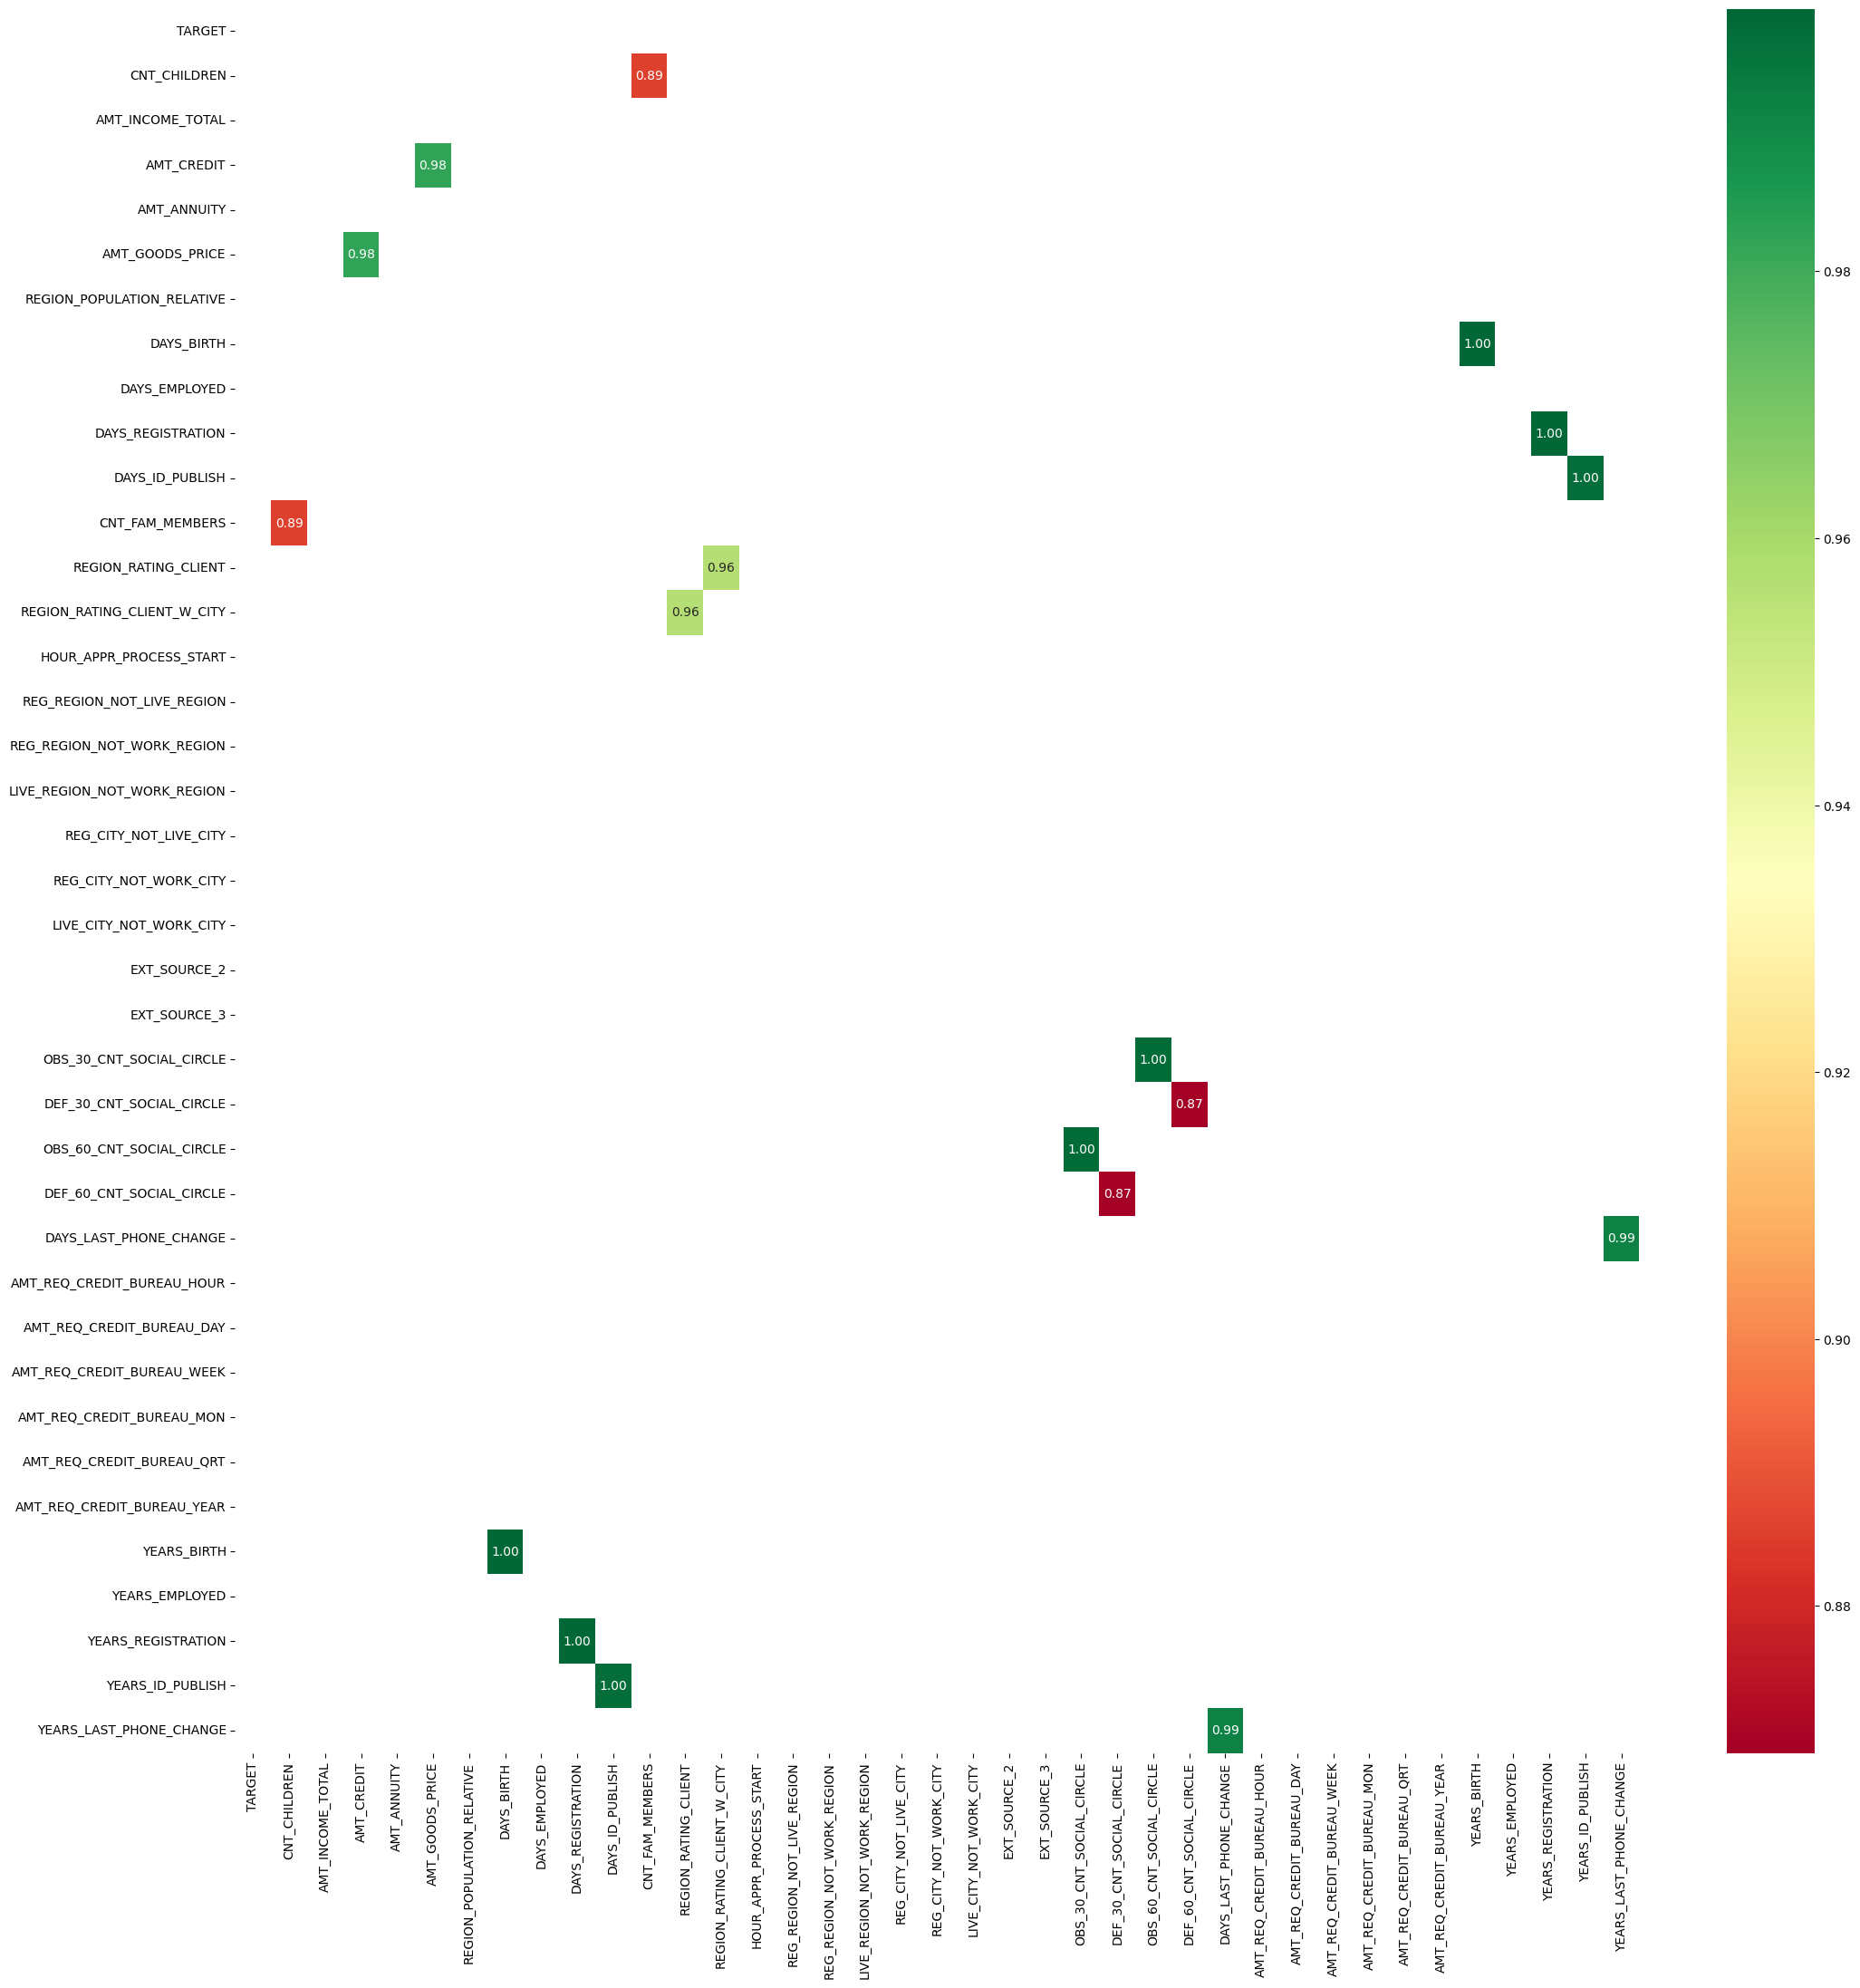

In [511]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df1[(corr_df1 >= 0.85) & (corr_df1 < 0.9999)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

### Подивимось на 10 найкращих кореляцій для випадків із платіжними труднощами

In [512]:
corr_df1[corr_df1 <= 0.99].unstack().sort_values(ascending = False).head(22)

AMT_CREDIT                   AMT_GOODS_PRICE               0.98
AMT_GOODS_PRICE              AMT_CREDIT                    0.98
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.96
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.96
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.89
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.89
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.87
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.87
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.85
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.85
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.78
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.78
AMT_ANNUITY                  AMT_GOODS_PRICE               0.75
AMT_GOODS_PRICE              AMT_ANNUITY                   0.75
AMT_CREDIT                   AMT_ANNUITY                   0.75
AMT_ANNUITY                  AMT_CREDIT 

Оскільки у нас є комбінації, що повторюються, дивлячись на наведену вище таблицю і видаляючи дублі, ми отримуємо топ-10 кореляцій, як показано нижче:

- AMT_GOODS_PRICE -              AMT_CREDIT                    0.98
- REGION_RATING_CLIENT -         REGION_RATING_CLIENT_W_CITY   0.96
- CNT_FAM_MEMBERS -              CNT_CHILDREN                  0.89
- DEF_60_CNT_SOCIAL_CIRCLE -     DEF_30_CNT_SOCIAL_CIRCLE      0.87
- REG_REGION_NOT_WORK_REGION -   LIVE_REGION_NOT_WORK_REGION   0.85
- LIVE_CITY_NOT_WORK_CITY -      REG_CITY_NOT_WORK_CITY        0.78
- AMT_ANNUITY -                  AMT_GOODS_PRICE               0.75
- AMT_ANNUITY -                  AMT_CREDIT                    0.75
- DAYS_EMPLOYED -                FLAG_DOCUMENT_6               0.62
- DAYS_BIRTH -                   DAYS_EMPLOYED                 0.58

### Побудова кореляційної матриці для випадків із вчасними платежеми

In [513]:
df0.select_dtypes(include=["int64","float64"]).shape

(282686, 39)

Є 66 числових стовпчиків. Створимо кореляційну матрицю `corr` для кращого перегляду результатів

In [514]:
corr_df0 = df0.select_dtypes(include=["int64","float64"]).corr()

In [515]:
corr_df0.head()

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
TARGET               NaN           NaN               NaN         NaN   
CNT_CHILDREN         NaN          1.00              0.03        0.00   
AMT_INCOME_TOTAL     NaN          0.03              1.00        0.34   
AMT_CREDIT           NaN          0.00              0.34        1.00   
AMT_ANNUITY          NaN          0.02              0.42        0.77   

                  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
TARGET                    NaN              NaN                         NaN   
CNT_CHILDREN             0.02            -0.00                       -0.02   
AMT_INCOME_TOTAL         0.42             0.35                        0.17   
AMT_CREDIT               0.77             0.99                        0.10   
AMT_ANNUITY              1.00             0.78                        0.12   

                  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
TARGET                   NaN            NaN                NaN   
CNT_CHILDREN           -0.34          -0.25              -0.19   
AMT_INCOME_TOTAL       -0.06          -0.14              -0.06   
AMT_CREDIT              0.05          -0.07              -0.01   
AMT_ANNUITY            -0.01          -0.10              -0.04   

                  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
TARGET                        NaN              NaN                   NaN   
CNT_CHILDREN                 0.03             0.88                  0.02   
AMT_INCOME_TOTAL            -0.02             0.03                 -0.19   
AMT_CREDIT                   0.00             0.06                 -0.10   
AMT_ANNUITY                 -0.01             0.08                 -0.13   

                  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
TARGET                                    NaN                      NaN   
CNT_CHILDREN                             0.02                    -0.01   
AMT_INCOME_TOTAL                        -0.20                     0.08   
AMT_CREDIT                              -0.11                     0.05   
AMT_ANNUITY                             -0.15                     0.05   

                  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
TARGET                                   NaN                         NaN   
CNT_CHILDREN                           -0.01                        0.01   
AMT_INCOME_TOTAL                        0.07                        0.14   
AMT_CREDIT                              0.02                        0.05   
AMT_ANNUITY                             0.04                        0.08   

                  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
TARGET                                    NaN                     NaN   
CNT_CHILDREN                             0.02                    0.02   
AMT_INCOME_TOTAL                         0.13                    0.01   
AMT_CREDIT                               0.05                   -0.03   
AMT_ANNUITY                              0.08                   -0.01   

                  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
TARGET                               NaN                      NaN   
CNT_CHILDREN                        0.07                     0.07   
AMT_INCOME_TOTAL                    0.02                     0.02   
AMT_CREDIT                         -0.02                     0.00   
AMT_ANNUITY                         0.00                     0.01   

                  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
TARGET                     NaN           NaN                       NaN   
CNT_CHILDREN             -0.02         -0.04                      0.01   
AMT_INCOME_TOTAL          0.14         -0.07                     -0.03   
AMT_CREDIT                0.13          0.04                     -0.00   
AMT_ANNUITY               0.13          0.03                     -0.01   

                  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL

Створимо теплову карту для перегляду кореляцій вище 80% і 99,99%

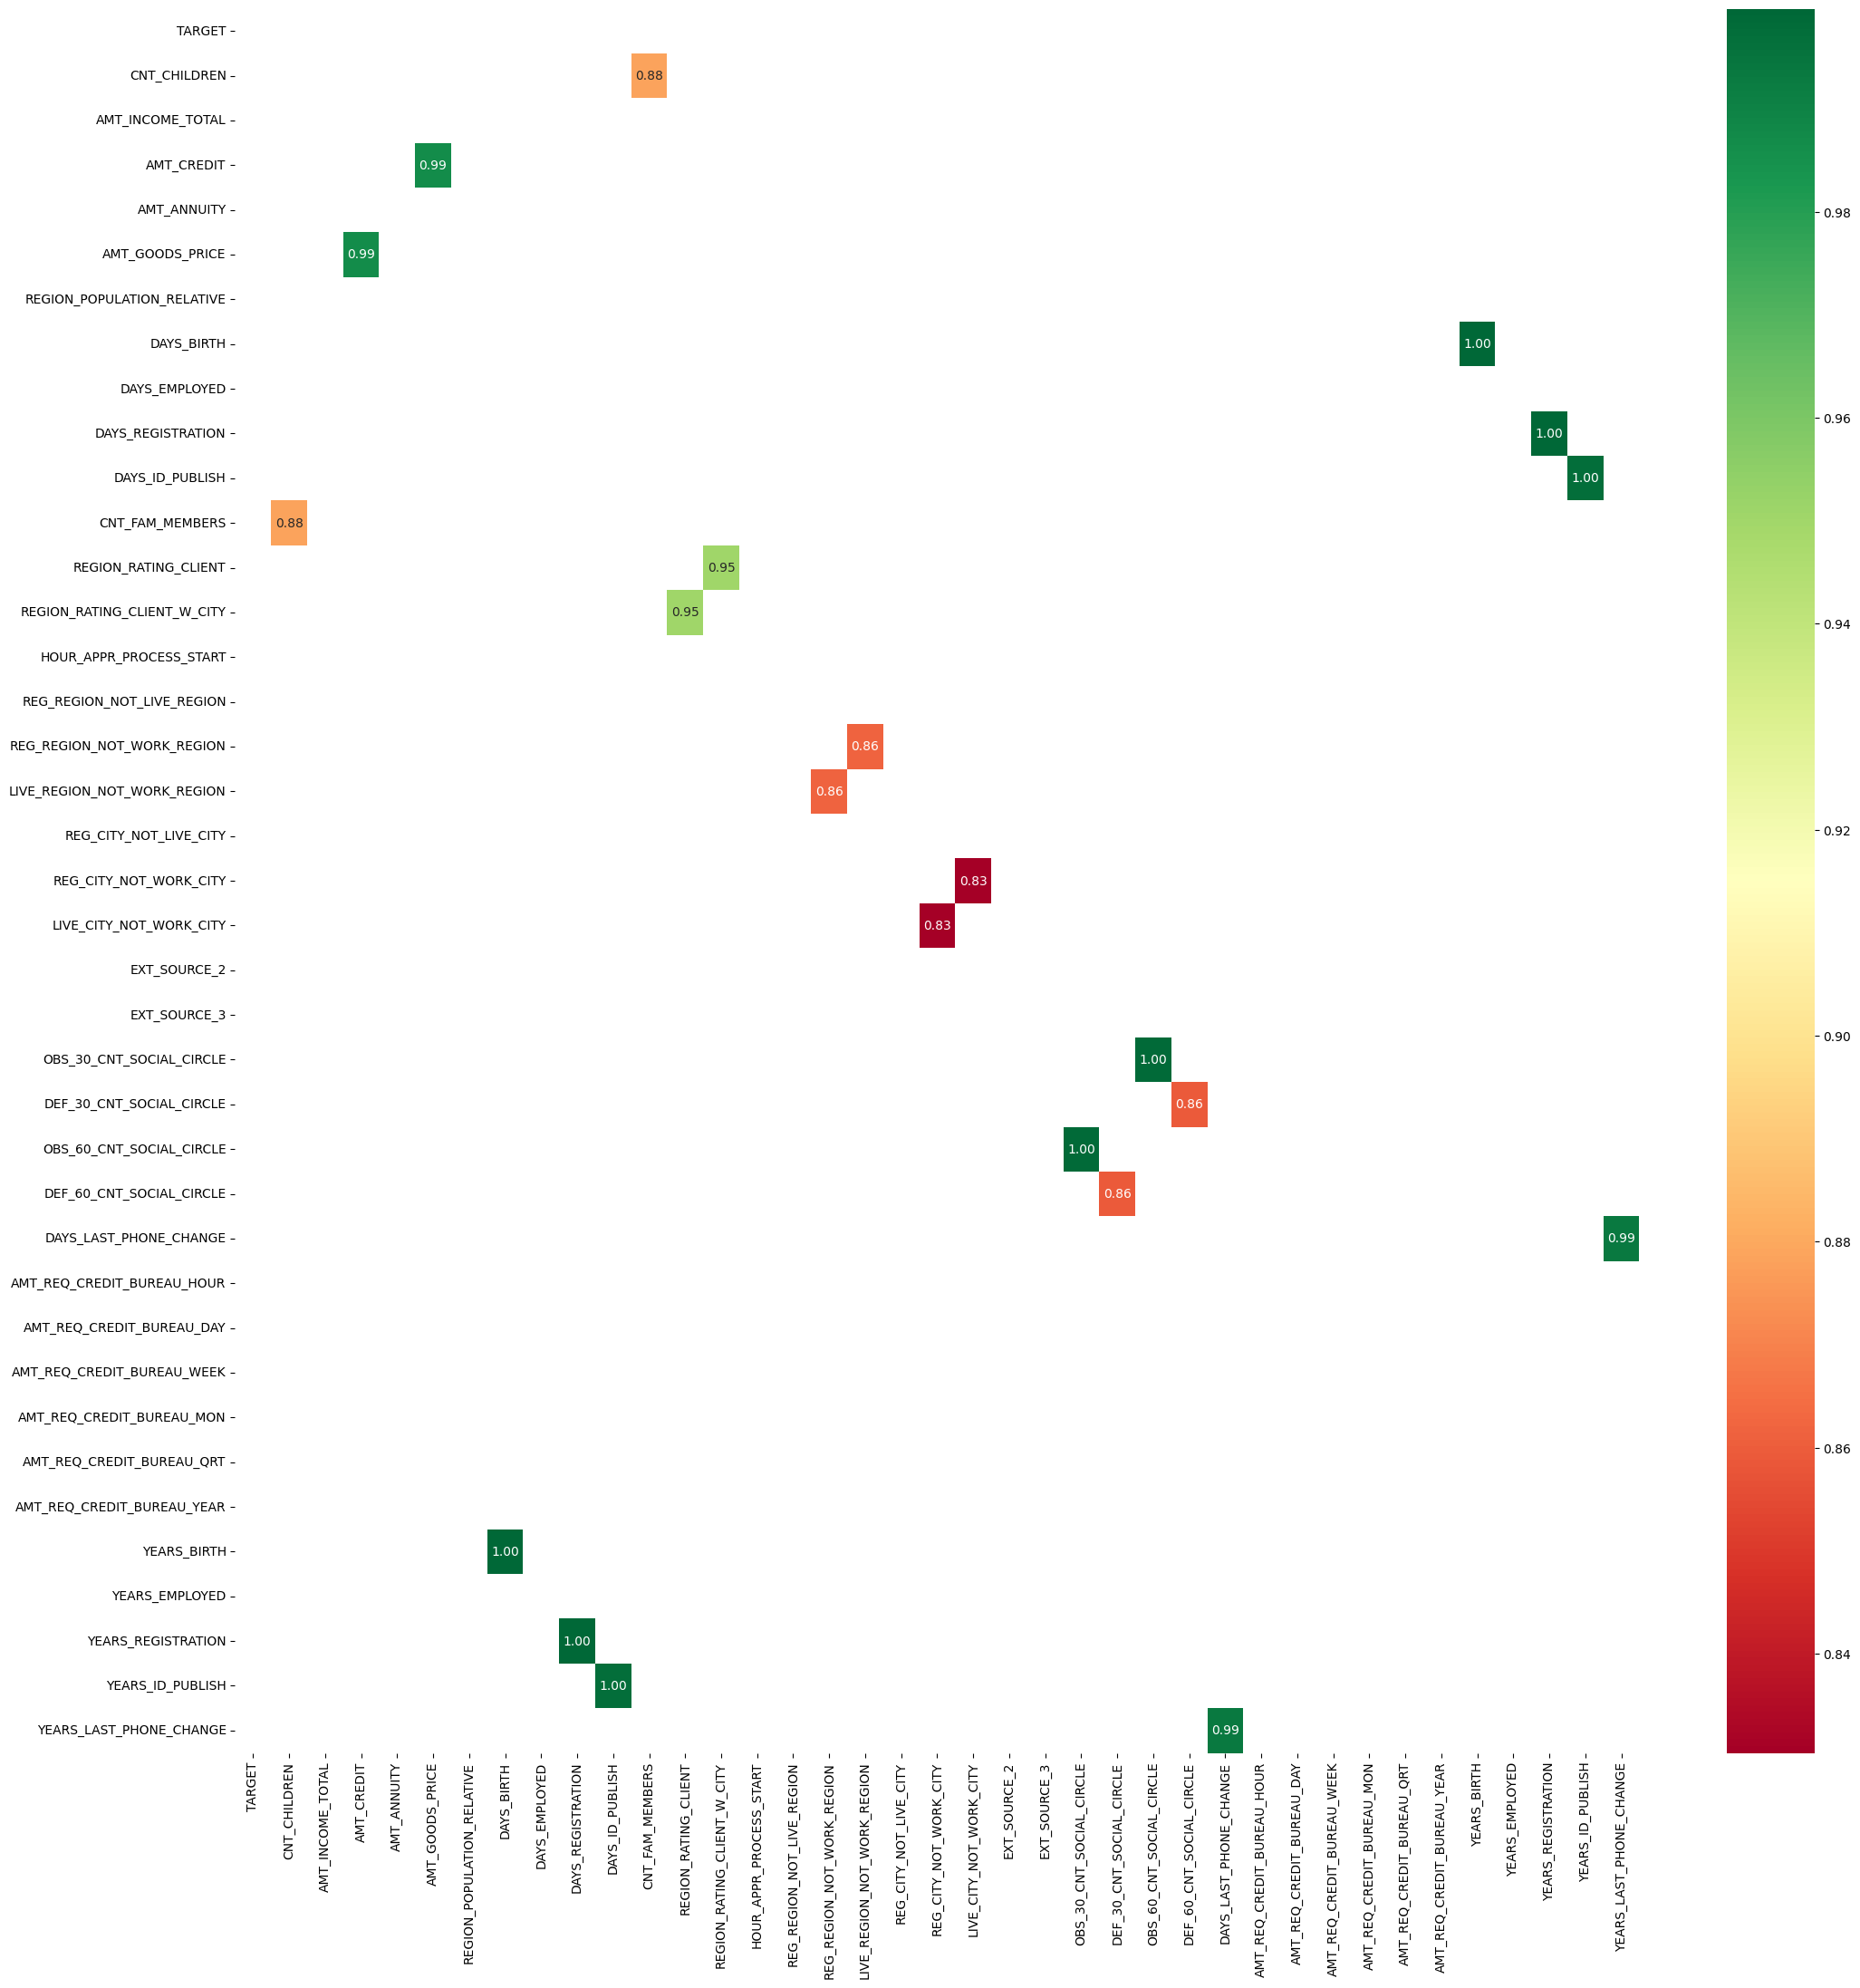

In [516]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df0[(corr_df0 >= 0.8) & (corr_df0 < 0.9999)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

### Подивимось на 10 найкращих кореляцій для вчасних платежів

In [517]:
corr_df0[corr_df0 <= 0.99].unstack().sort_values(ascending = False).head(28)

AMT_CREDIT                   AMT_GOODS_PRICE               0.99
AMT_GOODS_PRICE              AMT_CREDIT                    0.99
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.95
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.95
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.88
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.88
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.86
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.86
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.86
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.86
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.83
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.83
AMT_ANNUITY                  AMT_GOODS_PRICE               0.78
AMT_GOODS_PRICE              AMT_ANNUITY                   0.78
AMT_CREDIT                   AMT_ANNUITY                   0.77
AMT_ANNUITY                  AMT_CREDIT 

Оскільки у нас є комбінації, що повторюються, дивлячись на наведену вище таблицю і видаляючи дублі, ми отримуємо топ-10 кореляцій, як показано нижче:

- AMT_GOODS_PRICE              AMT_CREDIT                    0.99
- REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.95
- CNT_FAM_MEMBERS              CNT_CHILDREN                  0.88
- REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.86
- DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.86
- LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.83
- AMT_ANNUITY                  AMT_GOODS_PRICE               0.78
- AMT_ANNUITY                  AMT_CREDIT                    0.77
- DAYS_BIRTH                   DAYS_EMPLOYED                 0.63
- DAYS_EMPLOYED                FLAG_DOCUMENT_6               0.60

### Порівняємо 10 найкращих кореляцій між випадками із платіжними труднощами та вчасними платежами

**Спостереження**

- Топ-10 кореляцій для Труднощів з оплатою та Вчасних платежів однакові, за винятком незначних відмінностей у відсотках кореляції
- Найвища кореляція для комбінації `AMT_GOODS_PRICE` та `AMT_CREDIT`.
- Для набору даних "Труднощі з оплатою" кореляція між `AMT_GOODS_PRICE` та `AMT_CREDIT` становить 0,98
- Для набору даних "Вчасні платежі" кореляція між `AMT_GOODS_PRICE` та `AMT_CREDIT` становить 0,99

# Одновимірний аналіз числових змінних

### Аналіз стовпця `AMT_CREDIT`

#### Пошук викидів в `AMT_CREDIT` при випадках із платіжними труднощами

Розрахунок IQR (Inter Quartile range)

In [518]:
Q1 = df1['AMT_CREDIT'].quantile(0.25)
Q3 = df1['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

448915.5


Значення *до* (Q1 - 1.5 * IQR) та *після* (Q3 + 1.5 * IQR) є викидами.

In [519]:
Min_value1 = (Q1 - 1.5 * IQR)
Max_value1 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value1))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value1))

Мінімальне значення, до якого існують викиди: -388973.25
Максимальне значення, після якого існують викиди: 1406688.75


#### Пошук викидів в `AMT_CREDIT` при випадках із вчасними оплатами

Розрахунок IQR (Inter Quartile range)

In [520]:
Q1 = df0['AMT_CREDIT'].quantile(0.25)
Q3 = df0['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

540000.0


Значення *до* (Q1 - 1.5 * IQR) та *після* (Q3 + 1.5 * IQR) є викидами.

In [521]:
Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value0))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value0))

Мінімальне значення, до якого існують викиди: -540000.0
Максимальне значення, після якого існують викиди: 1620000.0


Видалення викидів і побудова діаграми розподілу

In [522]:
def kde_no_outliers(df0, df1, Max_value0, Max_value1, column):
  plt.figure(figsize = (14,6))
  sns.kdeplot(df1[df1[column] <= Max_value1][column],label = 'Payment difficulties')
  sns.kdeplot(df0[df0[column] <= Max_value0][column],label = 'On-Time Payments')
  plt.ticklabel_format(style='plain', axis='x')
  plt.xticks(rotation = 45)
  plt.legend()
  plt.show()

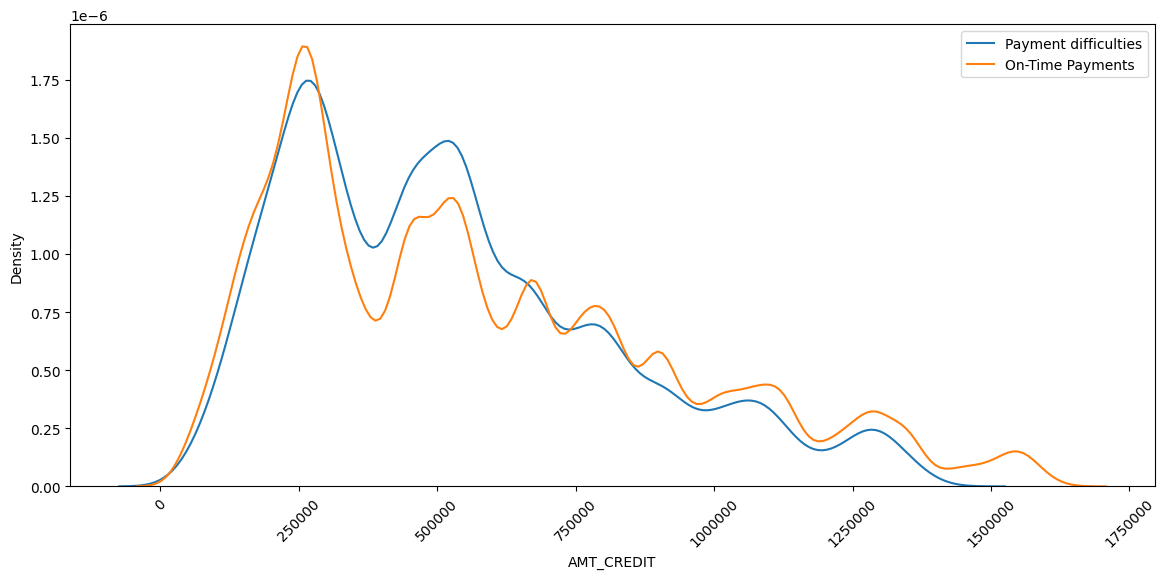

In [523]:
kde_no_outliers(df0, df1, Max_value0, Max_value1, 'AMT_CREDIT')

**Спостереження**

- Для `AMT_CREDIT` від 250000 до приблизно 650000 більше клієнтів мають труднощі з оплатою
- Для `AMT_CREDIT` > 750000 більше клієнтів, які вчасно здійснюють платежі

# ДЗ 5. Одновимірний аналіз числової колонки

За наведеним вище прикладом, проведіть одновимірний аналіз (виявлення викидів, їх усунення та побудова KDE  графіку) для числових змінних
- `YEARS_BIRTH`
- `AMT_GOODS_PRICE`
- `DAYS_EMPLOYED`

Опціонально:
- `CNT_CHILDREN`
- `AMT_INCOME_TOTAL`

Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної двійки змінних.

Зробіть висновки з аналізу.

In [524]:
def get_single_dimension_analysis(df0, df1, column_name):
    Q1_0 = df0[column_name].quantile(0.25)
    Q3_0 = df0[column_name].quantile(0.75)
    IQR_0 = Q3_0 - Q1_0
    lower_outlier_bound_0 = (Q1_0 - 1.5 * IQR_0)
    upper_outlier_bound_0 = (Q3_0 + 1.5 * IQR_0)
    print("Межі для вчасних оплат")
    print("Нижня межа, до якої існують викиди: {}".format(lower_outlier_bound_0))
    print("Верхня межа, після якої існують викиди: {}".format(upper_outlier_bound_0))


    Q1_1 = df1[column_name].quantile(0.25)
    Q3_1 = df1[column_name].quantile(0.75)
    IQR_1 = Q3_1 - Q1_1
    lower_outlier_bound_1 = (Q1_1 - 1.5 * IQR_1)
    upper_outlier_bound_1 = (Q3_1 + 1.5 * IQR_1)
    print("\nМежі для оплат із труднощами")
    print("Нижня межа, до якої існують викиди: {}".format(lower_outlier_bound_1))
    print("Верхня межа, після якої існують викиди: {}".format(upper_outlier_bound_1))

    kde_no_outliers(df0, df1, upper_outlier_bound_0, upper_outlier_bound_1, column_name)

Межі для вчасних оплат
Нижня межа, до якої існують викиди: 4.0
Верхня межа, після якої існують викиди: 84.0

Межі для оплат із труднощами
Нижня межа, до якої існують викиди: 4.0
Верхня межа, після якої існують викиди: 76.0


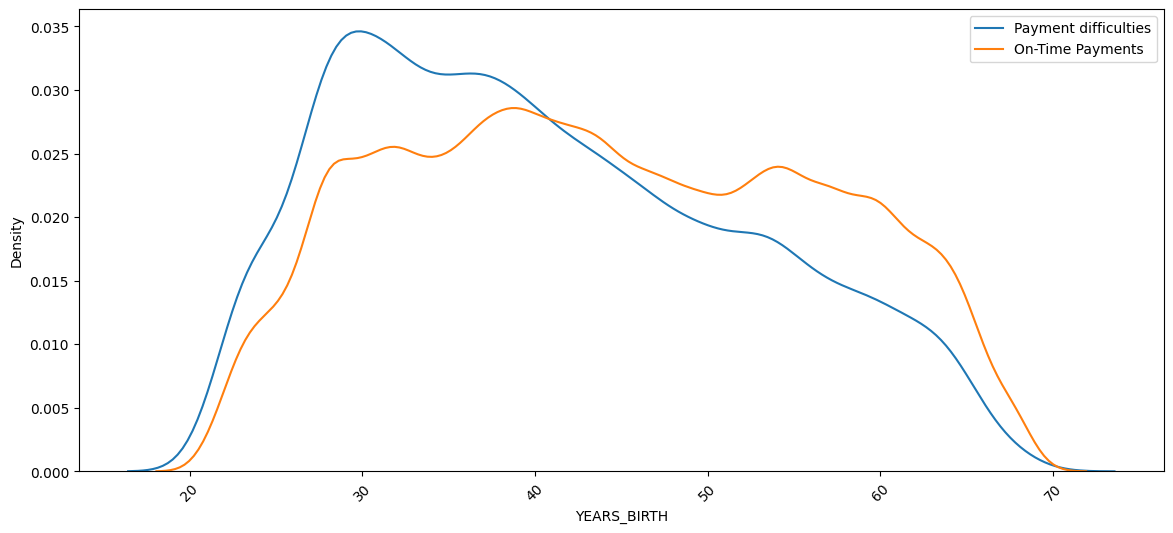

In [525]:
get_single_dimension_analysis(df0, df1, 'YEARS_BIRTH')

Спостереження по `YEARS_BIRTH`:
- Клієнти віком від 18 до 40 років більше мають труднощів з оплатою платежів
- Для клієнтів від 40 років труднощів виникає менше з оплатою платежів

Межі для вчасних оплат
Нижня межа, до якої існують викиди: -431253.5625
Верхня межа, після якої існують викиди: 1354755.9375

Межі для оплат із труднощами
Нижня межа, до якої існують викиди: -416250.0
Верхня межа, після якої існують викиди: 1329750.0


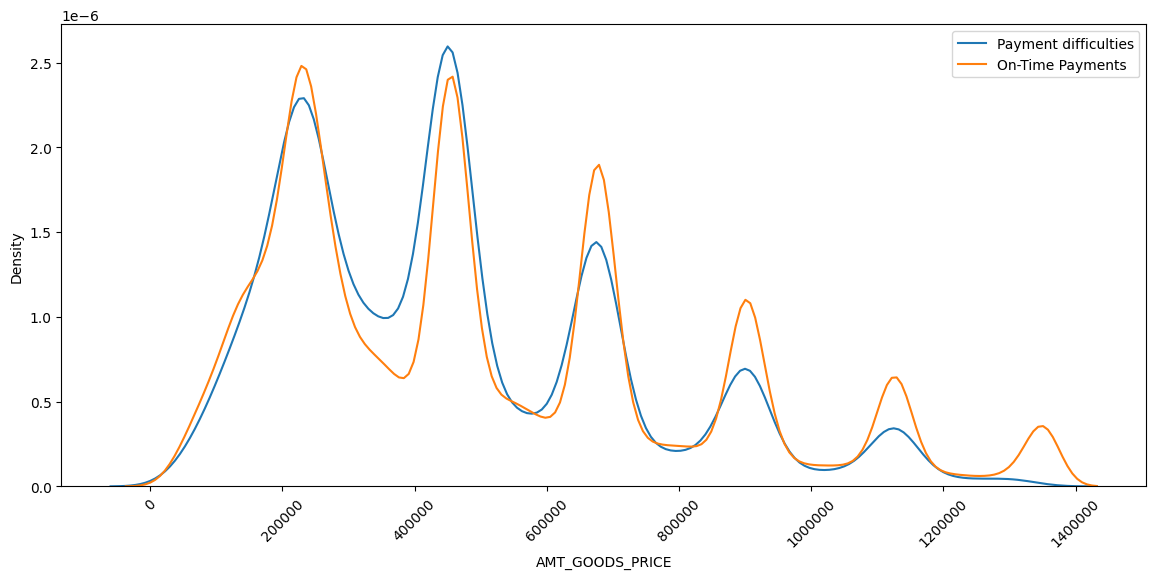

In [526]:
get_single_dimension_analysis(df0, df1, 'AMT_GOODS_PRICE')

Спостереження по `AMT_GOODS_PRICE`:
- Для `AMT_GOODS_PRICE` орієнтовно від 250000 до 500000 більше клієнтів мають труднощі з оплатою
- Для `AMT_GOODS_PRICE` приблизно від 650000 більше клієнтів, яким вдається сплатити вчасно

Межі для вчасних оплат
Нижня межа, до якої існують викиди: -6693.5
Верхня межа, після якої існують викиди: 13734.5

Межі для оплат із труднощами
Нижня межа, до якої існують викиди: -3227.5
Верхня межа, після якої існують викиди: 7184.5


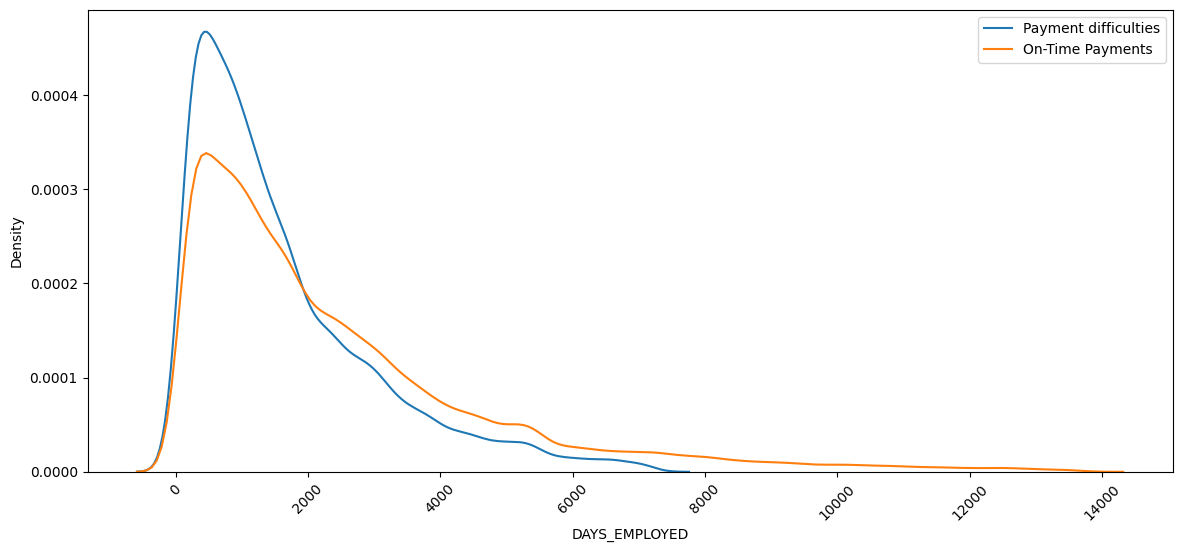

In [527]:
get_single_dimension_analysis(df0, df1, 'DAYS_EMPLOYED')

Спостереження по `DAYS_EMPLOYED`:
- Для `DAYS_EMPLOYED` від -1 до 2000 більше клієнтів мають труднощі з оплатою
- Для `DAYS_EMPLOYED` від 2000 більше клієнтів, яким вдається сплатити вчасно

Межі для вчасних оплат
Нижня межа, до якої існують викиди: -22500.0
Верхня межа, після якої існують викиди: 337500.0

Межі для оплат із труднощами
Нижня межа, до якої існують викиди: -22500.0
Верхня межа, після якої існують викиди: 337500.0


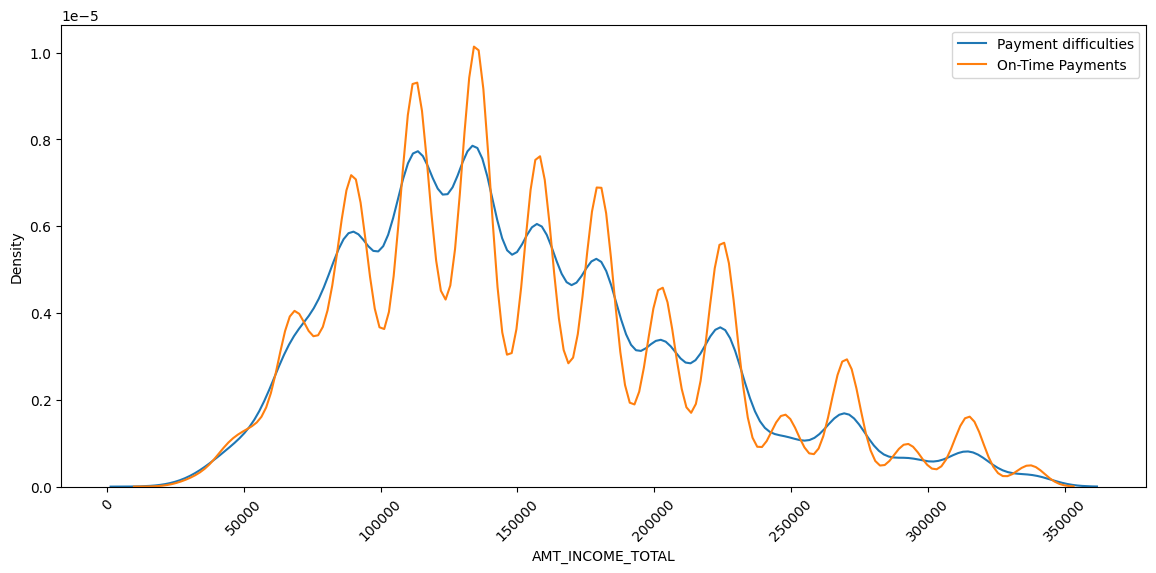

In [528]:
get_single_dimension_analysis(df0, df1, 'AMT_INCOME_TOTAL')

Спостереження по `AMT_INCOME_TOTAL`:
- Помітив, що клієнти, в яких виникають труднощі з оплатами переважно беруть суми від 100000 до 150000, проте клієнтів в яких відсутні труднощі припадає багато в рейндж даних сум. Відповідно потрібно врахувати додаткову змінну, щоб побачити залежність

**Висновок:**<br>
Клієнти віком до **40** років, з `AMT_GOODS_PRICE` орієнтовно від **250000** до **500000** та працевлаштовані менше **2000** днів мають труднощі з погашенням платежів

# Двовимірний/Багатовимірний аналіз

## Неперервні vs неперервні змінні

### Аналіз стовпця `AMT_GOODS_PRICE` vs `AMT_CREDIT`

**Пошук викидів для ствопця `AMT_GOODS_PRICE ` для групи із платіжними труднощами**

In [529]:
max_value1_AMT_GOODS_PRICE = outlier_range(df1,'AMT_GOODS_PRICE')
max_value1_AMT_GOODS_PRICE

1329750.0

**Пошук викидів для ствопця `AMT_CREDIT` для групи із платіжними труднощами**

In [530]:
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value1_AMT_CREDIT

1406688.75

**Пошук викидів для `AMT_GOODS_PRICE `для групи із вчасними оплатами**

In [531]:
max_value0_AMT_GOODS_PRICE = outlier_range(df0,'AMT_GOODS_PRICE')
max_value0_AMT_GOODS_PRICE

1354755.9375

**Пошук викидів для `AMT_CREDIT `для групи із вчасними оплатами**

In [532]:
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')
max_value0_AMT_CREDIT

1620000.0

Побудова діаграми розсіювання для порівняння з видаленими викидами

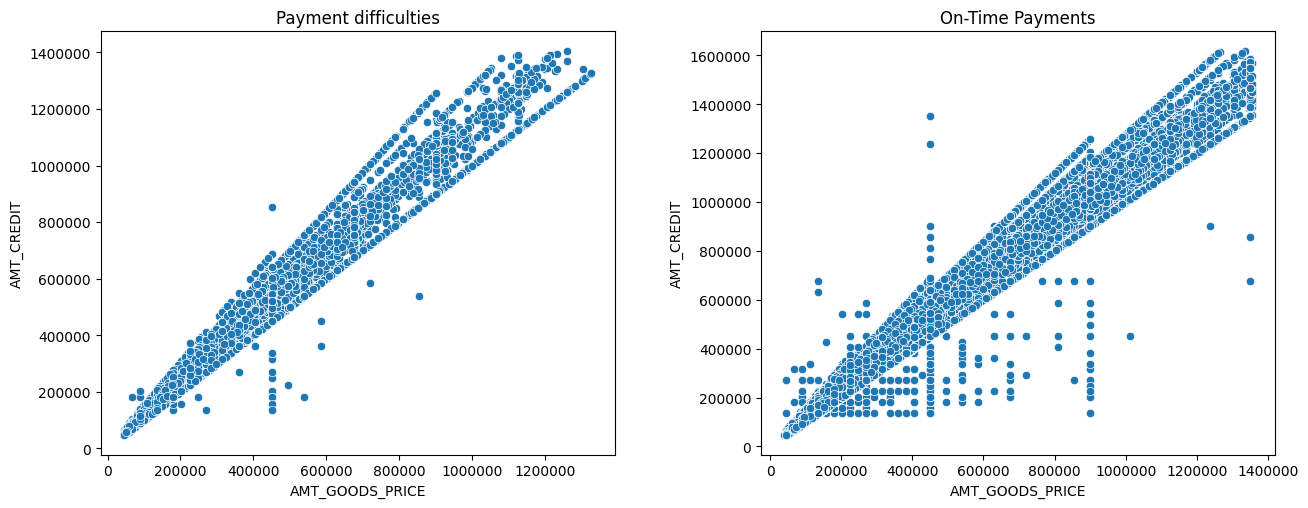

In [533]:
plt.figure(figsize = (14, 6))

plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['AMT_GOODS_PRICE'] < max_value1_AMT_GOODS_PRICE].AMT_GOODS_PRICE,
                y = df1[df1['AMT_CREDIT'] < max_value1_AMT_CREDIT].AMT_CREDIT, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['AMT_GOODS_PRICE'] < max_value0_AMT_GOODS_PRICE].AMT_GOODS_PRICE,
                y = df0[df0['AMT_CREDIT'] < max_value0_AMT_CREDIT].AMT_CREDIT, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout(pad = 4)
plt.show()

**Спостереження**
- AMT_GOODS_PRICE та AMT_CREDIT мають сильну позитивну кореляцію. Це означає, що зі збільшенням ціни товару зростає і сума кредиту

# ДЗ 6. Кореляційний аналіз для пари числових змінних

За наведеним вище прикладом, проведіть кореляційний аналіз для пар змінних
- AMT_ANNUITY і AMT_CREDIT

Опціонально:
- DAYS_EMPLOYED і AMT_INCOME_TOTAL
- AMT_CREDIT і DAYS_BIRTH

[Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної двійки змінних.](https://)
Зробіть висновок про наявність кореляції між змінними.

In [534]:
max_value_AMT_ANNUITY_0 = outlier_range(df0,'AMT_ANNUITY')
max_value_AMT_ANNUITY_1 = outlier_range(df1,'AMT_ANNUITY')
print("Максимальне значення для клієнтів без труднощів з оплатою, після якого існують викиди: {}".format(max_value_AMT_ANNUITY_0))
print("Максимальне значення для клієнтів з труднощами з оплатою, після якого існують викиди: {}".format(max_value_AMT_ANNUITY_1))

Максимальне значення для клієнтів без труднощів з оплатою, після якого існують викиди: 62187.75
Максимальне значення для клієнтів з труднощами з оплатою, після якого існують викиди: 56398.5


In [535]:
def get_correlation_info(df0, df1, column_1, column_2):
    
    max_value_column_1_0 = outlier_range(df0,column_1)
    max_value_column_2_0 = outlier_range(df0,column_2)
    max_value_column_1_1 = outlier_range(df1,column_1)
    max_value_column_2_1 = outlier_range(df1,column_2)
    
    plt.figure(figsize = (14, 6))
    
    plt.subplot(1,2,1)
    plt.title('Payment difficulties')
    sns.scatterplot(x = df1[df1[column_1] < max_value_column_1_1].eval(column_1),
                    y = df1[df1[column_2] < max_value_column_2_1].eval(column_2), data = df1)
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    
    plt.subplot(1,2,2)
    plt.title('On-Time Payments')
    sns.scatterplot(x = df0[df0[column_1] < max_value_column_1_0].eval(column_1),
                    y = df0[df0[column_2] < max_value_column_2_0].eval(column_2), data = df0)
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    
    plt.tight_layout(pad = 4)
    plt.show()

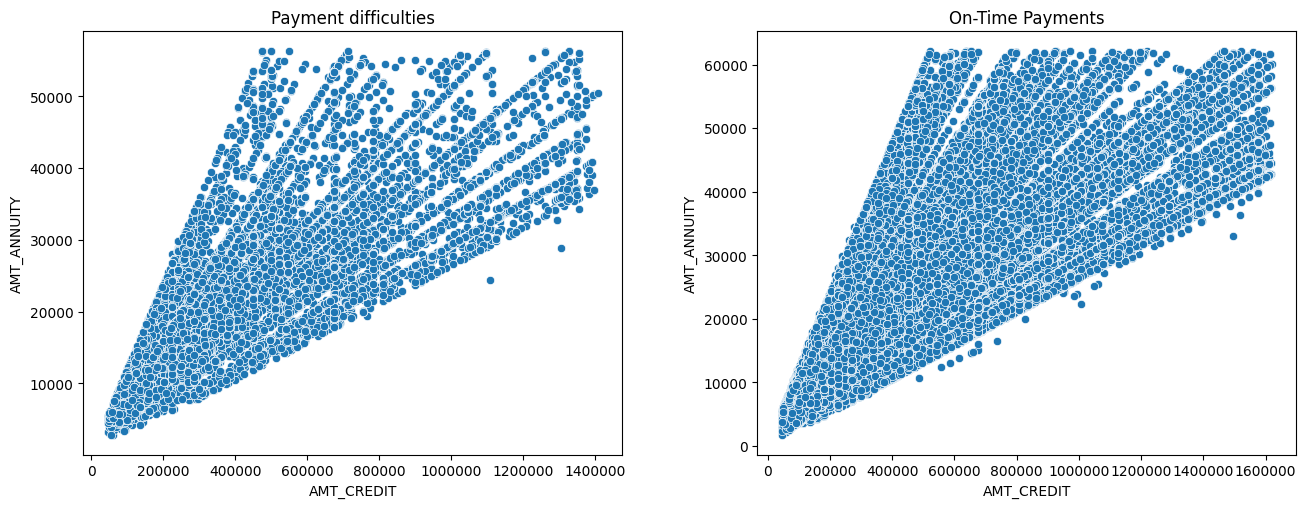

In [536]:
get_correlation_info(df0, df1, 'AMT_CREDIT', 'AMT_ANNUITY')

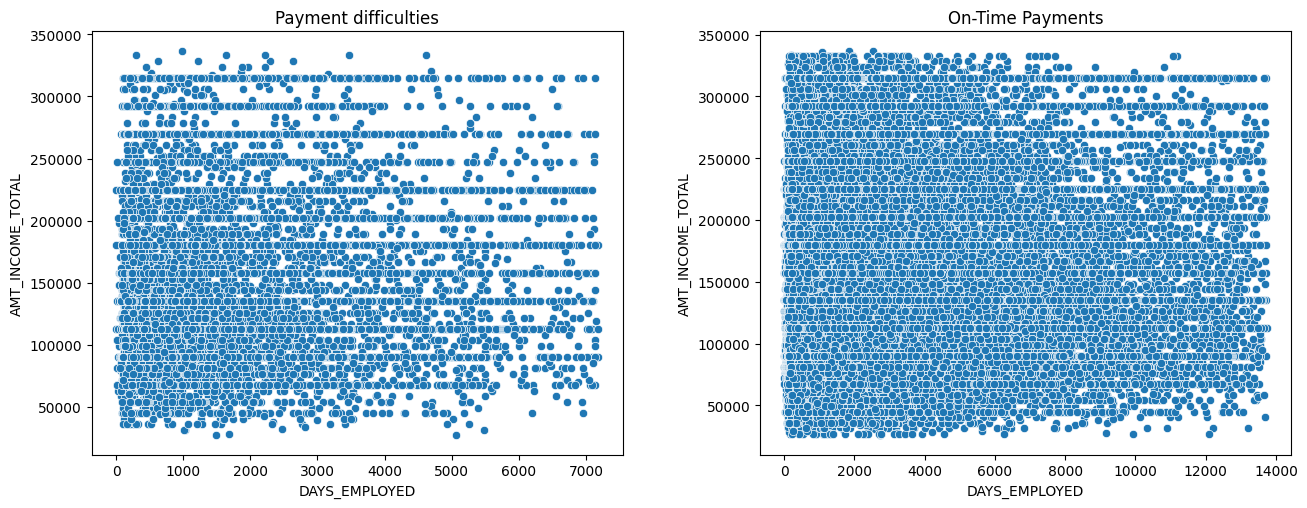

In [537]:
get_correlation_info(df0, df1, 'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL')

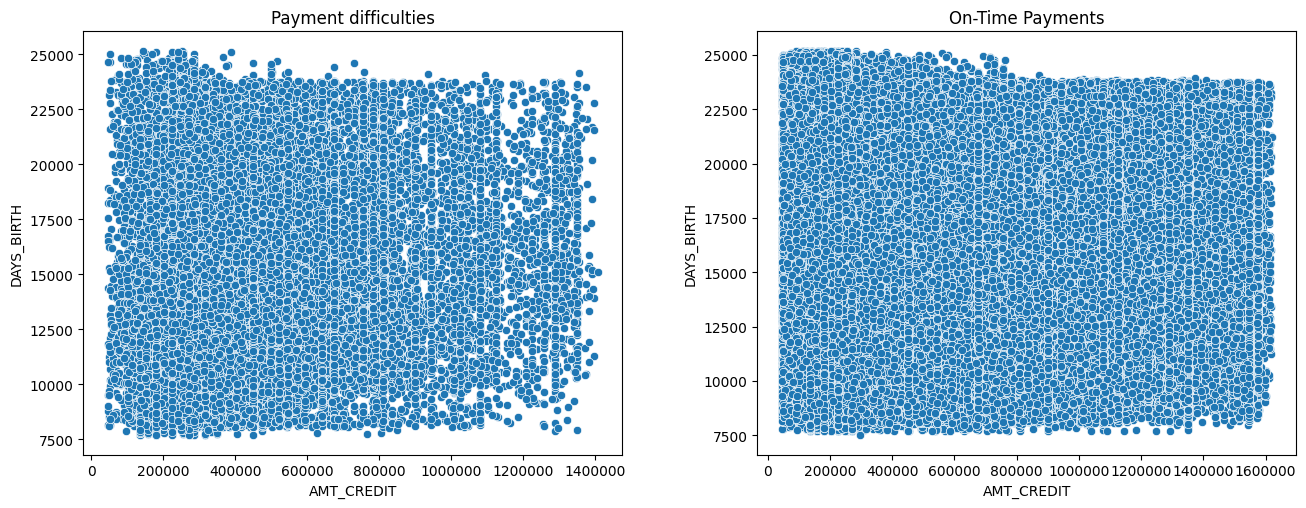

In [538]:
get_correlation_info(df0, df1, 'AMT_CREDIT', 'DAYS_BIRTH')

**Висновок:** `AMT_CREDIT` та `AMT_ANNUITY` мають сильну позитивну кореляцію, що показує зі збільшенням суми ануїтету збільшуєть сума позики і навпаки зі збільшенням суми позики збільшується сума ануїтету. 

Між змінними `DAYS_EMPLOYED` та `AMT_INCOME_TOTAL` не побачив явної кореляції, тому припускаю що відсутня явна залежність між кількістю днів працевлаштування клієнта та його доходом. 

Аналогічно між змінними `AMT_CREDIT` та `DAYS_BIRTH`, припускаю, що залежність відсутня

## Неперервні та категоріальні змінні

In [539]:
def draw_boxplot(df, categorical, continuous, max_continuous, title, hue_column, subplot_position):
    """
    Малює блок-діаграму для заданого DataFrame, категоріальної та неперервної змінної.
    """
    plt.subplot(1, 2, subplot_position)
    plt.title(title)
    red_diamond = dict(markerfacecolor='r', marker='D')
    sns.boxplot(x=categorical,
                y=df[df[continuous] < max_continuous][continuous],
                data=df,
                flierprops=red_diamond,
                order=sorted(df[categorical].unique(), reverse=True),
                hue=hue_column, hue_order=sorted(df[hue_column].unique(), reverse=True))
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(rotation=90)

def bi_boxplot(categorical, continuous, max_continuous1, max_continuous0, hue_column):
    """
    Створює паралельні блок-діаграми для двох груп, визначених у наборі даних, на основі
    категоріальної та неперервної змінної, виділяючи відмінності за допомогою відтінків.
    """
    plt.figure(figsize=(16, 10))

    # Графік для першо групи "Труднощі з платежами" (Payment Difficulties)
    draw_boxplot(df1, categorical, continuous, max_continuous1, 'Payment Difficulties', hue_column, 1)

    # Графік для другої групи "Вчасні оплати" (On-Time Payments)
    draw_boxplot(df0, categorical, continuous, max_continuous0, 'On-Time Payments', hue_column, 2)

    plt.tight_layout(pad=4)
    plt.show()

### Аналіз стовпців `AMT_CREDIT` vs `NAME_EDUCATION_TYPE` vs `CODE_GENDER`

**Пошук викидів для `AMT_CREDIT `для групи із платіжними труднощами**

In [540]:
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value1_AMT_CREDIT

1406688.75

**Пошук викидів для `AMT_CREDIT ` для групи із вчасними платежами**

In [541]:
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')
max_value0_AMT_CREDIT

1620000.0

**Клієнт з платіжними труднощами**

In [542]:
df1.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

count      mean       std       min  \
NAME_EDUCATION_TYPE CODE_GENDER                                         
Academic degree     F              3.00 950245.50 504711.38 544491.00   
Higher education    F           2438.00 648500.58 410415.70  47970.00   
                    M           1571.00 642070.94 409695.93  45000.00   
Incomplete higher   F            504.00 520150.35 352227.49  91692.00   
                    M            368.00 554723.82 347843.71  74628.00   

                                      25%       50%        75%        max  
NAME_EDUCATION_TYPE CODE_GENDER                                            
Academic degree     F           667660.50 790830.00 1153122.75 1515415.50  
Higher education    F           323595.00 545040.00  877500.00 2687355.00  
                    M           329202.00 545040.00  832797.00 2695500.00  
Incomplete higher   F           269550.00 450000.00  675000.00 2695500.00  
                    M           284400.00 497520.00  699976.12 2013840.00

**Клієнт зі вчасними платежами**

In [543]:
df0.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

count      mean       std       min  \
NAME_EDUCATION_TYPE CODE_GENDER                                          
Academic degree     F              97.00 708770.74 463052.42 130824.00   
                    M              64.00 735235.38 497739.97  74182.50   
Higher education    F           47852.00 682485.00 456642.78  45000.00   
                    M           23002.00 713144.54 486073.66  45000.00   
Incomplete higher   F            5780.00 555340.53 385980.60  45000.00   

                                      25%       50%        75%        max  
NAME_EDUCATION_TYPE CODE_GENDER                                            
Academic degree     F           354469.50 607500.00 1006920.00 2463840.00  
                    M           309519.00 610056.00 1036890.00 1984500.00  
Higher education    F           302206.50 568057.50  916470.00 4050000.00  
                    M           315000.00 592560.00  973503.00 4050000.00  
Incomplete higher   F           253737.00 454500.00  760225.50 2517300.00

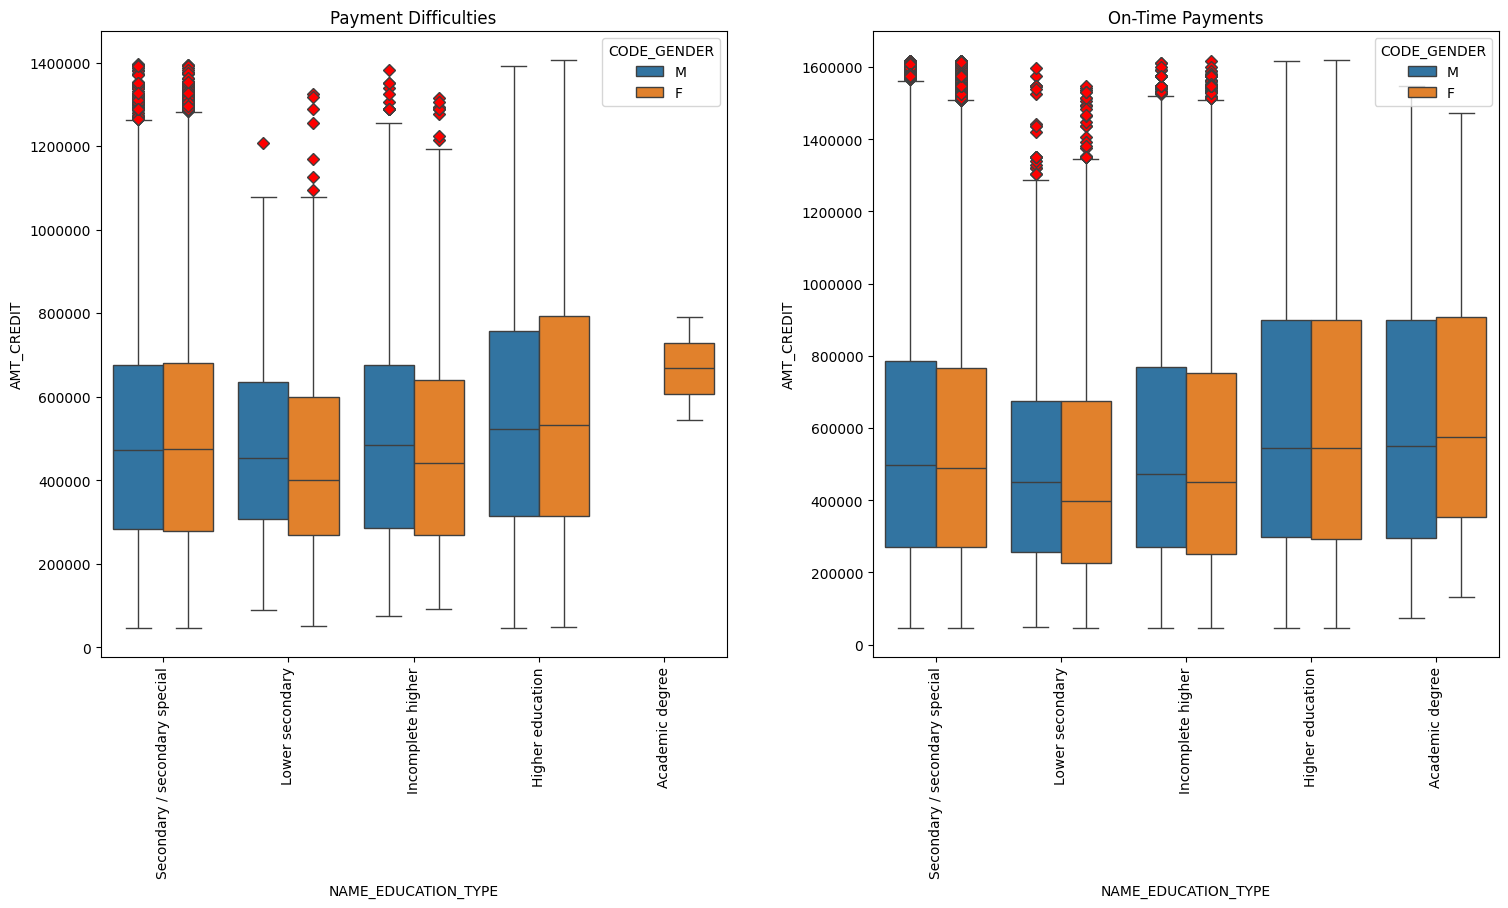

In [544]:
bi_boxplot('NAME_EDUCATION_TYPE','AMT_CREDIT',max_value1_AMT_CREDIT, max_value0_AMT_CREDIT, 'CODE_GENDER')

**Спостереження**
- Клієнти з "академічним ступенем" мають широкий діапазон кредитів для своєчасних платежів, тоді як для клієнтів з проблемами з оплатою цей діапазон значно нижчий
- Якщо поглянути на зведену статистику, то клієнти з "вищою освітою" та проблемами з оплатою беруть середній та медіанний кредит у значно більшому діапазоні, ніж клієнти з вчасною оплатою.
- Клієнти-чоловіки з "вищою освітою" завжди сплачують кредит вчасно

# ДЗ 7. Кореляційний аналіз між двома категоріальними змінними і числовою

Проведіть аналогічний кореляційний аналіз для трійок змінних

- AMT_INCOME_TOTAL vs NAME_FAMILY_STATUS vs CODE_GENDER

Опціонально - трійки які можна додатково проаналізувати:
- AMT_INCOME_TOTAL vs YEARS_BIRTH_CATEGORY vs NAME_HOUSING_TYPE
- AMT_GOODS_PRICE vs NAME_INCOME_TYPE vs CODE_GENDER
- AMT_INCOME_TOTAL vs OCCUPATION_TYPE vs CODE_GENDER

А ще можете також проаналізувати додатково до обовʼязкової свою трійку :)

Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної трійки змінних.

Зробіть висновок про наявність кореляції між змінними.


In [545]:
def numeric_vs_categorical_analysis(df0, df1, column_1, column_2, column_3):
  max_value1_column_1 = outlier_range(df1, column_1)
  max_value0_column_1 = outlier_range(df0, column_1)

  # Клієнт з платіжними труднощами

  display(df1.groupby(by = [column_2, column_3])[column_1].describe())

  # Клієнт зі своєчасними платежами

  display(df0.groupby(by = [column_2, column_3])[column_1].describe())

  bi_boxplot(column_2, column_1, max_value1_column_1, max_value0_column_1, column_3)

count      mean        std      min  \
NAME_FAMILY_STATUS   CODE_GENDER                                         
Civil marriage       F           1753.00 153620.72  101045.86 25650.00   
                     M           1208.00 173949.99   92449.17 36000.00   
Married              F           8324.00 159907.85 1283283.40 27000.00   
                     M           6526.00 182233.06   94787.77 31500.00   
Separated            F           1045.00 161159.55   82633.33 36000.00   
                     M            575.00 178888.28   85034.85 45000.00   
Single / not married F           2220.00 150373.57   76996.14 31500.00   
                     M           2237.00 166827.99   80471.61 40500.00   
Widow                F            828.00 141806.90   67647.06 28575.00   
                     M            109.00 145368.70   67543.57 45000.00   

                                       25%       50%       75%          max  
NAME_FAMILY_STATUS   CODE_GENDER                                             
Civil marriage       F           108000.00 135000.00 180000.00   3150000.00  
                     M           117000.00 157500.00 202500.00   1350000.00  
Married              F            90000.00 135000.00 180000.00 117000000.00  
                     M           126000.00 157500.00 225000.00   1890000.00  
Separated            F           112500.00 135000.00 202500.00    832500.00  
                     M           126000.00 157500.00 225000.00    675000.00  
Single / not married F           103500.00 135000.00 180000.00    810000.00  
                     M           112500.00 157500.00 202500.00    990000.00  
Widow                F            90000.00 130500.00 180000.00    540000.00  
                     M            90000.00 135000.00 180000.00    360000.00

count      mean       std      min  \
NAME_FAMILY_STATUS   CODE_GENDER                                          
Civil marriage       F            19017.00 162086.05 106811.49 27000.00   
                     M             7797.00 184126.29 106559.49 27000.00   
Married              F           114125.00 154289.53  88593.43 26100.00   
                     M            67459.00 199592.83 147599.76 27000.00   
Separated            F            14416.00 166374.21  94782.18 27000.00   
                     M             3734.00 191625.46 102991.28 32850.00   
Single / not married F            26364.00 160796.87  89306.04 25650.00   
                     M            14623.00 183592.86 117388.19 27000.00   
Widow                F            14360.00 142114.63  76227.05 26100.00   
                     M              791.00 160029.19  95460.17 28350.00   

                                       25%       50%       75%         max  
NAME_FAMILY_STATUS   CODE_GENDER                                            
Civil marriage       F           112500.00 135000.00 202500.00  9000000.00  
                     M           121500.00 157500.00 225000.00  3825000.00  
Married              F            94500.00 135000.00 180000.00  3600000.00  
                     M           135000.00 180000.00 225000.00 18000090.00  
Separated            F           112500.00 139500.00 202500.00  2250000.00  
                     M           135000.00 180000.00 225000.00  1235038.50  
Single / not married F           112500.00 135000.00 198000.00  2250000.00  
                     M           121500.00 157500.00 225000.00  4500000.00  
Widow                F            90000.00 126000.00 180000.00  1800000.00  
                     M            99000.00 135000.00 202500.00  1035000.00

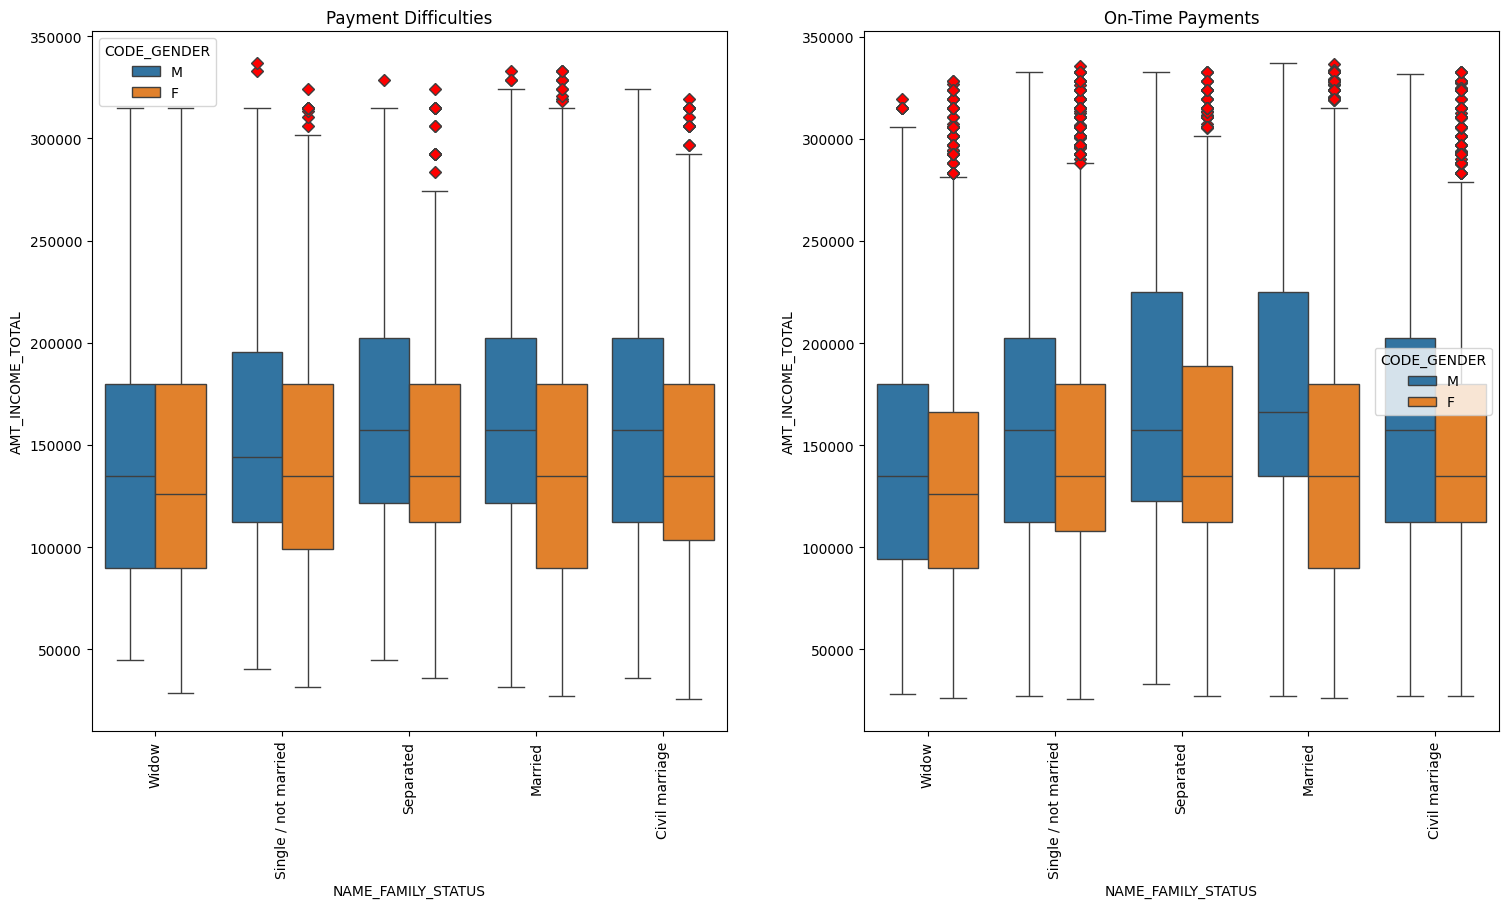

In [546]:
numeric_vs_categorical_analysis(df0, df1, 'AMT_INCOME_TOTAL', 'NAME_FAMILY_STATUS', 'CODE_GENDER')

**Спостереження:** явних залежностей не виділяю, помітив лише що в чоловіків по середньому медіанному дохід більший

count      mean        std  \
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                  
20-30                Co-op apartment       40.00 148628.70   59516.24   
                     House / apartment   4201.00 151897.22   70874.65   
                     Municipal apartment  153.00 153608.82   78282.79   
                     Office apartment      40.00 147375.00   50817.26   
                     Rented apartment     229.00 144210.10   59998.66   
                     With parents         930.00 143226.04   68189.31   
30-40                Co-op apartment       27.00 199515.00   96443.31   
                     House / apartment   6606.00 184272.70 1440563.87   
                     Municipal apartment  286.00 163485.31   85352.32   
                     Office apartment      61.00 180158.83   98569.05   
                     Rented apartment     227.00 165680.39   68067.23   
                     With parents         602.00 151128.93   68186.98   
40-50                Co-op apartment       11.00 199636.36   99046.48   
                     House / apartment   5168.00 171498.54   95432.67   
                     Municipal apartment  253.00 168851.38   93043.54   
                     Office apartment      34.00 177485.29   89673.44   
                     Rented apartment     101.00 178150.99  112880.24   
                     With parents         158.00 192001.90  128514.78   
50-60                Co-op apartment        8.00 172125.00   93615.76   
                     House / apartment   3791.00 161545.92   87107.33   
                     Municipal apartment  200.00 156792.15   79999.75   
                     Office apartment      22.00 154227.27   48925.53   
                     Rented apartment      38.00 160744.74   67767.05   
                     With parents          43.00 164040.70   86946.62   
60-70                Co-op apartment        3.00 180000.00   98075.23   
                     House / apartment   1506.00 134858.16   76293.59   
                     Municipal apartment   63.00 135271.43   61730.61   
                     Office apartment      15.00 128880.00   66263.12   
                     Rented apartment       6.00 108750.00   36298.76   
                     With parents           3.00 186000.00  132756.36   

                                              min       25%       50%  \
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                  
20-30                Co-op apartment     67500.00 110250.00 135000.00   
                     House / apartment   31500.00 112500.00 135000.00   
                     Municipal apartment 45000.00 108000.00 135000.00   
                     Office apartment    67500.00 112500.00 135000.00   
                     Rented apartment    45000.00  99000.00 135000.00   
                     With parents        27900.00  99000.00 135000.00   
30-40                Co-op apartment     81000.00 135000.00 157500.00   
                     House / apartment   27000.00 112500.00 157500.00   
                     Municipal apartment 38250.00 112500.00 136125.00   
                     Office apartment    52438.50 130500.00 157500.00   
                     Rented apartment    36000.00 112500.00 157500.00   
                     With parents        40500.00 112500.00 135000.00   
40-50                Co-op apartment     58500.00 135000.00 180000.00   
                     House / apartment   27000.00 112500.00 157500.00   
                     Municipal apartment 45000.00 112500.00 135000.00   
                     Office apartment    54000.00 112500.00 168750.00   
                     Rented apartment    40500.00 112500.00 157500.00   
                     With parents        45450.00 122625.00 157500.00   
50-60                Co-op apartment     54000.00 124875.00 146250.00   
                     House / apartment   25650.00 112500.00 135000.00   
                     Municipal apartment 36000.00  90000.00 135000.00   
                     Office

count      mean       std  \
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                  
20-30                Co-op apartment       298.00 161153.15  76171.26   
                     House / apartment   33165.00 163944.39  92313.18   
                     Municipal apartment  1099.00 166235.08  88698.47   
                     Office apartment      455.00 177960.18 115765.13   
                     Rented apartment     1535.00 153028.06  70748.99   
                     With parents         6724.00 151305.61  90033.83   
30-40                Co-op apartment       308.00 167912.96  82059.39   
                     House / apartment   65237.00 179666.42 117552.25   
                     Municipal apartment  2507.00 181264.34  95937.44   
                     Office apartment      811.00 204007.25 111420.44   
                     Rented apartment     1521.00 174223.96  91030.95   
                     With parents         4577.00 167755.49  90583.95   
40-50                Co-op apartment       232.00 182802.80  97705.04   
                     House / apartment   64038.00 181200.92 131158.99   
                     Municipal apartment  2818.00 178119.98 113841.18   
                     Office apartment      578.00 206282.23 120775.57   
                     Rented apartment      775.00 187331.53 103960.04   
                     With parents         1343.00 173484.90  94722.97   
50-60                Co-op apartment       134.00 168991.79  79466.84   
                     House / apartment   59896.00 164136.97 104934.64   
                     Municipal apartment  2683.00 160794.21  92624.88   
                     Office apartment      419.00 168407.94 134101.34   
                     Rented apartment      340.00 180109.85 117146.79   
                     With parents          381.00 165480.01  83044.86   
60-70                Co-op apartment        61.00 128913.93  78766.44   
                     House / apartment   29260.00 137613.63  76318.52   
                     Municipal apartment  1121.00 138664.51  73515.98   
                     Office apartment      182.00 149946.26  88270.46   
                     Rented apartment      109.00 143795.31 105190.65   
                     With parents           79.00 139494.30  74425.16   

                                              min       25%       50%  \
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                  
20-30                Co-op apartment     45000.00 112500.00 139500.00   
                     House / apartment   27000.00 112500.00 141264.00   
                     Municipal apartment 45000.00 112500.00 144000.00   
                     Office apartment    36000.00 112500.00 157500.00   
                     Rented apartment    29250.00 109125.00 135000.00   
                     With parents        27000.00 108000.00 135000.00   
30-40                Co-op apartment     49500.00 112500.00 148500.00   
                     House / apartment   27000.00 112500.00 157500.00   
                     Municipal apartment 29250.00 112500.00 157500.00   
                     Office apartment    45000.00 135000.00 180000.00   
                     Rented apartment    36000.00 112500.00 157500.00   
                     With parents        27000.00 112500.00 144000.00   
40-50                Co-op apartment     45000.00 112500.00 166500.00   
                     House / apartment   26550.00 112500.00 157500.00   
                     Municipal apartment 31500.00 112500.00 157500.00   
                     Office apartment    27967.50 135000.00 180000.00   
                     Rented apartment    45000.00 112500.00 157500.00   
                     With parents        25650.00 112500.00 157500.00   
50-60                Co-op apartment     45000.00 112500.00 157500.00   
                     House / apartment   26100.00 108000.00 135000.00   
                     Municipal apartment 29700.00 103500.00 135000.00   
                     Office 

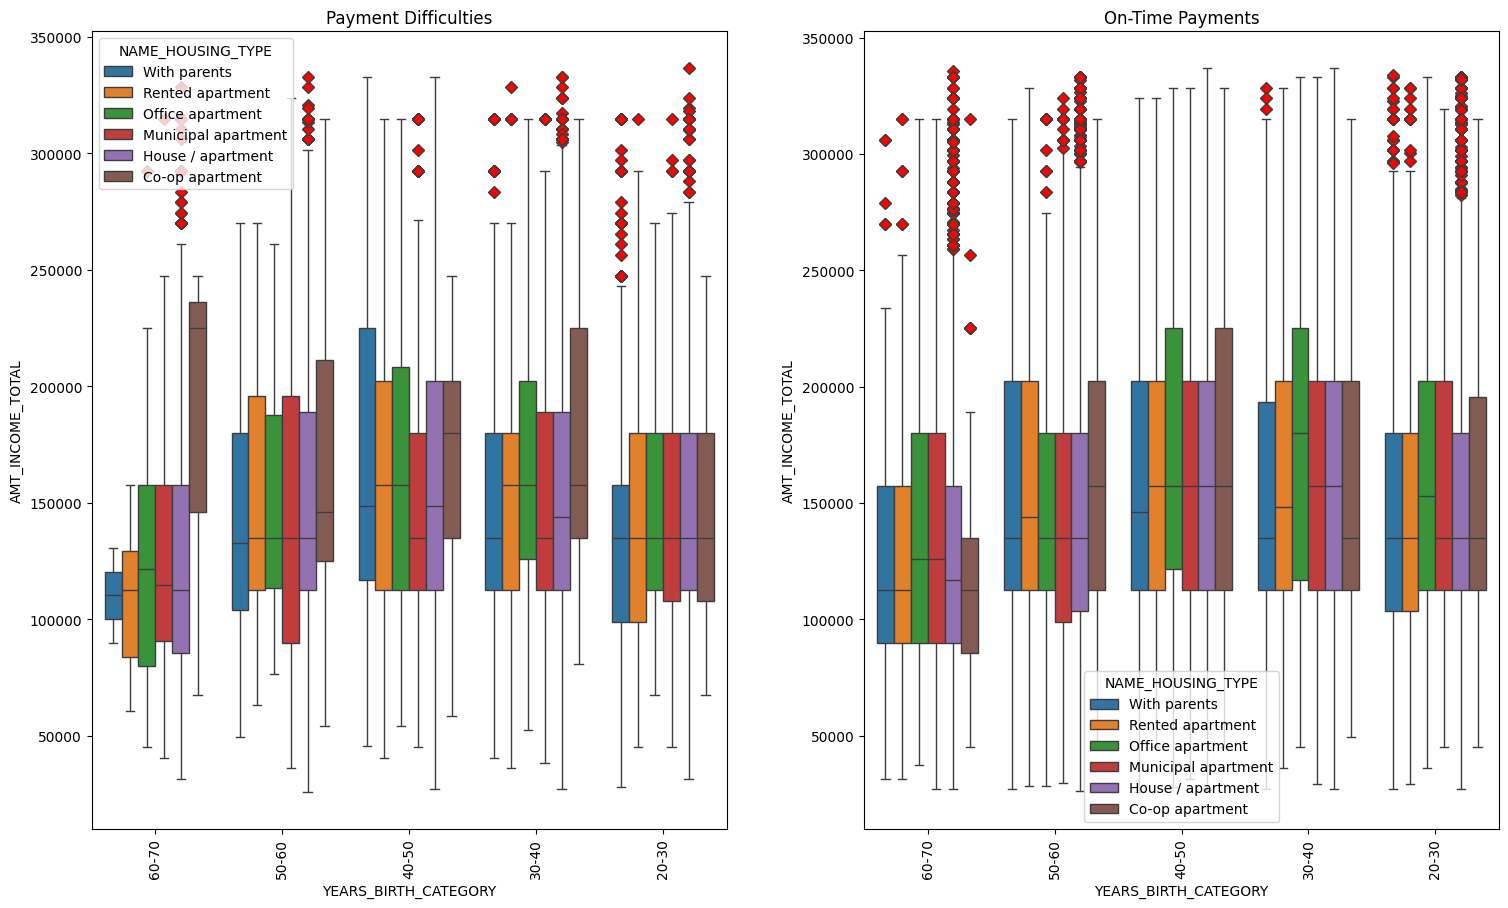

In [547]:
numeric_vs_categorical_analysis(df0, df1, 'AMT_INCOME_TOTAL', 'YEARS_BIRTH_CATEGORY', 'NAME_HOUSING_TYPE')

**Спостереження:** 
- Клієнти віком від **30-40**, **50-60**, **60-70** ,які живуть в `Co-op апартаментах` та беруть позику суму від **200000** мають труднощі з оплатою
- Клієнти віком від **60-70** та проблемами з оплатою беруть середній та медіанний кредит у значно меншому діапазоні, ніж клієнти з вчасною оплатою

count      mean       std       min  \
NAME_INCOME_TYPE     CODE_GENDER                                         
Commercial associate F           2968.00 536304.02 353598.52  45000.00   
                     M           2392.00 526355.38 335793.33  45000.00   
Maternity leave      F              2.00 929250.00 715945.62 423000.00   
Pensioner            F           2243.00 494976.12 316903.86  45000.00   
                     M            739.00 486543.08 321104.43  45000.00   
State servant        F            847.00 544120.88 336074.93  45000.00   
                     M            402.00 536955.22 339694.98  45000.00   
Unemployed           F              6.00 653250.00 321180.44 328500.00   
                     M              2.00 546750.00  54093.67 508500.00   
Working              F           8104.00 470537.11 297631.23  45000.00   
                     M           7120.00 466364.04 286862.45  45000.00   

                                       25%       50%        75%        max  
NAME_INCOME_TYPE     CODE_GENDER                                            
Commercial associate F           270000.00 450000.00  675000.00 3600000.00  
                     M           270000.00 450000.00  675000.00 2961000.00  
Maternity leave      F           676125.00 929250.00 1182375.00 1435500.00  
Pensioner            F           229500.00 450000.00  675000.00 2173500.00  
                     M           229500.00 450000.00  675000.00 1800000.00  
State servant        F           270000.00 450000.00  675000.00 1800000.00  
                     M           270000.00 450000.00  675000.00 1980000.00  
Unemployed           F           433125.00 603000.00  745875.00 1215000.00  
                     M           527625.00 546750.00  565875.00  585000.00  
Working              F           229500.00 450000.00  675000.00 2254500.00  
                     M           238500.00 450000.00  652500.00 2250000.00

count       mean        std       min  \
NAME_INCOME_TYPE     CODE_GENDER                                            
Businessman          F               3.00 1125000.00 1031079.53 225000.00   
                     M               7.00 1272857.14  755104.06 495000.00   
Commercial associate F           41552.00  602132.71  400701.09  45000.00   
                     M           24705.00  620123.74  422345.24  45000.00   
Maternity leave      F               2.00  562500.00  350017.86 315000.00   
                     M               1.00  765000.00        NaN 765000.00   
Pensioner            F           43018.00  481967.35  342759.14  45000.00   
                     M            9362.00  515007.29  372967.10  45000.00   
State servant        F           15009.00  597592.88  399672.12  45000.00   
                     M            5445.00  629000.43  439320.99  45000.00   
Student              F               7.00  338142.86  167297.32 180000.00   
                     M              11.00  534681.82  280951.53  90000.00   
Unemployed           F              11.00  787909.09  510298.63 135000.00   
                     M               3.00 1045500.00  291853.13 855000.00   
Working              F           88680.00  519293.29  349773.59  45000.00   
                     M           54870.00  528999.09  359956.40  40500.00   

                                       25%        50%        75%        max  
NAME_INCOME_TYPE     CODE_GENDER                                             
Businessman          F           562500.00  900000.00 1575000.00 2250000.00  
                     M           607500.00 1350000.00 1800000.00 2250000.00  
Commercial associate F           270000.00  472500.00  837000.00 4050000.00  
                     M           270000.00  472500.00  900000.00 4050000.00  
Maternity leave      F           438750.00  562500.00  686250.00  810000.00  
                     M           765000.00  765000.00  765000.00  765000.00  
Pensioner            F           225000.00  450000.00  675000.00 3150000.00  
                     M           225000.00  450000.00  675000.00 2250000.00  
State servant        F           270000.00  472500.00  819000.00 2700000.00  
                     M           270000.00  472500.00  900000.00 3600000.00  
Student              F           209250.00  238500.00  472500.00  585000.00  
                     M           411750.00  468000.00  654750.00 1206000.00  
Unemployed           F           510750.00  634500.00  983250.00 1804500.00  
                     M           877500.00  900000.00 1140750.00 1381500.00  
Working              F           234000.00  450000.00  679500.00 2700000.00  
                     M           238500.00  450000.00  679500.00 3712500.00

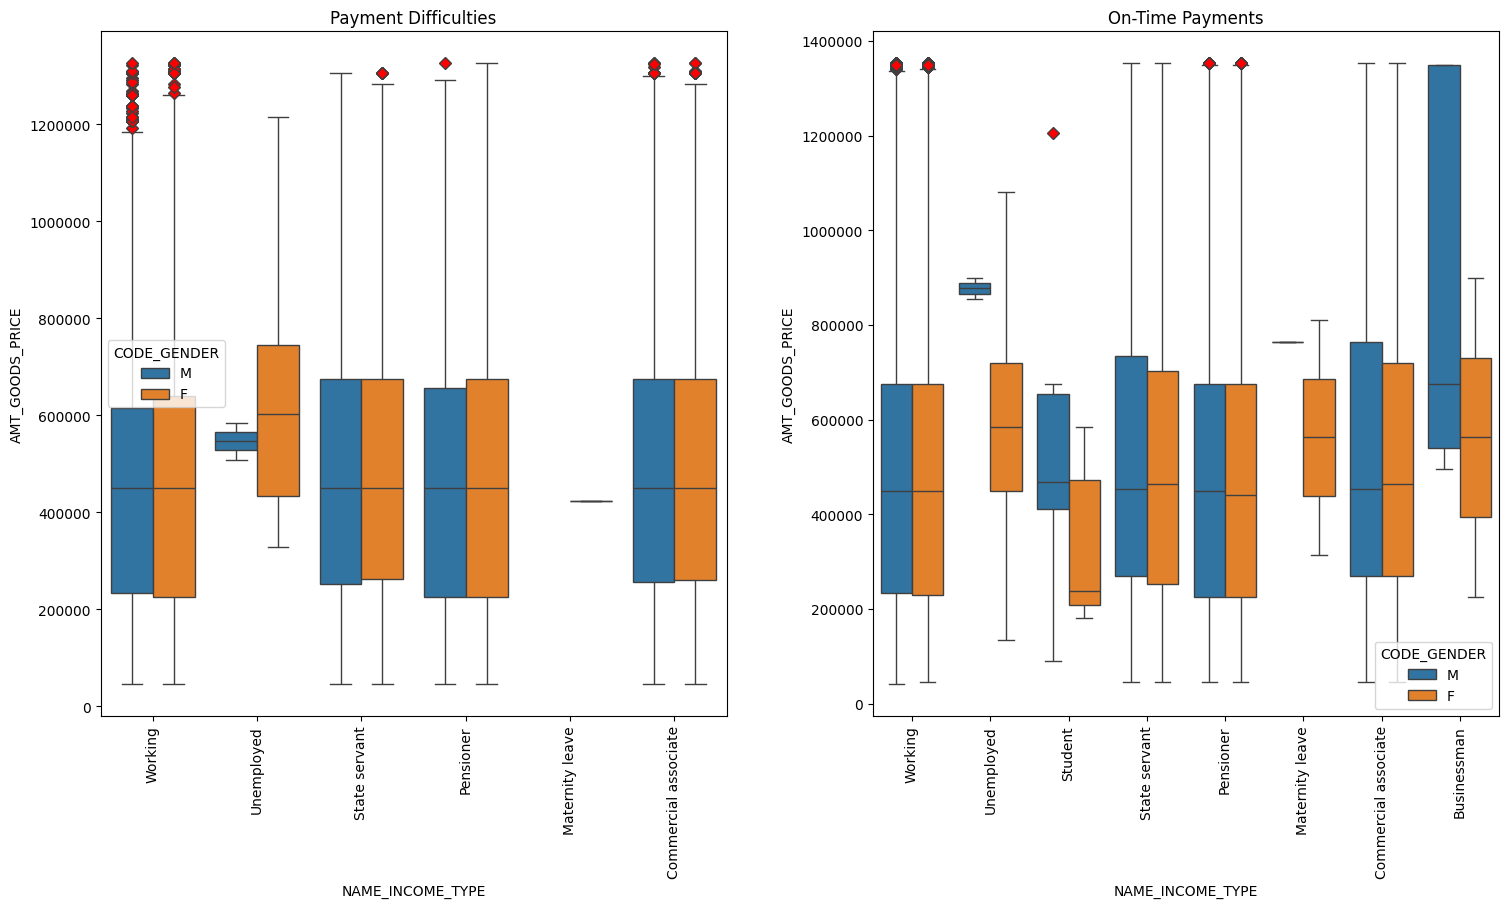

In [548]:
numeric_vs_categorical_analysis(df0, df1, 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'CODE_GENDER')

**Спостереження:**
- Клієнти, які знаходяться в декретній відсутці практично не мають проблем з оплатою. Також чоловіки у декретній відпустці практично відсутні
- Студенти та бізнесмени не мають проблем з оплатою платежів
- Середнє медіанне значення для безробітніх чоловіків в яких немає проблем з оплатою платежів значно вижче ніж в чоловіків, які мають проблеми
- Студенти жінки, які не мають труднощів з оплатою позики - мають значно менше середнє медіанне серед інших категорій

count      mean        std       min  \
OCCUPATION_TYPE       CODE_GENDER                                          
Accountants           F            457.00 174840.64   79021.04  54000.00   
                      M             17.00 202367.65   98623.66  81000.00   
Cleaning staff        F            410.00 128907.99   70328.23  31500.00   
                      M             37.00 119493.24   45786.21  45000.00   
Cooking staff         F            555.00 129298.38   55531.88  32400.00   
                      M             66.00 177136.36   70219.69  54000.00   
Core staff            F           1300.00 151346.91   82703.03  27900.00   
                      M            438.00 186997.33  105677.70  54000.00   
Drivers               F             78.00 171721.15   87317.36  45000.00   
                      M           2029.00 180610.43   78388.18  45000.00   
HR staff              F             33.00 185659.09   82903.65  81000.00   
                      M              3.00 220500.00   93638.93 112500.00   
High skill tech staff F            465.00 155056.60   95571.63  54000.00   
                      M            236.00 203694.25   92743.72  71154.00   
IT staff              F             10.00 184950.00   88269.62  99000.00   
                      M             24.00 167625.00   81770.79  67500.00   
Laborers              F           2065.00 198925.03 2572298.73  36000.00   
                      M           3773.00 169451.69   71865.63  36000.00   
Low-skill Laborers    F             49.00 124147.65   54090.78  45000.00   
                      M            310.00 133051.94   51390.50  36000.00   
Managers              F            639.00 228765.27  139415.85  27000.00   
                      M            689.00 278625.67  169183.71  45000.00   
Medicine staff        F            548.00 139739.24   71621.37  31500.00   
                      M             24.00 146250.00   53294.30  54000.00   
Private service staff F            167.00 182489.82  239213.84  67500.00   
                      M              8.00 181687.50   70083.59 135000.00   
Realty agents         F             48.00 183750.00   78790.79  76500.00   
                      M             11.00 187363.64   47507.42 112500.00   
Sales staff           F           2730.00 144078.15   64787.43  36000.00   
                      M            362.00 180009.94   84624.11  63000.00   
Secretaries           F             84.00 147745.93   65107.30  45000.00   
                      M              8.00 189000.00   81320.79  81000.00   
Security staff        F            197.00 137948.98   82669.92  36000.00   
                      M            525.00 145897.82   62314.17  40500.00   
Unknown               F           4199.00 141580.23   73542.33  25650.00   
                      M           2079.00 165932.96   83696.28  31500.00   
Waiters/barmen staff  F            136.00 139387.50   59729.86  36000.00   
                      M             16.00 173812.50   70996.92  67500.00   

                                        25%       50%       75%          max  
OCCUPATION_TYPE       CODE_GENDER                                             
Accountants           F           112500.00 157500.00 202500.00    540000.00  
                      M           121500.00 180000.00 252000.00    438750.00  
Cleaning staff        F            90000.00 112500.00 157500.00    720000.00  
                      M            90000.00 112500.00 135000.00    247500.00  
Cooking staff         F            90000.00 112500.00 157500.00    405000.00  
                      M           135000.00 157500.00 202500.00    405000.00  
Core staff            F            99000.00 135000.00 180000.00   1305000.00  
                      M           135000.00 161325.00 214875.00   1350000.00  
Drivers               F           112500.00 157500.00 212625.00    450000.00  
                      M           135000.00 166500.00 225000.00   1350000.00  
HR staff              F           135000.00 157

count      mean       std      min  \
OCCUPATION_TYPE       CODE_GENDER                                         
Accountants           F            9072.00 194324.51 109135.61 27000.00   
                      M             267.00 236490.89 131795.33 54000.00   
Cleaning staff        F            3904.00 130602.05  63495.05 25650.00   
                      M             302.00 137172.52  64373.09 31500.00   
Cooking staff         F            4830.00 134460.40  60213.56 27000.00   
                      M             495.00 181838.97  74088.22 54000.00   
Core staff            F           20482.00 162796.77  89035.64 27000.00   
                      M            5350.00 214408.58 120326.37 31500.00   
Drivers               F             847.00 168866.16  83469.45 38250.00   
                      M           15649.00 188899.90  82891.66 27000.00   
HR staff              F             491.00 185297.59  90472.03 54000.00   
                      M              36.00 238625.00 123061.66 30600.00   
High skill tech staff F            6885.00 164678.06  80316.22 27000.00   
                      M            3794.00 217912.73 110331.98 37800.00   
IT staff              F             148.00 185232.16 185029.32 45000.00   
                      M             344.00 229639.67 121511.95 54000.00   
Laborers              F           21074.00 146162.55  67123.14 27000.00   
                      M           28274.00 178618.27  92253.88 31500.00   
Low-skill Laborers    F             272.00 121574.45  52613.97 29250.00   
                      M            1462.00 135737.77  54529.23 27000.00   
Managers              F           10954.00 229658.75 160076.44 29250.00   
                      M            9089.00 298142.72 208214.89 38250.00   
Medicine staff        F            7749.00 149784.43  73765.45 26550.00   
                      M             216.00 172706.25  87416.49 54000.00   
Private service staff F            2371.00 180824.81  87603.88 36000.00   
                      M             106.00 215915.09 108765.11 40500.00   
Realty agents         F             641.00 195139.24  84580.66 67500.00   
                      M              51.00 205544.12  72196.36 67500.00   
Sales staff           F           25543.00 147208.55  73649.40 27000.00   
                      M            3467.00 193418.53  98770.87 31500.00   
Secretaries           F            1163.00 156755.77 107304.36 45000.00   
                      M              50.00 265545.00 245659.97 81000.00   
Security staff        F            1841.00 134899.15  64869.02 27000.00   
                      M            4158.00 157229.76  70705.77 29250.00   
Unknown               F           68969.00 145563.53  83300.88 26100.00   
                      M           21144.00 180605.51 186925.80 27000.00   
Waiters/barmen staff  F            1046.00 137314.76  60954.02 29250.00   
                      M             150.00 194070.00  88971.12 67500.00   

                                        25%       50%       75%         max  
OCCUPATION_TYPE       CODE_GENDER                                            
Accountants           F           130500.00 175500.00 225000.00  2214117.00  
                      M           141750.00 216000.00 270000.00  1035000.00  
Cleaning staff        F            90000.00 112500.00 157500.00  1080000.00  
                      M            90000.00 132750.00 169875.00   450000.00  
Cooking staff         F            90000.00 121500.00 157500.00   540000.00  
                      M           135000.00 180000.00 225000.00   540000.00  
Core staff            F           112500.00 135000.00 202500.00  3375000.00  
                      M           135000.00 180000.00 256500.00  3600000.00  
Drivers               F           112500.00 157500.00 202500.00   675000.00  
                      M           135000.00 180000.00 225000.00  2475000.00  
HR staff              F           130500.00 157500.00 216000.00   699750.00  
                      

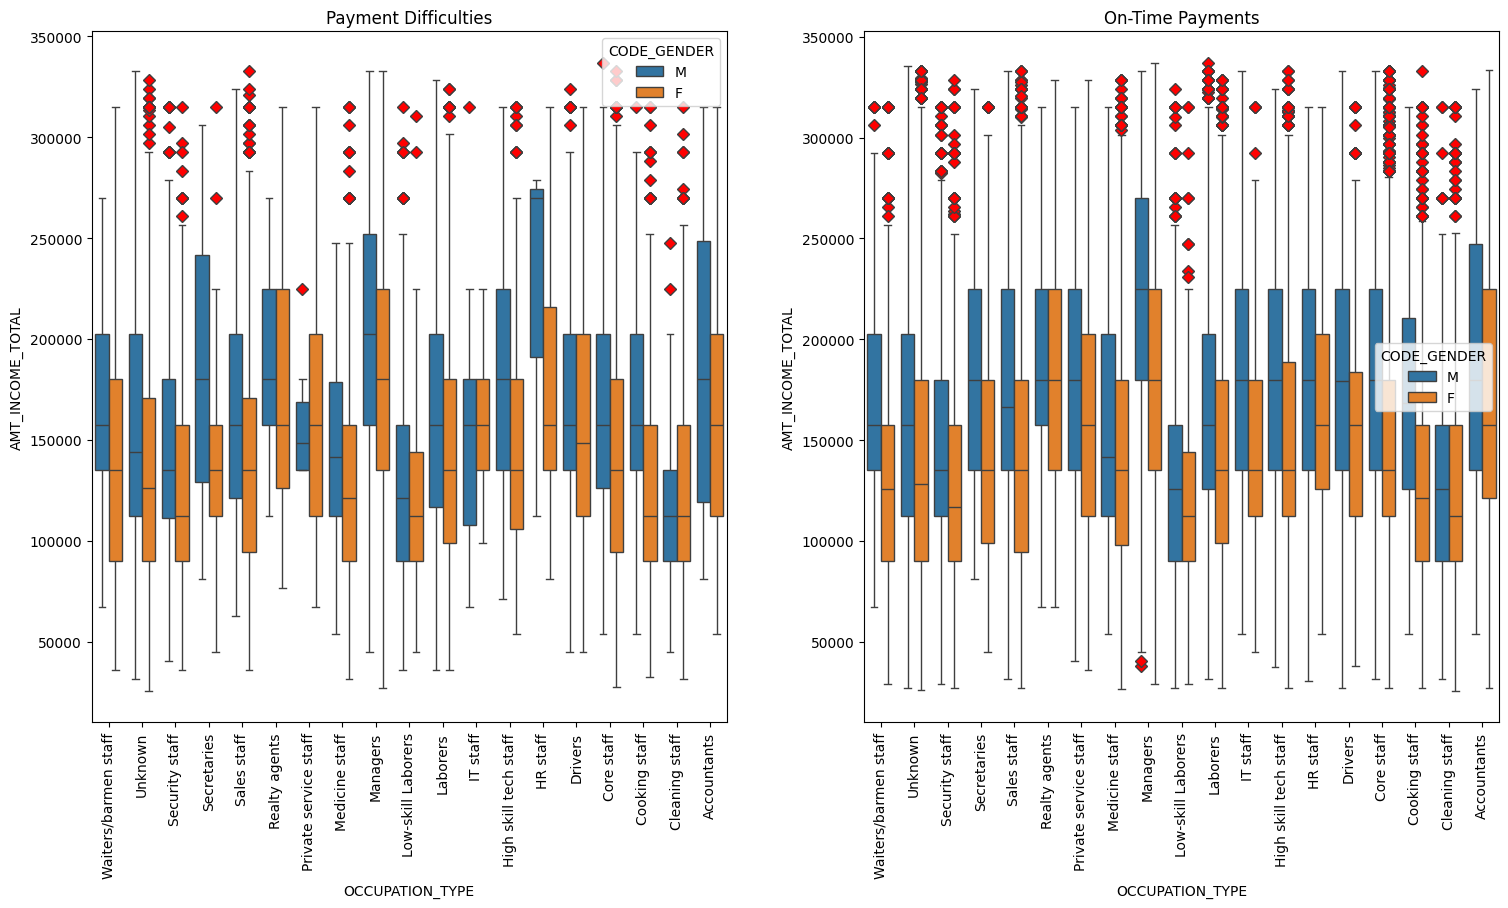

In [549]:
numeric_vs_categorical_analysis(df0, df1, 'AMT_INCOME_TOTAL', 'OCCUPATION_TYPE', 'CODE_GENDER')

**Спостереження:**
- Чоловіки, які працюють в сфері `Private service staff` та мають проблеми з виплатами платежів мають значно менший діапазон доходу
- Клієнти, які працюють в сфері `IT staff` та мають проблеми з виплатами платежів мають менший діапазон діапазон доходу
- Чоловіки, які працюють в сфері `HR staff` та мають проблеми з виплатами платежів мають більше середнє медіанне значення доходу
- Клієнти, які працюють в сфері `Cleaning staff` та мають проблеми з виплатами мають нижчі середні медіанні показники доходу

## Категоріальні та категоріальні змінні

### Аналіз стовпців `NAME_INCOME_TYPE` vs `CODE_GENDER`

КЛІЄНТ ЗІ СКЛАДНОЩАМИ ЩОДО ПЛАТНОСТІ


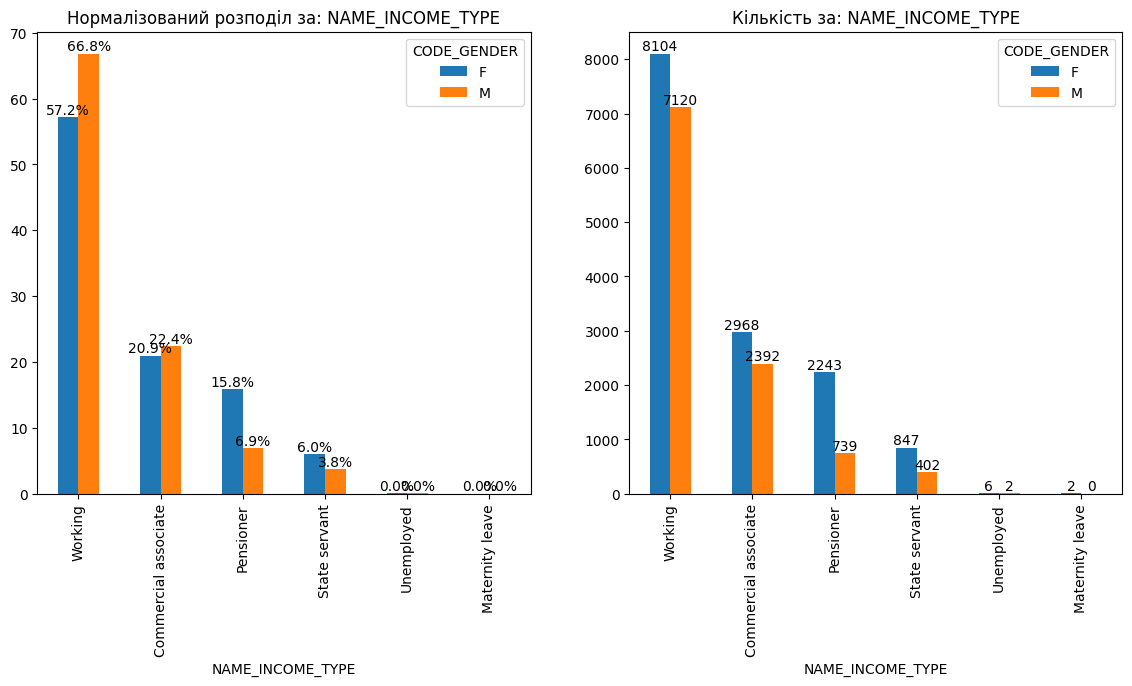

КЛІЄНТИ ЗІ СВОЄЧАСНИМИ ПЛАТЕЖАМИ


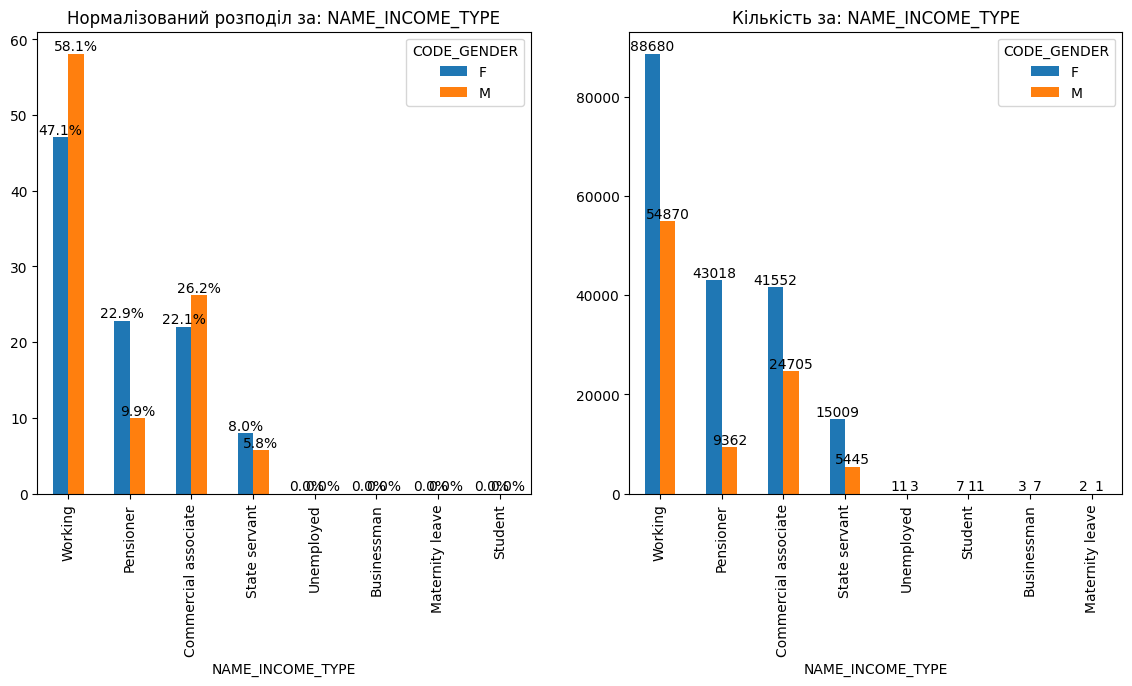

In [550]:
bi_countplot_target(df0, df1, 'NAME_INCOME_TYPE','CODE_GENDER')

**Спостереження**
- Клієнти категорії `Working` та `Male` мають більше труднощів з оплатою порівняно з тими, хто платить вчасно
- Клієнти категорії `Pensioner` та `Female` мають більше труднощів з оплатою порівняно з тими, хто платить вчасно
- Клієнти категорії `Businessman` та `Student` здійснюють платежі вчасно, хоча їхня історія невелика

# ДЗ 8. Аналіз взаємозалежностей між двома категоріальними змінними

Проведіть подібний до прикладу аналіз залежностей між категоріальними змінними для пар змінних

- NAME_EDUCATION_TYPE vs CODE_GENDER

Опціонально:
- NAME_FAMILY_STATUS vs OCCUPATION_TYPE
- OCCUPATION_TYPE vs NAME_CONTRACT_TYPE

Опишіть спостереження щодо того, чи є цікаві знахідки стосовно цільової змінної з цього аналізу.

КЛІЄНТ ЗІ СКЛАДНОЩАМИ ЩОДО ПЛАТНОСТІ


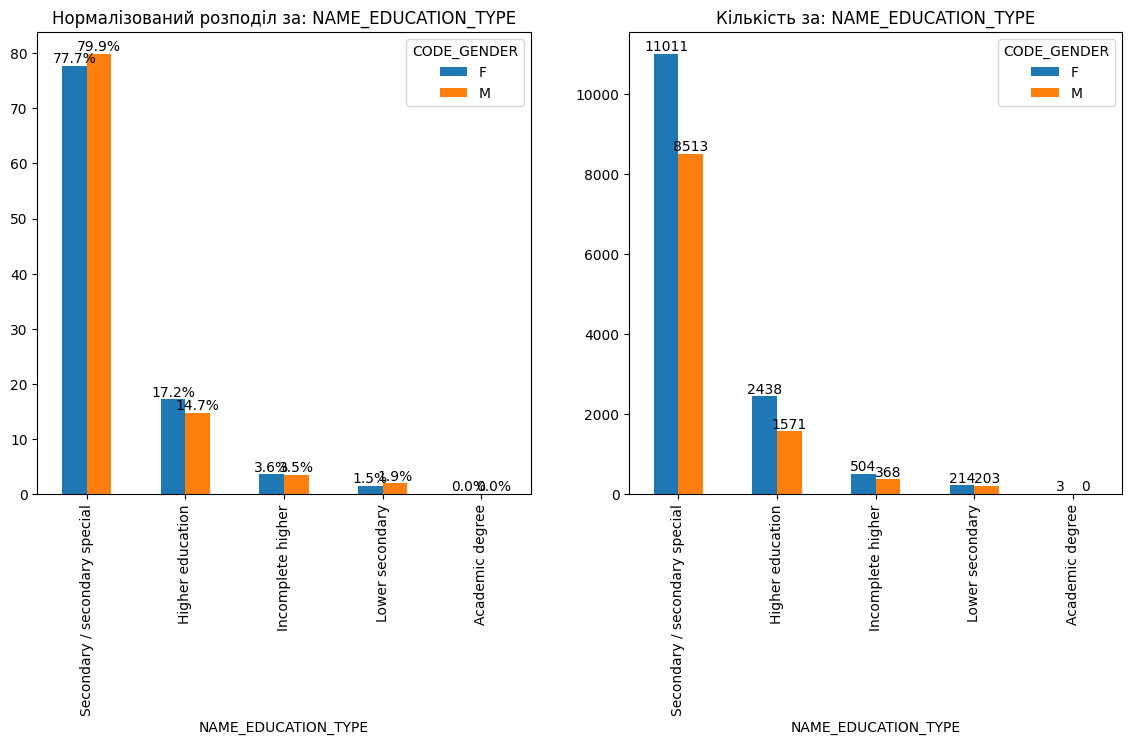

КЛІЄНТИ ЗІ СВОЄЧАСНИМИ ПЛАТЕЖАМИ


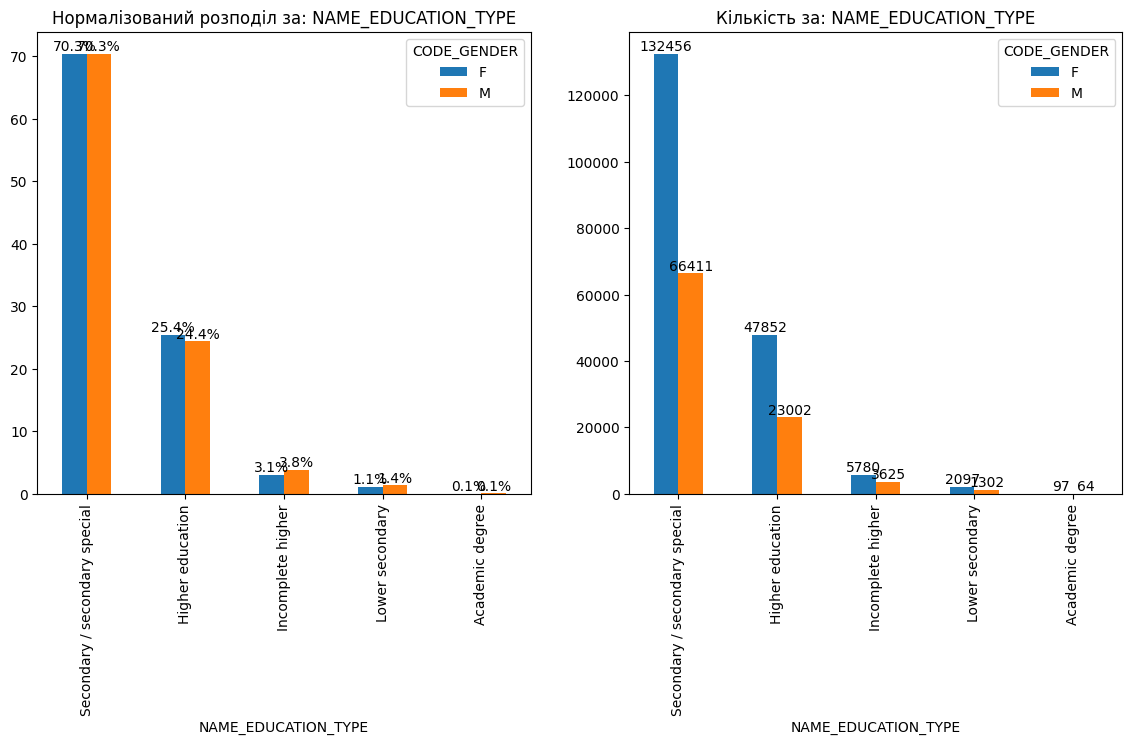

In [551]:
bi_countplot_target(df0, df1, 'NAME_EDUCATION_TYPE','CODE_GENDER')

**Спостереження:** 
- Чоловіки з повною середньої освітою (secondary) схильні мати на **2%** більше проблем з виплатою платежів
- Жінки з вищою освітою схильні мати на **3%** більше труднощів з виплатою платежів

КЛІЄНТ ЗІ СКЛАДНОЩАМИ ЩОДО ПЛАТНОСТІ


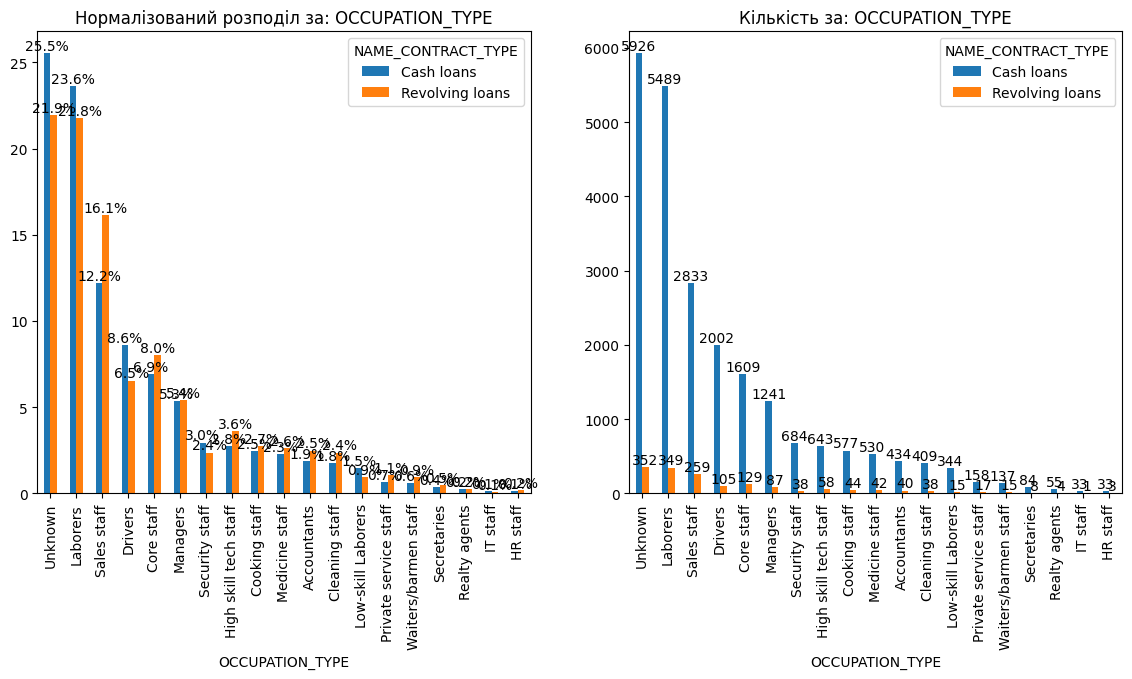

КЛІЄНТИ ЗІ СВОЄЧАСНИМИ ПЛАТЕЖАМИ


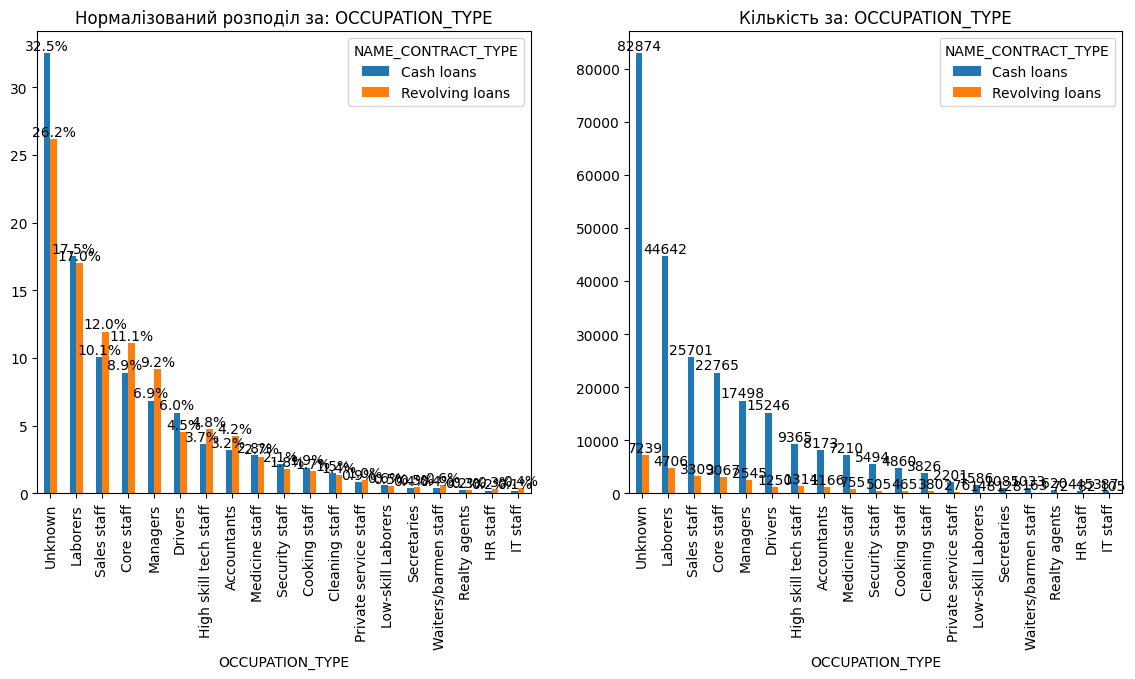

In [552]:
bi_countplot_target(df0, df1, 'OCCUPATION_TYPE', 'NAME_CONTRACT_TYPE')

**Спостереження:**
- Працівники сфери `Sales staff`, які обирають `Revolving loans` мають більше труднощів з оплатою
- Більшість найманих працівників та водіїв та обирають кредити готівкою мають більше труднощів з виплатою платежів

***
# ДЗ 9. Висновок з проведеного аналізу
Напишіть Ваш висновок з проведеного ананлізу, яким категоріям осіб Ви б видали кредит? Категорія може бути, наприклад, люди з такою-то освітою, з таким-то доходом, з таким-то досвідом роботи.

# Висновок: Категорії клієнтів, на яких слід орієнтуватися при наданні кредиту


#### <u>В ході аналізу виявлено, що труднощі в погашенні позики можуть залежати від різних факторів:</u>
**Соціально демографічні фактори:**
> - Жінки мають на **10%** менше труднощів з виплатами
> - Клієнти віком до **40** років мають більше труднощів з виплатою
> - Клієнти з кількістю осіб в родині від **2** до **4** мають менше труднощів з виплатою
> - Клієнти в статусі "самотній" та "в цивільному шлюбі" мають більше труднощів з виплатою
> - Клієнти з власним авто мають менше труднощів з виплатою
> - Клієнти, які живуть в Co-op апартаментах мають труднощі з виплатою

**Освіта та професійна діяльність:**
> - Працюючі клієнти частіше стикаються з труднощами при виплаті
> - Клієнти з неповною середньою освітою, незакінченою вищою та лише повною середньою частіше стикаються з труднощами при виплаті
> - Клієнти, стаж яких складає менше **2000** днів (приблизно **5.5** років) мають більше труднощів з виплатами
> - Клієнти, які знаходяться в декретній відсутці практично не мають проблем з оплатою
> - Студенти та бізнесмени не мають проблем з виплатами
> - Працівникам сфер `Private service staff`, `Sales staff`, `Private service staff` важче виплатити кредит

**Фінансові показники:**
> - Клієнтам, що беруть кредит в розмірі від **250000** до **650000** важче здійснювати виплати
> - Клієнти з аннуїтетом більшим **59269.99** мають труднощі з виплатами
> - Клієнтам, в яких вартість товарів, на який видається кредит складає від **250000** до **500000** складніше виплатити кредит
> - Клієнти, з меншим доходом мають більше труднощів з виплатами

#### <u>Загальні рекомендації та групи осіб, яким варто та не варто видавати кредит:</u>
**Когорти клієнтів, яким не варто видавати позику:**
- Клієнти, віком від **30** років від що живуть в `Co-appartments` та беруть суму від **200k**
- Жінки з академічним ступенем освіти, які беруть кредит на великі суми (від **700k**)
- Чоловіки віком до **40** років з незакінченою середньою або вищою або лише середньою освітою без власного авто
- Працюючі чоловіки, які є найманими працівниками та водії (особливо водії без власного авто), які обирають кредити готівкою
- Жінки пенсіонери
- Клієнти, які були працевлаштовані менше **5** років, тобто мають стаж менше **5** років та беруть кредит на товари від **250k** та **500k**
- Самотні, або клієнти що перебувають в цивільному шлюбі та беруть кредити на суму від **750k**
- Працівникам сфер `Private service staff`, `Sales staff`, `Private service staff` які мають невеликий рівень доходу

**Когорти клієнтів, яким варто видавати позику:**
- Клієнти з кількістю осіб в родині від **2** до **4**, та не є в статусі "самотній" або в "цивільному шлюбі"
- Клієнти з аннуїтетом до **59269.99**
- Чоловіки з академічним ступенем освіти
- Клієнти, що знаходяться в декретній відпустці
- Студенти (за виключення студентів жінок що беруть кредит на суми в великому діапазоні) та бізнесмени
- Безробітні чоловіки, які беруть кредит на дуже малі суми
- Працівники сфери `IT staff`, `HR staff` з рівнем доходи більше середнього
- Клієнти чоловіки з вищою освітою
- Клієнти від **40** років з великим стажем роботи (більше **5.5** років стажу)
- Клієнти, які мають власне авто та живуть в квартирі, або у власному будинку